In [1]:
# !pip install pycountry-convert

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
import pycountry
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency

import warnings
import matplotlib.pyplot as plt

# 경고 무시 설정
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# read_csv

In [3]:
df_distribution_centers = pd.read_csv('./distribution_centers.csv')
df_events = pd.read_csv('./events.csv')
df_inventory_items = pd.read_csv('./inventory_items.csv')
df_order_items = pd.read_csv('./order_items.csv')
df_orders = pd.read_csv('./orders.csv')
df_products = pd.read_csv('./products.csv')
df_users = pd.read_csv('./users.csv')

## columns info

In [4]:
dataframes = [
    ('df_distribution_centers', df_distribution_centers),
    ('df_events', df_events),
    ('df_inventory_items', df_inventory_items),
    ('df_order_items', df_order_items),
    ('df_orders', df_orders),
    ('df_products', df_products),
    ('df_users', df_users)
]

for name, df in dataframes:
    print(f"\nInfo for {name}:\n{df.info()}\n")
    
pd.options.mode.chained_assignment = None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10 non-null     int64  
 1   name       10 non-null     object 
 2   latitude   10 non-null     float64
 3   longitude  10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes

Info for df_distribution_centers:
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431963 entries, 0 to 2431962
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   user_id          float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip_address       object 
 6   city             object 
 7   state            object 
 8   postal_code      object 
 9   browser          object 
 10  traffic_source   object 
 11  uri              object 
 12  event_type   

## df_distribution_centers

In [5]:
df_distribution_centers

id                                         name  latitude  longitude
0   1                                   Memphis TN   35.1174   -89.9711
1   2                                   Chicago IL   41.8369   -87.6847
2   3                                   Houston TX   29.7604   -95.3698
3   4                               Los Angeles CA   34.0500  -118.2500
4   5                               New Orleans LA   29.9500   -90.0667
5   6  Port Authority of New York/New Jersey NY/NJ   40.6340   -73.7834
6   7                              Philadelphia PA   39.9500   -75.1667
7   8                                    Mobile AL   30.6944   -88.0431
8   9                                Charleston SC   32.7833   -79.9333
9  10                                  Savannah GA   32.0167   -81.1167

In [6]:
print(df_distribution_centers)

   id                                         name  latitude  longitude
0   1                                   Memphis TN   35.1174   -89.9711
1   2                                   Chicago IL   41.8369   -87.6847
2   3                                   Houston TX   29.7604   -95.3698
3   4                               Los Angeles CA   34.0500  -118.2500
4   5                               New Orleans LA   29.9500   -90.0667
5   6  Port Authority of New York/New Jersey NY/NJ   40.6340   -73.7834
6   7                              Philadelphia PA   39.9500   -75.1667
7   8                                    Mobile AL   30.6944   -88.0431
8   9                                Charleston SC   32.7833   -79.9333
9  10                                  Savannah GA   32.0167   -81.1167


## df_events

In [7]:
df_events

id  user_id  sequence_number  \
0        2198523      NaN                3   
1        1773216      NaN                3   
2        2380515      NaN                3   
3        2250597      NaN                3   
4        1834446      NaN                3   
...          ...      ...              ...   
2431958   822590  62906.0                5   
2431959    43178   3333.0                5   
2431960   553230  42386.0               10   
2431961  1015190  77546.0                5   
2431962   844526  64551.0               13   

                                   session_id                 created_at  \
0        83889ed2-2adc-4b9a-af5d-154f6998e778  2021-06-17 17:30:00+00:00   
1        7a3fc3f2-e84f-44fe-8876-eff76741f7a3  2020-08-07 08:41:00+00:00   
2        13d9b2fb-eee1-43fd-965c-267b38dd7125  2021-02-15 18:48:00+00:00   
3        96f1d44e-9621-463c-954c-d8deb7fffe7f  2022-03-30 10:56:00+00:00   
4        d09dce10-a7cb-47d3-a9af-44975566fa03  2019-09-05 01:18:00+00:00   
...                                       ...                        ...   
2431958  12ae51e7-76b3-4560-9335-3ea762eae60e  2022-04-07 01:55:02+00:00   
2431959  e472549e-273e-402e-ae5f-38ece25699c2  2023-09-26 10:25:28+00:00   
2431960  6a7ba027-2af2-46a3-ae05-294a264840cf  2023-07-31 15:11:10+00:00   
2431961  29e5960c-214b-456e-8c38-fe6eb8ff1ec8  2024-01-02 14:26:38+00:00   
2431962  9f633088-d2a8-4db2-8a5e-ebd946abce26  2022-09-15 09:55:32+00:00   

              ip_address           city      state postal_code  browser  \
0          138.143.9.202      São Paulo  São Paulo   02675-031   Chrome   
1          85.114.141.79   Santa Isabel  São Paulo   07500-000   Safari   
2        169.250.255.132      Mairiporã  São Paulo   07600-000       IE   
3         137.25.222.160        Cajamar  São Paulo   07750-000   Chrome   
4          161.114.4.174      São Paulo  São Paulo   09581-680   Chrome   
...                  ...            ...        ...         ...      ...   
2431958      52.92.60.25      St Helens    England         WA9  Firefox   
2431959    97.78.106.249         Orrell    England         WN5       IE   
2431960   147.252.137.75         Orrell    England         WN5   Chrome   
2431961   112.209.120.82  Wolverhampton    England         WV6   Chrome   
2431962  190.227.140.196           York    England        YO10  Firefox   

        traffic_source        uri event_type  
0              Adwords    /cancel     cancel  
1              Adwords    /cancel     cancel  
2              Adwords    /cancel     cancel  
3              Adwords    /cancel     cancel  
4                Email    /cancel     cancel  
...                ...        ...        ...  
2431958        Adwords  /purchase   purchase  
2431959          Email  /purchase   purchase  
2431960       Facebook  /purchase   purchase  
2431961        Adwords  /purchase   purchase  
2431962          Email  /purchase   purchase  

[2431963 rows x 13 columns]

In [8]:
column_names = df_events.columns

for column in column_names:
    value_counts = df_events[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
2198523    1
1291745    1
1508305    1
367872     1
2029633    1
          ..
328408     1
416642     1
1581833    1
2095987    1
844526     1
Name: count, Length: 2431963, dtype: int64

Value counts for user_id:
user_id
NaN        1125671
32996.0        164
80546.0        161
19415.0        156
98947.0        156
            ...   
9496.0           5
15063.0          5
63030.0          5
3966.0           5
44883.0          5
Name: count, Length: 80045, dtype: int64

Value counts for sequence_number:
sequence_number
1     681759
2     557043
3     432146
4     181759
5     181759
6      94047
7      94047
9      44313
10     44313
8      44313
12     25488
11     25488
13     25488
Name: count, dtype: int64

Value counts for session_id:
session_id
b174d8d5-a07f-44c1-a1c2-226f495b4cf4    13
b8872abf-7c4a-4afc-ac54-c61ae7f7249a    13
ee9acceb-18ca-4588-a25f-c980f5f3622f    13
6ae3a11d-7927-4877-8a62-21693e6a68be    13
c61b8349-fb9d-4e1b-9dc2-638409fcad20    13
   

In [9]:
df_events[["sequence_number","uri"]]

sequence_number        uri
0                      3    /cancel
1                      3    /cancel
2                      3    /cancel
3                      3    /cancel
4                      3    /cancel
...                  ...        ...
2431958                5  /purchase
2431959                5  /purchase
2431960               10  /purchase
2431961                5  /purchase
2431962               13  /purchase

[2431963 rows x 2 columns]

## df_inventory_items

In [10]:
df_inventory_items

id  product_id                 created_at  \
0        67971       13844  2022-07-02 07:09:20+00:00   
1        67972       13844  2023-12-20 03:28:00+00:00   
2        67973       13844  2023-06-04 02:53:00+00:00   
3        72863       13844  2021-10-16 22:58:52+00:00   
4        72864       13844  2021-08-07 16:33:00+00:00   
...        ...         ...                        ...   
490700  311018       25590  2021-12-07 12:47:00+00:00   
490701  451084       25590  2023-10-10 11:57:57+00:00   
490702  451085       25590  2020-11-20 05:55:00+00:00   
490703  486057       25590  2023-02-26 22:35:12+00:00   
490704  486058       25590  2022-09-12 13:52:00+00:00   

                          sold_at      cost product_category  \
0       2022-07-24 06:33:20+00:00   2.76804      Accessories   
1                             NaN   2.76804      Accessories   
2                             NaN   2.76804      Accessories   
3       2021-11-22 02:19:52+00:00   2.76804      Accessories   
4                             NaN   2.76804      Accessories   
...                           ...       ...              ...   
490700                        NaN  10.39200        Underwear   
490701  2023-11-27 11:28:57+00:00  10.39200        Underwear   
490702                        NaN  10.39200        Underwear   
490703  2023-04-23 01:24:12+00:00  10.39200        Underwear   
490704                        NaN  10.39200        Underwear   

                             product_name       product_brand  \
0                  (ONE) 1 Satin Headband  Funny Girl Designs   
1                  (ONE) 1 Satin Headband  Funny Girl Designs   
2                  (ONE) 1 Satin Headband  Funny Girl Designs   
3                  (ONE) 1 Satin Headband  Funny Girl Designs   
4                  (ONE) 1 Satin Headband  Funny Girl Designs   
...                                   ...                 ...   
490700  ck one Men's Micro Slim Fit Boxer        Calvin Klein   
490701  ck one Men's Micro Slim Fit Boxer        Calvin Klein   
490702  ck one Men's Micro Slim Fit Boxer        Calvin Klein   
490703  ck one Men's Micro Slim Fit Boxer        Calvin Klein   
490704  ck one Men's Micro Slim Fit Boxer        Calvin Klein   

        product_retail_price product_department  \
0                       6.99              Women   
1                       6.99              Women   
2                       6.99              Women   
3                       6.99              Women   
4                       6.99              Women   
...                      ...                ...   
490700                 24.00                Men   
490701                 24.00                Men   
490702                 24.00                Men   
490703                 24.00                Men   
490704                 24.00                Men   

                             product_sku  product_distribution_center_id  
0       2A3E953A5E3D81E67945BCE5519F84C8                               7  
1       2A3E953A5E3D81E67945BCE5519F84C8                               7  
2       2A3E953A5E3D81E67945BCE5519F84C8                               7  
3       2A3E953A5E3D81E67945BCE5519F84C8                               7  
4       2A3E953A5E3D81E67945BCE5519F84C8                               7  
...                                  ...                             ...  
490700  F220707C3AFE39D1779E0A34AF72BB7F                               3  
490701  F220707C3AFE39D1779E0A34AF72BB7F                               3  
490702  F220707C3AFE39D1779E0A34AF72BB7F                               3  
490703  F220707C3AFE39D1779E0A34AF72BB7F                               3  
490704  F220707C3AFE39D1779E0A34AF72BB7F                               3  

[490705 rows x 12 columns]

In [11]:
df_inventory_items['product_department'].value_counts()

product_department
Women    245625
Men      245080
Name: count, dtype: int64

In [12]:
column_names = df_inventory_items.columns

for column in column_names:
    value_counts = df_inventory_items[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
67971     1
388182    1
456578    1
456577    1
456576    1
         ..
187378    1
187377    1
158701    1
158700    1
486058    1
Name: count, Length: 490705, dtype: int64

Value counts for product_id:
product_id
18795    58
27625    53
21086    52
17045    51
25209    51
         ..
17362     2
15406     2
3071      2
18147     2
6513      2
Name: count, Length: 29046, dtype: int64

Value counts for created_at:
created_at
2020-09-30 15:54:00+00:00    6
2023-06-01 02:11:00+00:00    5
2022-12-22 03:33:00+00:00    5
2021-11-13 07:35:00+00:00    5
2020-05-22 04:47:00+00:00    4
                            ..
2021-04-26 04:13:27+00:00    1
2021-06-07 13:55:00+00:00    1
2022-10-24 18:27:35+00:00    1
2023-05-17 03:00:00+00:00    1
2022-09-12 13:52:00+00:00    1
Name: count, Length: 463339, dtype: int64

Value counts for sold_at:
sold_at
NaN                          308946
2023-12-11 08:13:51+00:00         2
2023-12-05 03:10:15+00:00         2
2023-11-25 09:04:15+0

In [13]:
df_inventory_items['created_at'] = pd.to_datetime(df_inventory_items['created_at'], errors='coerce')

In [14]:
df_inventory_items['created_at']

0        2022-07-02 07:09:20+00:00
1        2023-12-20 03:28:00+00:00
2        2023-06-04 02:53:00+00:00
3        2021-10-16 22:58:52+00:00
4        2021-08-07 16:33:00+00:00
                    ...           
490700   2021-12-07 12:47:00+00:00
490701   2023-10-10 11:57:57+00:00
490702   2020-11-20 05:55:00+00:00
490703   2023-02-26 22:35:12+00:00
490704   2022-09-12 13:52:00+00:00
Name: created_at, Length: 490705, dtype: datetime64[ns, UTC]

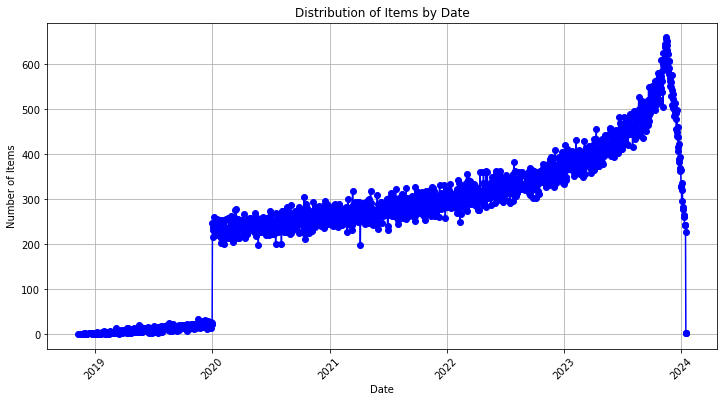

In [15]:
import matplotlib.pyplot as plt

# 'created_at' 칼럼에서 날짜만 추출
df_inventory_items['date'] = df_inventory_items['created_at'].dt.date

# 날짜별 데이터 개수 계산
date_counts = df_inventory_items['date'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
date_counts.plot(marker='o', linestyle='-', color='b')
plt.title('Distribution of Items by Date')
plt.xlabel('Date')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


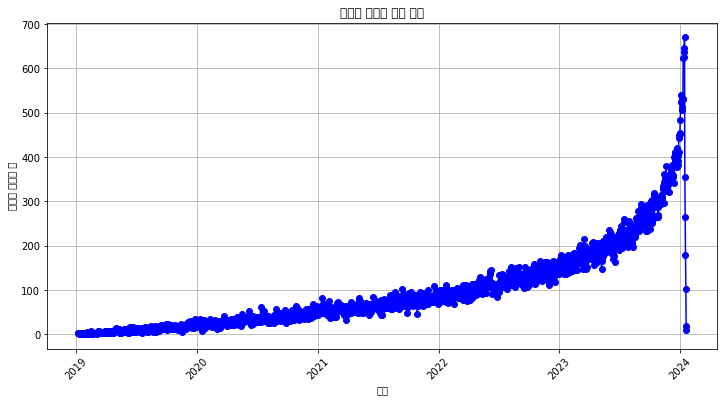

In [16]:
# 'sold_at' 열을 'coerce' 에러 처리 모드로 datetime으로 변환한 새로운 데이터프레임 생성
df_modified = df_inventory_items.copy()
df_modified['sold_at'] = pd.to_datetime(df_modified['sold_at'], errors='coerce')

# 결측값이 있는 행 삭제한 새로운 데이터프레임 생성
df_modified = df_modified.dropna(subset=['sold_at'])

# 'sold_at' 열에서 날짜만 추출
df_modified['date_sold'] = df_modified['sold_at'].dt.date

# 날짜별 아이템 판매 데이터 개수 계산
date_sold_counts = df_modified['date_sold'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
date_sold_counts.plot(marker='o', linestyle='-', color='b')
plt.title('날짜별 아이템 판매 분포')
plt.xlabel('날짜')
plt.ylabel('판매된 아이템 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## df_order_items

In [17]:
df_order_items

id  order_id  user_id  product_id  inventory_item_id     status  \
0       152013    104663    83582       14235             410368  Cancelled   
1        40993     28204    22551       14235             110590   Complete   
2        51224     35223    28215       14235             138236   Complete   
3        36717     25278    20165       14235              99072    Shipped   
4       131061     90241    71954       14235             353798    Shipped   
...        ...       ...      ...         ...                ...        ...   
181754    9674      6679     5325       24447              26095   Returned   
181755    7801      5416     4283       24447              21078    Shipped   
181756   62986     43364    34691       23546             169937    Shipped   
181757  106577     73418    58623       24447             287560    Shipped   
181758  143759     98984    78981       24447             388091    Shipped   

                       created_at                 shipped_at  \
0       2023-05-07 06:08:40+00:00                        NaN   
1       2023-03-14 03:47:21+00:00  2023-03-15 22:57:00+00:00   
2       2023-12-05 13:25:30+00:00  2023-12-06 01:20:00+00:00   
3       2023-12-22 20:48:19+00:00  2023-12-24 16:44:00+00:00   
4       2022-06-19 16:57:59+00:00  2022-06-19 19:29:00+00:00   
...                           ...                        ...   
181754  2020-12-23 00:05:01+00:00  2020-12-25 22:54:00+00:00   
181755  2022-01-12 23:51:07+00:00  2022-01-10 03:42:00+00:00   
181756  2023-02-26 00:38:43+00:00  2023-02-25 06:53:00+00:00   
181757  2023-11-12 02:41:02+00:00  2023-11-14 20:44:00+00:00   
181758  2022-03-13 10:29:49+00:00  2022-03-14 01:27:00+00:00   

                     delivered_at                returned_at  sale_price  
0                             NaN                        NaN        0.02  
1       2023-03-18 01:08:00+00:00                        NaN        0.02  
2       2023-12-10 10:04:00+00:00                        NaN        0.02  
3                             NaN                        NaN        0.02  
4                             NaN                        NaN        0.02  
...                           ...                        ...         ...  
181754  2020-12-28 07:08:00+00:00  2020-12-30 22:43:00+00:00      999.00  
181755                        NaN                        NaN      999.00  
181756                        NaN                        NaN      999.00  
181757                        NaN                        NaN      999.00  
181758                        NaN                        NaN      999.00  

[181759 rows x 11 columns]

In [18]:
column_names = df_order_items.columns

for column in column_names:
    value_counts = df_order_items[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
152013    1
160536    1
26117     1
27247     1
35738     1
         ..
123933    1
124128    1
125909    1
127832    1
143759    1
Name: count, Length: 181759, dtype: int64

Value counts for order_id:
order_id
551       4
70304     4
106023    4
106407    4
93518     4
         ..
21230     1
21000     1
20626     1
20230     1
98984     1
Name: count, Length: 125226, dtype: int64

Value counts for user_id:
user_id
32996    14
80546    13
80952    13
46712    12
34249    12
         ..
2623      1
5221      1
11082     1
13303     1
5325      1
Name: count, Length: 80044, dtype: int64

Value counts for product_id:
product_id
18795    21
17045    19
21842    19
25209    18
27192    18
         ..
5367      1
23736     1
26444     1
16733     1
8094      1
Name: count, Length: 29046, dtype: int64

Value counts for inventory_item_id:
inventory_item_id
410368    1
433356    1
70444     1
73461     1
96419     1
         ..
334537    1
335065    1
339879    1
345072

## df_orders

In [19]:
df_orders

order_id  user_id     status gender                 created_at  \
0              8        5  Cancelled      F  2022-10-20 10:03:00+00:00   
1             60       44  Cancelled      F  2023-01-20 02:12:00+00:00   
2             64       46  Cancelled      F  2021-12-06 09:11:00+00:00   
3             89       65  Cancelled      F  2020-08-13 09:58:00+00:00   
4            102       76  Cancelled      F  2023-01-17 08:17:00+00:00   
...          ...      ...        ...    ...                        ...   
125221    125196    99972    Shipped      M  2022-06-25 11:56:00+00:00   
125222    125199    99975    Shipped      M  2022-07-20 02:19:00+00:00   
125223    125208    99983    Shipped      M  2022-03-14 15:06:00+00:00   
125224    125210    99983    Shipped      M  2023-03-01 15:06:00+00:00   
125225    125224    99999    Shipped      M  2023-12-22 11:29:00+00:00   

       returned_at                 shipped_at delivered_at  num_of_item  
0              NaN                        NaN          NaN            3  
1              NaN                        NaN          NaN            1  
2              NaN                        NaN          NaN            1  
3              NaN                        NaN          NaN            1  
4              NaN                        NaN          NaN            2  
...            ...                        ...          ...          ...  
125221         NaN  2022-06-28 08:24:00+00:00          NaN            1  
125222         NaN  2022-07-22 11:08:00+00:00          NaN            4  
125223         NaN  2022-03-17 05:15:00+00:00          NaN            1  
125224         NaN  2023-03-02 10:50:00+00:00          NaN            2  
125225         NaN  2023-12-24 00:44:00+00:00          NaN            2  

[125226 rows x 9 columns]

In [20]:
column_names = df_orders.columns

for column in column_names:
    value_counts = df_orders[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for order_id:
order_id
8         1
90804     1
90795     1
90793     1
90790     1
         ..
83118     1
83109     1
83101     1
83033     1
125224    1
Name: count, Length: 125226, dtype: int64

Value counts for user_id:
user_id
32645    4
76789    4
76821    4
76834    4
76836    4
        ..
29213    1
29229    1
29231    1
29255    1
99999    1
Name: count, Length: 80044, dtype: int64

Value counts for status:
status
Shipped       37577
Complete      31354
Processing    25156
Cancelled     18609
Returned      12530
Name: count, dtype: int64

Value counts for gender:
gender
F    62701
M    62525
Name: count, dtype: int64

Value counts for created_at:
created_at
2024-01-17 06:56:00+00:00           6
2024-01-15 11:28:00+00:00           5
2023-12-23 06:12:00+00:00           5
2024-01-17 18:01:46.667763+00:00    4
2024-01-17 17:55:21.096187+00:00    4
                                   ..
2022-04-10 07:09:00+00:00           1
2023-02-11 11:50:00+00:00           1
2022-06-

## df_products

In [21]:
df_products

id       cost           category  \
0      13842    2.51875        Accessories   
1      13928    2.33835        Accessories   
2      14115    4.87956        Accessories   
3      14157    4.64877        Accessories   
4      14273    6.50793        Accessories   
...      ...        ...                ...   
29115   5676   12.42338     Pants & Capris   
29116   6538   13.67500             Shorts   
29117   6712   12.40000             Shorts   
29118   6821   13.47500             Shorts   
29119   7809  101.84100  Blazers & Jackets   

                                                    name  \
0       Low Profile Dyed Cotton Twill Cap - Navy W39S55D   
1      Low Profile Dyed Cotton Twill Cap - Putty W39S55D   
2           Enzyme Regular Solid Army Caps-Black W35S45D   
3      Enzyme Regular Solid Army Caps-Olive W35S45D (...   
4                  Washed Canvas Ivy Cap - Black W11S64C   
...                                                  ...   
29115  WHAT GOES AROUND COMES AROUND Women's Colette ...   
29116  WHAT GOES AROUND COMES AROUND Women's Mimi Shorts   
29117   WHAT GOES AROUND COMES AROUND Women's Fifi Short   
29118  WHAT GOES AROUND COMES AROUND Women's Ferguson...   
29119  WHAT GOES AROUND COMES AROUND Women's Bennet J...   

                               brand  retail_price department  \
0                                 MG          6.25      Women   
1                                 MG          5.95      Women   
2                                 MG         10.99      Women   
3                                 MG         10.99      Women   
4                                 MG         15.99      Women   
...                              ...           ...        ...   
29115  What Goes Around Comes Around         24.17      Women   
29116  What Goes Around Comes Around         25.00      Women   
29117  What Goes Around Comes Around         25.00      Women   
29118  What Goes Around Comes Around         25.00      Women   
29119  What Goes Around Comes Around        249.00      Women   

                                    sku  distribution_center_id  
0      EBD58B8A3F1D72F4206201DA62FB1204                       1  
1      2EAC42424D12436BDD6A5B8A88480CC3                       1  
2      EE364229B2791D1EF9355708EFF0BA34                       1  
3      00BD13095D06C20B11A2993CA419D16B                       1  
4      F531DC20FDE20B7ADF3A73F52B71D0AF                       1  
...                                 ...                     ...  
29115  3A01FC0853EBEBA94FDE4D1CC6FB842A                      10  
29116  741A0099C9AC04C7BFC822CAF7C7459F                      10  
29117  5726DAF2C9EE0F955ECA58291C26D2F3                      10  
29118  BA0A4D6ECEA3E9E126DD3B6D77291C97                      10  
29119  67C08C98984CC2BC4B9D1F0D2FE6726A                      10  

[29120 rows x 9 columns]

In [22]:
column_names = df_products.columns

for column in column_names:
    value_counts = df_products[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
13842    1
19905    1
5575     1
5434     1
5422     1
        ..
8214     1
8212     1
8205     1
8196     1
7809     1
Name: count, Length: 29120, dtype: int64

Value counts for cost:
cost
13.550000     10
10.750000      9
11.450000      8
12.050000      8
12.775000      7
              ..
52.080000      1
105.966001     1
106.676187     1
55.924000      1
101.841000     1
Name: count, Length: 26375, dtype: int64

Value counts for category:
category
Intimates                        2363
Jeans                            1999
Tops & Tees                      1868
Fashion Hoodies & Sweatshirts    1866
Swim                             1798
Sleep & Lounge                   1771
Shorts                           1765
Sweaters                         1737
Accessories                      1559
Active                           1432
Outerwear & Coats                1420
Underwear                        1088
Pants                            1041
Dresses                   

In [23]:
# 'category' 열의 고유한 값 개수를 확인합니다.
unique_categories = df_products['category'].nunique()
print("고유한 카테고리의 개수:", unique_categories)

고유한 카테고리의 개수: 26


In [24]:
# 'category' 열의 고유한 값 개수를 확인합니다.
unique_categories = df_products['name'].nunique()
print("고유한 카테고리의 개수:", unique_categories)

고유한 카테고리의 개수: 27309


## df_users

In [25]:
df_users

id   first_name last_name                           email  age  \
0        457      Timothy      Bush         timothybush@example.net   65   
1       6578    Elizabeth  Martinez   elizabethmartinez@example.com   34   
2      36280  Christopher   Mendoza  christophermendoza@example.net   13   
3      60193        Jimmy    Conner         jimmyconner@example.com   64   
4      64231      Natasha    Wilson       natashawilson@example.net   25   
...      ...          ...       ...                             ...  ...   
99995  93247      Crystal  Williams     crystalwilliams@example.com   36   
99996  59110       Daniel   Griffin       danielgriffin@example.org   12   
99997  57045       Olivia     Wiley         oliviawiley@example.org   53   
99998  73312        Emily      Bird           emilybird@example.org   16   
99999  77764      Deborah   Andrews      deborahandrews@example.com   67   

      gender          state                 street_address postal_code  \
0          M           Acre            87620 Johnson Hills   69917-400   
1          F           Acre              1705 Nielsen Land   69917-400   
2          M           Acre       125 Turner Isle Apt. 264   69917-400   
3          M           Acre      0966 Jose Branch Apt. 008   69917-400   
4          F           Acre   20798 Phillip Trail Apt. 392   69917-400   
...      ...            ...                            ...         ...   
99995      F  Île-de-France               984 Brady Branch       77120   
99996      M  Île-de-France  89560 Phillips Lakes Apt. 604       77160   
99997      F  Île-de-France               749 Ronald Forge       77320   
99998      F  Île-de-France            78117 Anderson Oval       77320   
99999      F  Île-de-France            922 Jeffrey Station       77320   

                     city country   latitude  longitude traffic_source  \
0              Rio Branco  Brasil  -9.945568 -67.835610         Search   
1              Rio Branco  Brasil  -9.945568 -67.835610         Search   
2              Rio Branco  Brasil  -9.945568 -67.835610          Email   
3              Rio Branco  Brasil  -9.945568 -67.835610         Search   
4              Rio Branco  Brasil  -9.945568 -67.835610         Search   
...                   ...     ...        ...        ...            ...   
99995    Beautheil-Saints  France  48.789740   3.095796         Search   
99996  Chenoise-Cucharmoy  France  48.589783   3.243343        Organic   
99997      Choisy-en-Brie  France  48.763993   3.319993         Search   
99998      Choisy-en-Brie  France  48.763993   3.319993         Search   
99999      Choisy-en-Brie  France  48.763993   3.319993         Search   

                      created_at  
0      2022-07-19 13:51:00+00:00  
1      2023-11-08 18:49:00+00:00  
2      2019-08-24 06:10:00+00:00  
3      2020-02-15 11:26:00+00:00  
4      2020-03-13 06:45:00+00:00  
...                          ...  
99995  2021-02-13 01:36:00+00:00  
99996  2022-09-01 12:01:00+00:00  
99997  2021-06-19 11:39:00+00:00  
99998  2023-08-08 16:24:00+00:00  
99999  2023-02-01 05:57:00+00:00  

[100000 rows x 15 columns]

In [26]:
column_names = df_users.columns

for column in column_names:
    value_counts = df_users[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
457      1
49561    1
1729     1
866      1
38443    1
        ..
55509    1
53432    1
52692    1
52389    1
77764    1
Name: count, Length: 100000, dtype: int64

Value counts for first_name:
first_name
Michael     2319
James       1475
David       1440
Jennifer    1420
John        1382
            ... 
Tami           9
Darin          9
Gilbert        8
Gene           6
Terrence       5
Name: count, Length: 690, dtype: int64

Value counts for last_name:
last_name
Smith       2194
Johnson     1628
Williams    1378
Brown       1266
Jones       1204
            ... 
Shea          22
Murillo       22
Mayo          21
Hinton        21
Mcknight      20
Name: count, Length: 1000, dtype: int64

Value counts for email:
email
michaelsmith@example.org          23
johnsmith@example.net             18
michaeldavis@example.org          18
williamsmith@example.org          16
williamsmith@example.net          15
                                  ..
tashablake@example.org     

In [27]:
filtered_df = df_users[df_users['email'] == 'michaeldavis@example.org']
filtered_df

id first_name last_name                     email  age gender  \
8699   47063    Michael     Davis  michaeldavis@example.org   44      M   
12077  55034    Michael     Davis  michaeldavis@example.org   67      M   
15298  14187    Michael     Davis  michaeldavis@example.org   55      M   
18059  59503    Michael     Davis  michaeldavis@example.org   28      M   
20589  69240    Michael     Davis  michaeldavis@example.org   62      M   
28012  28124    Michael     Davis  michaeldavis@example.org   60      M   
30281  85779    Michael     Davis  michaeldavis@example.org   33      M   
38528  24769    Michael     Davis  michaeldavis@example.org   57      M   
39316  85611    Michael     Davis  michaeldavis@example.org   56      M   
71654  10447    Michael     Davis  michaeldavis@example.org   37      M   
73660  13394    Michael     Davis  michaeldavis@example.org   12      M   
77523   3923    Michael     Davis  michaeldavis@example.org   12      M   
80918  81878    Michael     Davis  michaeldavis@example.org   32      M   
83494  72912    Michael     Davis  michaeldavis@example.org   14      M   
85642  80847    Michael     Davis  michaeldavis@example.org   43      M   
88077  49997    Michael     Davis  michaeldavis@example.org   48      M   
88383  43275    Michael     Davis  michaeldavis@example.org   50      M   
88897   4939    Michael     Davis  michaeldavis@example.org   41      M   

                      state                     street_address postal_code  \
8699                Beijing         2213 Denise Plain Apt. 270      100024   
12077            California        29178 Smith Lodge Suite 715       90016   
15298                 Ceará                 246 Williams Forks   60810-670   
18059  Comunidad Valenciana         5133 Becker Creek Apt. 570        3184   
20589               England                   7229 Finley Port        CT14   
28012                Fujian                 2743 Ellen Squares      350323   
30281             Guangdong  68365 Brandon Stravenue Suite 276      525121   
38528           Gyeonggi-do            887 Hess Roads Apt. 520     467-860   
39316       Hauts-de-France      1475 Sandoval Cliffs Apt. 160       59110   
71654            Pernambuco                  67776 Sandra Wall   55580-000   
73660   Rio Grande do Norte                 631 Kathy Mountain   59164-000   
77523                 Seoul      68693 Alyssa Square Suite 904     132-030   
80918              Shanghai               7379 Elizabeth Crest      200949   
83494                Shanxi      10997 Samantha Haven Apt. 050       30091   
85642             São Paulo       96699 Jones Brooks Suite 567   11600-000   
88077             Tennessee        258 Ballard Burgs Suite 035       38305   
88383                 Texas         625 Brian Estates Apt. 261       77075   
88897                 Texas                    061 Connor Port       77450   

                city         country   latitude   longitude traffic_source  \
8699         Huaibei           China  39.918773  116.575721       Facebook   
12077    Los Angeles   United States  34.028709 -118.354248         Search   
15298      Fortaleza          Brasil  -3.824307  -38.521437         Search   
18059     Torrevieja           Spain  38.020815   -0.689472         Search   
20589           Deal  United Kingdom  51.220903    1.355952         Search   
28012      Changchun           China  25.734532  119.413464         Search   
30281        Wenzhou           China  21.669359  110.654633         Search   
38528    Icheon City     South Korea  37.273158  127.506922        Organic   
39316   La Madeleine          France  50.654324    3.069975         Search   
71654      Sirinhaém          Brasil  -8.569359  -35.173508        Organic   
73660     Parnamirim          Brasil  -6.055879  -35.175287       Facebook   
77523          Seoul     South Korea  37.653398  127.027014         Search   
80918        Nanjing           China  31.470371  121.331273         Search   
83494    

In [28]:
df_distribution_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10 non-null     int64  
 1   name       10 non-null     object 
 2   latitude   10 non-null     float64
 3   longitude  10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [29]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99042 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.4+ MB


In [30]:
df_users.isna().sum()

id                  0
first_name          0
last_name           0
email               0
age                 0
gender              0
state               0
street_address      0
postal_code         0
city              958
country             0
latitude            0
longitude           0
traffic_source      0
created_at          0
dtype: int64

# Product Performance Analysis

1. **카테고리별 분석**: 각 제품 카테고리의 성능을 분석하여 가장 인기 있는 카테고리를 파악하고, 이를 토대로 재고 관리 및 마케팅 전략을 개발할 수 있습니다.  
- category
- 각 카테고리별로 판매된 제품 수(count)를 계산
- 인기 있는 제품 카테고리를 파악
2. **제품 판매량 분석**: 제품별로 판매량을 분석하여 가장 많이 팔리는 제품을 식별하고, 이에 따른 수익 및 이익을 평가할 수 있습니다.  
- name
- 판매량이 높은 제품과 낮은 제품을 비교하여 인기 있는 제품을 식별
3. **브랜드 성능 분석**: 각 브랜드의 제품 성능을 분석하여 인기 있는 브랜드를 파악하고, 브랜드 파트너십을 강화하거나 새로운 브랜드와의 협업을 탐색할 수 있습니다.  
- brand
- 각 브랜드별로 판매량과 수익을 계산
4. **제품 이름 분석**: 제품 이름의 길이, 특정 단어 또는 구절의 사용 등을 분석하여 고객의 관심을 끄는 효과적인 제품 이름을 식별할 수 있습니다.  
5. **가격대 분석**: 제품의 소매 가격대를 분석하여 가격이 높은 제품과 저렴한 제품의 판매량 및 수익을 비교하고, 가격 조정이 필요한 제품을 식별할 수 있습니다.  
- retail_price
- 각 가격대별로 판매량과 수익 계산
- margin = retail_price - cost

## head, tail, info, describe, nunique, isnull

In [4]:
df_products.head()

id     cost     category  \
0  13842  2.51875  Accessories   
1  13928  2.33835  Accessories   
2  14115  4.87956  Accessories   
3  14157  4.64877  Accessories   
4  14273  6.50793  Accessories   

                                                name brand  retail_price  \
0   Low Profile Dyed Cotton Twill Cap - Navy W39S55D    MG          6.25   
1  Low Profile Dyed Cotton Twill Cap - Putty W39S55D    MG          5.95   
2       Enzyme Regular Solid Army Caps-Black W35S45D    MG         10.99   
3  Enzyme Regular Solid Army Caps-Olive W35S45D (...    MG         10.99   
4              Washed Canvas Ivy Cap - Black W11S64C    MG         15.99   

  department                               sku  distribution_center_id  
0      Women  EBD58B8A3F1D72F4206201DA62FB1204                       1  
1      Women  2EAC42424D12436BDD6A5B8A88480CC3                       1  
2      Women  EE364229B2791D1EF9355708EFF0BA34                       1  
3      Women  00BD13095D06C20B11A2993CA419D16B                       1  
4      Women  F531DC20FDE20B7ADF3A73F52B71D0AF                       1

In [148]:
df_products.tail()

id       cost           category  \
29115  5676   12.42338     Pants & Capris   
29116  6538   13.67500             Shorts   
29117  6712   12.40000             Shorts   
29118  6821   13.47500             Shorts   
29119  7809  101.84100  Blazers & Jackets   

                                                    name  \
29115  WHAT GOES AROUND COMES AROUND Women's Colette ...   
29116  WHAT GOES AROUND COMES AROUND Women's Mimi Shorts   
29117   WHAT GOES AROUND COMES AROUND Women's Fifi Short   
29118  WHAT GOES AROUND COMES AROUND Women's Ferguson...   
29119  WHAT GOES AROUND COMES AROUND Women's Bennet J...   

                               brand  retail_price department  \
29115  What Goes Around Comes Around         24.17      Women   
29116  What Goes Around Comes Around         25.00      Women   
29117  What Goes Around Comes Around         25.00      Women   
29118  What Goes Around Comes Around         25.00      Women   
29119  What Goes Around Comes Around        249.00      Women   

                                    sku  distribution_center_id  
29115  3A01FC0853EBEBA94FDE4D1CC6FB842A                      10  
29116  741A0099C9AC04C7BFC822CAF7C7459F                      10  
29117  5726DAF2C9EE0F955ECA58291C26D2F3                      10  
29118  BA0A4D6ECEA3E9E126DD3B6D77291C97                      10  
29119  67C08C98984CC2BC4B9D1F0D2FE6726A                      10

In [146]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29120 non-null  int64  
 1   cost                    29120 non-null  float64
 2   category                29120 non-null  object 
 3   name                    29118 non-null  object 
 4   brand                   29096 non-null  object 
 5   retail_price            29120 non-null  float64
 6   department              29120 non-null  object 
 7   sku                     29120 non-null  object 
 8   distribution_center_id  29120 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [149]:
df_products.describe()

id          cost  retail_price  distribution_center_id
count  29120.000000  29120.000000  29120.000000            29120.000000
mean   14560.500000     28.481774     59.220164                4.982898
std     8406.364256     30.624681     65.888927                2.901153
min        1.000000      0.008300      0.020000                1.000000
25%     7280.750000     11.275613     24.000000                2.000000
50%    14560.500000     19.675081     39.990002                5.000000
75%    21840.250000     34.440000     69.949997                8.000000
max    29120.000000    557.151002    999.000000               10.000000

In [150]:
df_products.nunique()

id                        29120
cost                      26375
category                     26
name                      27309
brand                      2756
retail_price               4194
department                    2
sku                       29120
distribution_center_id       10
dtype: int64

In [151]:
df_products.isnull().sum()

id                         0
cost                       0
category                   0
name                       2
brand                     24
retail_price               0
department                 0
sku                        0
distribution_center_id     0
dtype: int64

## category
- 인기 있는 제품 카테고리를 파악

In [278]:
df_products['category'].value_counts()

category
Intimates                        2362
Jeans                            1999
Tops & Tees                      1868
Fashion Hoodies & Sweatshirts    1866
Swim                             1798
Sleep & Lounge                   1771
Shorts                           1765
Sweaters                         1737
Accessories                      1559
Active                           1432
Outerwear & Coats                1419
Underwear                        1088
Pants                            1041
Dresses                           955
Socks                             905
Maternity                         898
Plus                              758
Suits & Sport Coats               739
Socks & Hosiery                   666
Pants & Capris                    613
Leggings                          564
Blazers & Jackets                 561
Skirts                            367
Suits                             188
Jumpsuits & Rompers               162
Clothing Sets                      37
Nam

In [153]:
# 'category' 열의 고유한 값 개수를 확인합니다.
unique_categories = df_products['category'].nunique()
print("고유한 카테고리의 개수:", unique_categories)

고유한 카테고리의 개수: 26


## name

In [280]:
df_products['name'].value_counts()

name
Wrangler Men's Premium Performance Cowboy Cut Jean                  8
Wrangler Men's Rugged Wear Classic Fit Jean                         5
Puma Men's Socks                                                    5
Thorlo Unisex Experia Running Sock                                  5
Fruit of the Loom Women's 6-Pack Crew Socks                         5
                                                                   ..
Calvin Klein Women's Basic Reversible Belt                          1
Calvin Klein Women's Solid Tie Side Full Classic Swimsuit Bottom    1
Calvin Klein Women's Solid Skirtini                                 1
Calvin Klein Women's High Waist Full Classic Bottom                 1
WHAT GOES AROUND COMES AROUND Women's Bennet Jacket                 1
Name: count, Length: 27309, dtype: int64

## retail_price

In [281]:
df_products['retail_price'].value_counts()

retail_price
25.000000     1091
29.990000      434
19.990000      390
39.990002      368
49.990002      283
              ... 
38.770000        1
11.430000        1
67.370003        1
3.480000         1
201.199997       1
Name: count, Length: 4194, dtype: int64

In [282]:
df_products['retail_price'].describe()

count    29118.000000
mean        59.217913
std         65.888995
min          0.020000
25%         24.000000
50%         39.990002
75%         69.949997
max        999.000000
Name: retail_price, dtype: float64

## brand, category, name & retail_price

In [319]:
# 각 브랜드, 카테고리별 제품 판매량(sum) 및 수익 계산
brand_performance = df_products.groupby('brand').agg({'retail_price': 'sum'}).sort_values(by='retail_price', ascending=False)
category_performance = df_products.groupby('category').agg({'retail_price': 'sum'}).sort_values(by='retail_price', ascending=False)

# 결과 출력 (상위 10개)
print(brand_performance.head(10))
print(category_performance.head(10))

                   retail_price
brand                          
Calvin Klein       31639.760058
Diesel             29179.169975
True Religion      28234.859927
7 For All Mankind  27549.480076
Carhartt           26674.089838
Tommy Hilfiger     18434.870011
Volcom             17129.709957
Joe's Jeans        16596.020006
Columbia           16158.859942
Ray-Ban            15831.849998
                                retail_price
category                                    
Outerwear & Coats              207196.279831
Jeans                          195608.560285
Sweaters                       130829.070003
Swim                           103952.560129
Fashion Hoodies & Sweatshirts  100606.500083
Suits & Sport Coats             93524.599897
Sleep & Lounge                  87166.440206
Shorts                          80783.900231
Dresses                         80414.130199
Intimates                       79614.540112


In [320]:
bcn_performance = df_products.groupby(['brand','category','name']).agg({'retail_price': 'sum'})
bcn_performance

retail_price
brand         category                      name                                                            
!it Jeans     Jeans                         !iT Jeans Women's Curvy Slim Boot Jean                174.000000
                                            !iT Jeans Women's Curvy Stiletto Jean                 131.859997
                                            !iT Jeans Women's Harvest Crop Jean                    28.709999
                                            !iT Jeans Women's Skinny Micro Printed Corduroy        55.860001
              Maternity                     A Pea in the Pod: It Jeans Secret Fit Belly(r) ...    119.500000
...                                                                                                      ...
turkishtowels Sleep & Lounge                Turkishtowels 24. Oz Alaskan Full Length Terry ...    149.990005
under.me      Leggings                      under.me The Leggings                                  24.000000
vip boutique  Fashion Hoodies & Sweatshirts Womens Pull String Hoody Hooded Top (Thin String)      17.990000
              Leggings                      VIP Boutique Womens Black Ladies Jersey Legging...     12.990000
wear ease     Intimates                     Wear ease post-surgical camisole with drain man...     53.000000

[28441 rows x 1 columns]

### Product Sales Volume ( top 10 brand)

In [321]:
# 상위 10개 브랜드의 이름 추출
top_10_brands = brand_performance.head(10).index

# 각 브랜드별로 제품 판매량 확인
for brand in top_10_brands:
    brand_products = df_products[df_products['brand'] == brand]
    brand_product_sales = brand_products['name'].value_counts()
    print(f"\nTop 5 Products by Sales for {brand}:")
    print(brand_product_sales.head(10))


Top 5 Products by Sales for Calvin Klein:
name
Calvin Klein Men's Slim Fit Coat                        2
Calvin Klein Women's Plus-Size Women's Graphic Tunic    2
Calvin Klein Men's Field Jacket                         2
Calvin Klein Men's Prostretch Reflex Low Rise Trunk     2
Calvin Klein Men's 3 Pack No Show Liner Socks           2
Calvin Klein Men's Steel Micro Low Rise Trunk           2
Calvin Klein Men's Steel Micro Boxer Brief              2
Calvin Klein Men's Woven Pant                           2
Calvin Klein Men's Bold Micro Boxer Brief               2
Calvin Klein Men's Micro Modal Essentials V-Neck        2
Name: count, dtype: int64

Top 5 Products by Sales for Diesel:
name
Diesel Men's Shioner Skinny Straight Leg Jean    3
Diesel Women's Getlegg Jean                      3
Diesel Men's Blade Underpant                     3
Diesel Women's Livier Jegging                    2
Diesel Men's Kory Boxer                          2
Diesel Men's Larkee Regular Straight Leg Jean    

## retail_price

In [211]:
df_products['retail_price'].describe()

count    29118.000000
mean        59.217913
std         65.888995
min          0.020000
25%         24.000000
50%         39.990002
75%         69.949997
max        999.000000
Name: retail_price, dtype: float64

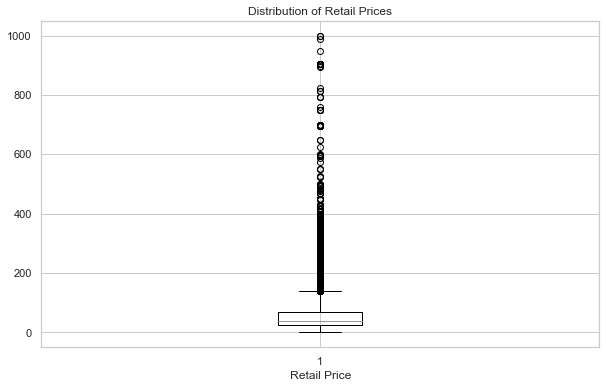

In [253]:
import matplotlib.pyplot as plt

# Boxplot으로 분포 시각화
plt.figure(figsize=(10, 6))
plt.boxplot(df_products['retail_price'])
plt.title('Distribution of Retail Prices')
plt.xlabel('Retail Price')
plt.show()

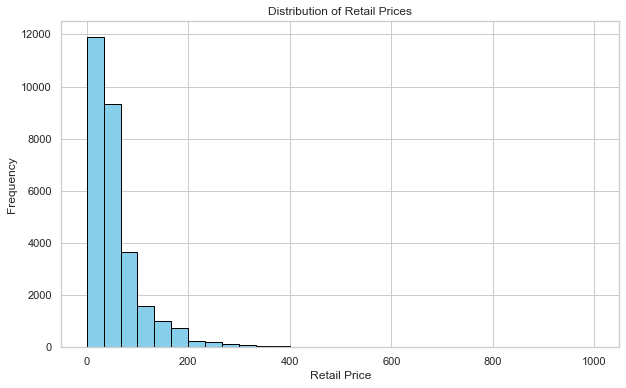

In [208]:
# 소매 가격에 대한 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(df_products['retail_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Retail Prices')
plt.xlabel('Retail Price')
plt.ylabel('Frequency')
plt.show()

### retail_price hist
- (50,100,200,500)
- 각 브랜드별

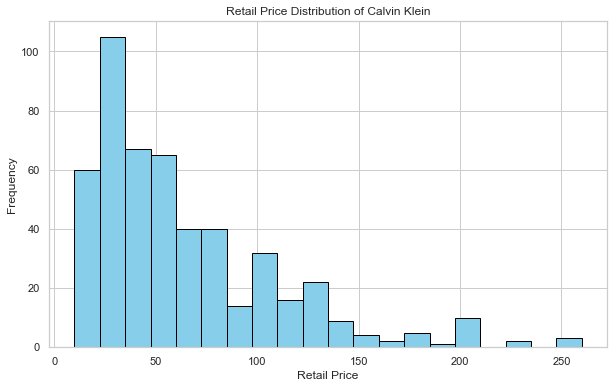

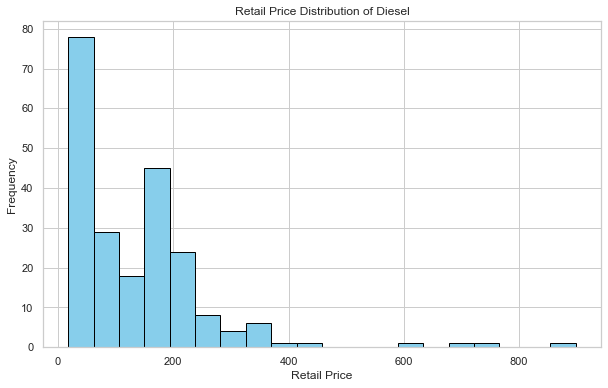

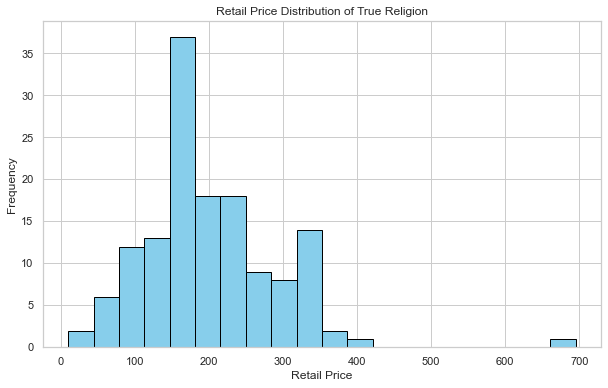

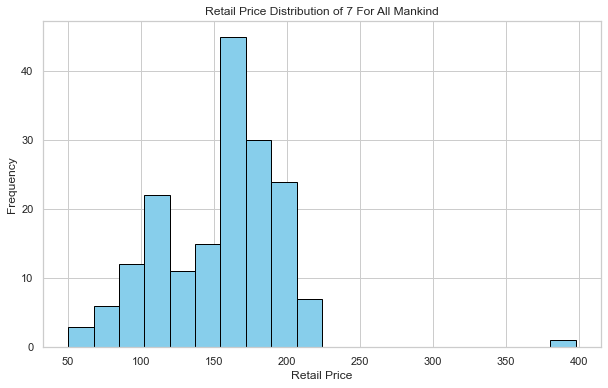

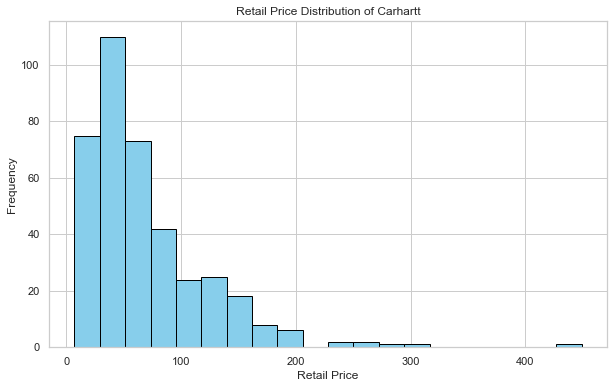

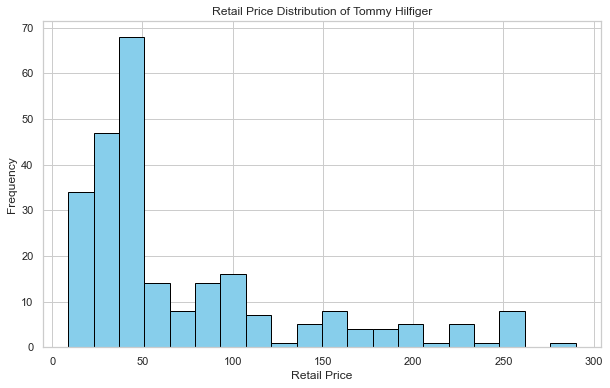

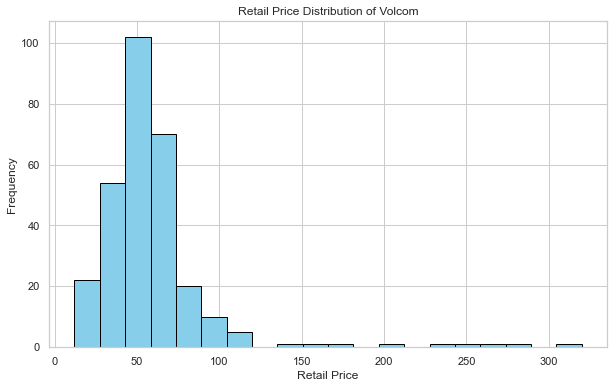

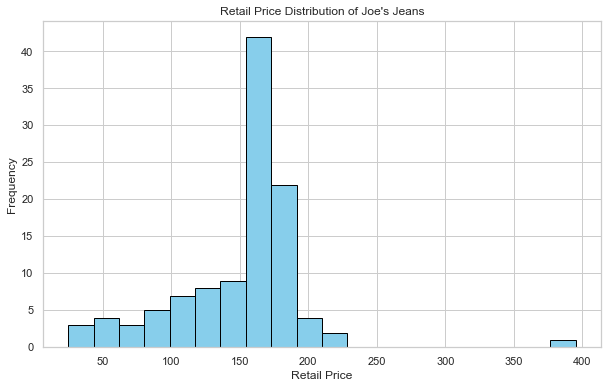

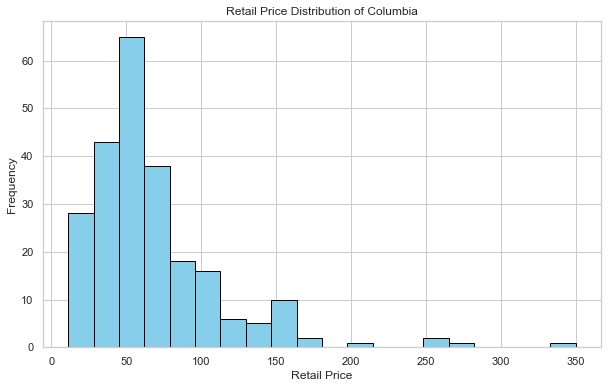

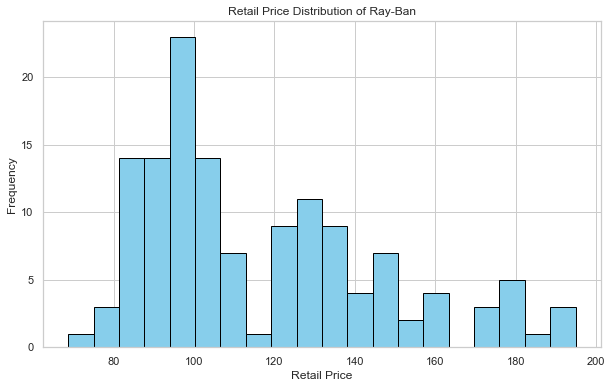

In [322]:
import matplotlib.pyplot as plt

# 상위 10개 브랜드의 이름 추출
top_10_brands = brand_performance.head(10).index

# 각 상위 10개 브랜드에 대해 소매 가격 분포 시각화
for brand in top_10_brands:
    # 선택한 브랜드의 제품들의 소매 가격 데이터 추출
    prices_by_brand = df_products[df_products['brand'] == brand]['retail_price']
    
    # 히스토그램 시각화
    plt.figure(figsize=(10, 6))
    plt.hist(prices_by_brand, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Retail Price Distribution of {brand}')
    plt.xlabel('Retail Price')
    plt.ylabel('Frequency')
    plt.show()

In [327]:
# price_range_analysis 계산
price_range_analysis = pd.cut(df_products['retail_price'], bins=[0, 50, 100, 200, 500, np.inf], labels=['0-50', '51-100', '101-200', '201-500', '501+'])
price_range_analysis

0           0-50
1           0-50
2           0-50
3           0-50
4           0-50
          ...   
29115       0-50
29116       0-50
29117       0-50
29118       0-50
29119    201-500
Name: retail_price, Length: 29118, dtype: category
Categories (5, object): ['0-50' < '51-100' < '101-200' < '201-500' < '501+']

In [328]:
# 각 범주에 속하는 제품 수 계산
price_range_counts = price_range_analysis.value_counts()
price_range_counts

retail_price
0-50       18113
51-100      7004
101-200     3177
201-500      754
501+          70
Name: count, dtype: int64

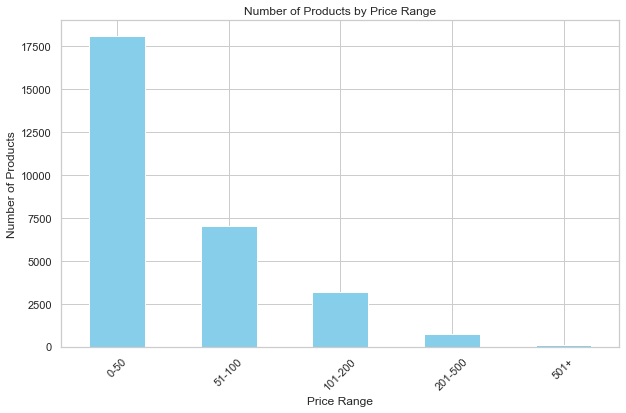

In [207]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Products by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

In [329]:
# 제품 가격대별 판매량(count) 및 수익 계산
price_range_analysis = pd.cut(df_products['retail_price'], bins=[0, 50, 100, 200, 500, np.inf], labels=['0-50', '51-100', '101-200', '201-500', '501+'])
price_range_sales = df_products.groupby(price_range_analysis)['name'].count()
price_range_revenue = df_products.groupby(price_range_analysis)['retail_price'].sum()

# 결과 출력
print(price_range_sales)
print(price_range_revenue)

retail_price
0-50       18113
51-100      7004
101-200     3177
201-500      754
501+          70
Name: name, dtype: int64
retail_price
0-50       498949.083067
51-100     501397.948460
101-200    456696.490356
201-500    213408.909882
501+        53854.750000
Name: retail_price, dtype: float64


#### top10 brands 판매가격 구간별 : 판매량, 총판매가격

In [333]:
brand_performance

retail_price
brand                          
Calvin Klein       31639.760058
Diesel             29179.169975
True Religion      28234.859927
7 For All Mankind  27549.480076
Carhartt           26674.089838
...                         ...
Eros                   2.950000
Extenders              1.750000
Wayfayrer              1.500000
Made in USA            0.490000
marshal                0.020000

[2756 rows x 1 columns]

In [331]:
# 상위 10개 브랜드 필터링
top_10_brands = brand_performance.head(10).index
top_10_brands

Index(['Calvin Klein', 'Diesel', 'True Religion', '7 For All Mankind',
       'Carhartt', 'Tommy Hilfiger', 'Volcom', 'Joe's Jeans', 'Columbia',
       'Ray-Ban'],
      dtype='object', name='brand')

In [332]:
top_10_brands_data = df_products[df_products['brand'].isin(top_10_brands)]
top_10_brands_data

id       cost     category  \
2963     292  11.414290  Tops & Tees   
2964     295  14.494200  Tops & Tees   
2965     335  16.014660  Tops & Tees   
2966     374  15.141390  Tops & Tees   
2967     413  12.688230  Tops & Tees   
...      ...        ...          ...   
27599  28255  30.650501         Swim   
27600  28300  35.945000         Swim   
27601  28429  24.004000  Accessories   
27602  28692  52.736000  Accessories   
27603  28842  27.384511  Accessories   

                                                    name           brand  \
2963   Tommy Hilfiger Slim Fit V-neck Women Logo T-shirt  Tommy Hilfiger   
2964   Tommy Hilfiger Women Long Sleeve Beads Logo V-...  Tommy Hilfiger   
2965       Tommy Hilfiger Women V-Neck Logo Polo T-Shirt  Tommy Hilfiger   
2966   Tommy Hilfiger Women Striped V-Neck Long Sleev...  Tommy Hilfiger   
2967         Tommy Hilfiger Women V-neck Striped T-shirt  Tommy Hilfiger   
...                                                  ...             ...   
27599               Diesel Men's Floral Long Board Short          Diesel   
27600                        Diesel Men's Coralrif Trunk          Diesel   
27601                            Diesel Men's Bausy Belt          Diesel   
27602                            Diesel Men's Bonio Belt          Diesel   
27603                            Diesel Men's Tiedye Tie          Diesel   

       retail_price department                               sku  \
2963      19.990000      Women  1700002963A49DA13542E0726B7BB758   
2964      24.990000      Women  49182F81E6A13CF5EAA496D51FEA6406   
2965      29.990000      Women  F9B902FC3289AF4DD08DE5D1DE54F68F   
2966      26.990000      Women  AD972F10E0800B49D76FED33A21F6698   
2967      21.990000      Women  0DEB1C54814305CA9AD266F53BC82511   
...             ...        ...                               ...   
27599     51.950001        Men  7D9B272D3486358DCE2F0195FC91C884   
27600     65.000000        Men  98FD61076EE10D53D71C80CDE8B5C954   
27601     68.000000        Men  0065827F588A93273FC4573B432622CF   
27602    128.000000        Men  54ABA384BEBF7D76045BC3DAD7251D5B   
27603     60.990002        Men  ABD146BCEAD71B89B0D035473288F07A   

       distribution_center_id  name_length  real_price     margin  
2963                        1           49    8.575710   8.575710  
2964                        1           58   10.495800  10.495800  
2965                        1           45   13.975340  13.975340  
2966                        1           60   11.848610  11.848610  
2967                        1           43    9.301770   9.301770  
...                       ...          ...         ...        ...  
27599                      10           36   21.299500  21.299500  
27600                      10           27   29.055000  29.055000  
27601                      10           23   43.996000  43.996000  
27602                      10           23   75.264000  75.264000  
27603                      10           23   33.605491  33.605491  

[2444 rows x 12 columns]

In [330]:
# 제품 가격대별 판매량(count) 및 수익 계산
price_range_sales_top_brands = top_10_brands_data.groupby(price_range_analysis)['name'].count()
price_range_revenue_top_brands = top_10_brands_data.groupby(price_range_analysis)['retail_price'].sum()

# 결과 출력
print("Price Range Sales for Top 10 Brands:")
print(price_range_sales_top_brands)
print("\nPrice Range Revenue for Top 10 Brands:")
print(price_range_revenue_top_brands)

Price Range Sales for Top 10 Brands:
retail_price
0-50       890
51-100     702
101-200    615
201-500    146
501+        17
Name: name, dtype: int64

Price Range Revenue for Top 10 Brands:
retail_price
0-50       29479.030170
51-100     50881.169800
101-200    91962.269928
201-500    39064.739899
501+       14483.000000
Name: retail_price, dtype: float64


In [334]:
# 각 브랜드별로 가격대별 판매량(count) 및 판매가격 계산
for brand in top_10_brands:
    brand_data = df_products[df_products['brand'] == brand]
    brand_price_range_sales = brand_data.groupby(price_range_analysis)['name'].count()
    brand_price_range_revenue = brand_data.groupby(price_range_analysis)['retail_price'].sum()
    
    # 결과 출력
    print(f"\nPrice Range Sales for {brand}:")
    print(brand_price_range_sales)
    print(f"\nPrice Range Revenue for {brand}:")
    print(brand_price_range_revenue)


Price Range Sales for Calvin Klein:
retail_price
0-50       252
51-100     157
101-200     83
201-500      5
501+         0
Name: name, dtype: int64

Price Range Revenue for Calvin Klein:
retail_price
0-50        7629.440024
51-100     11315.699986
101-200    11458.650078
201-500     1235.969971
501+           0.000000
Name: retail_price, dtype: float64

Price Range Sales for Diesel:
retail_price
0-50       69
51-100     36
101-200    76
201-500    33
501+        4
Name: name, dtype: int64

Price Range Revenue for Diesel:
retail_price
0-50        2124.130001
51-100      2590.900013
101-200    12632.339973
201-500     8879.799988
501+        2952.000000
Name: retail_price, dtype: float64

Price Range Sales for True Religion:
retail_price
0-50        3
51-100     12
101-200    71
201-500    54
501+        1
Name: name, dtype: int64

Price Range Revenue for True Religion:
retail_price
0-50          98.390002
51-100       978.890015
101-200    11350.249939
201-500    15112.329971
501+    

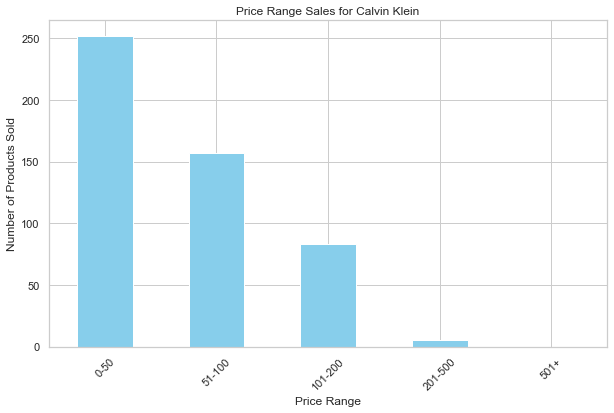

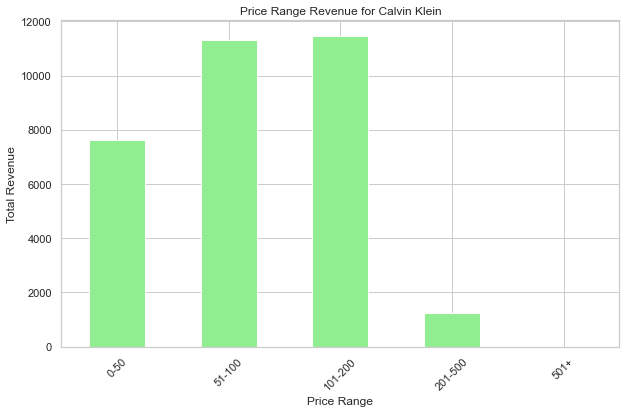

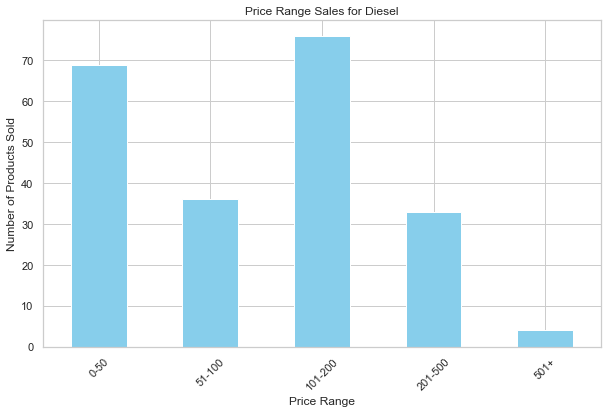

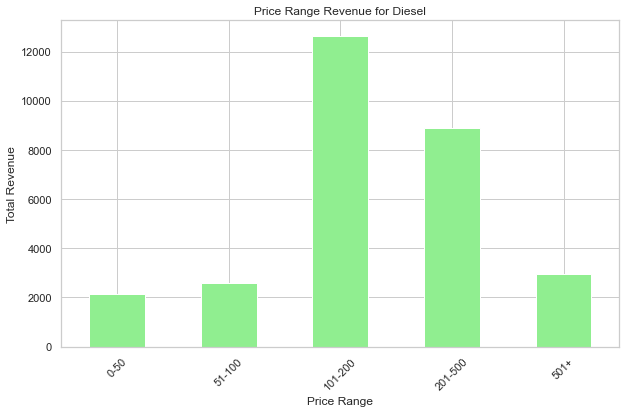

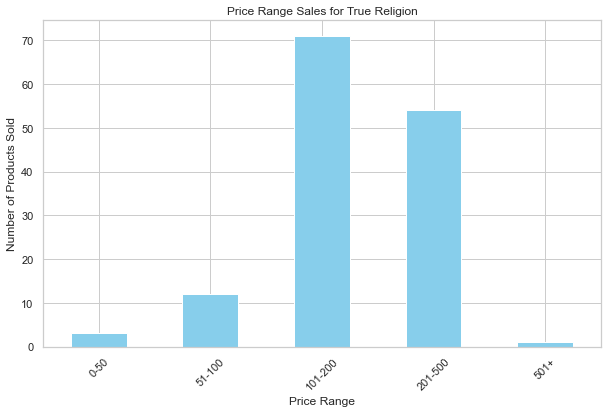

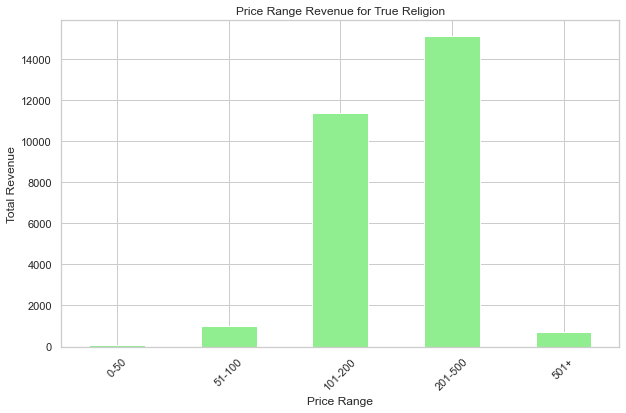

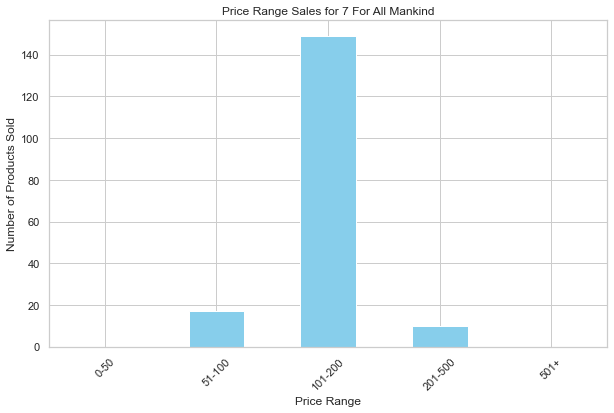

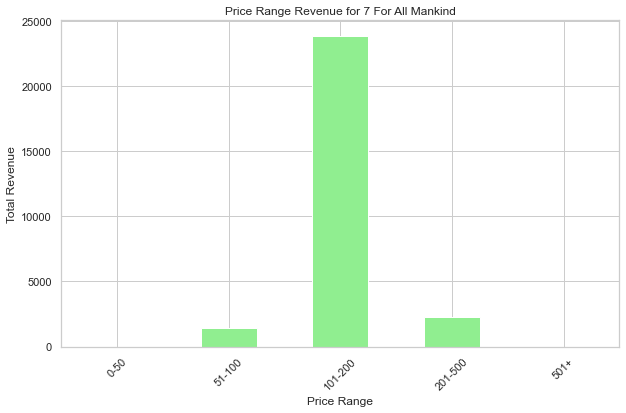

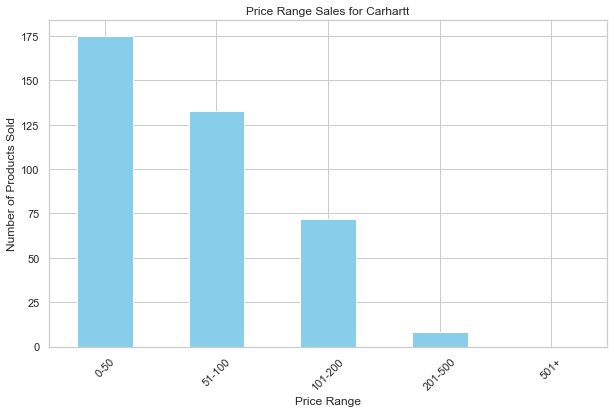

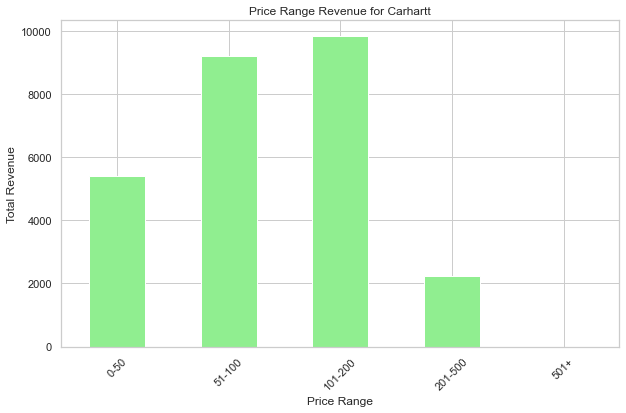

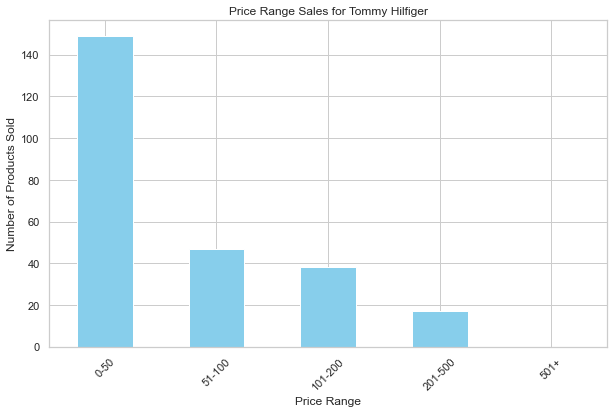

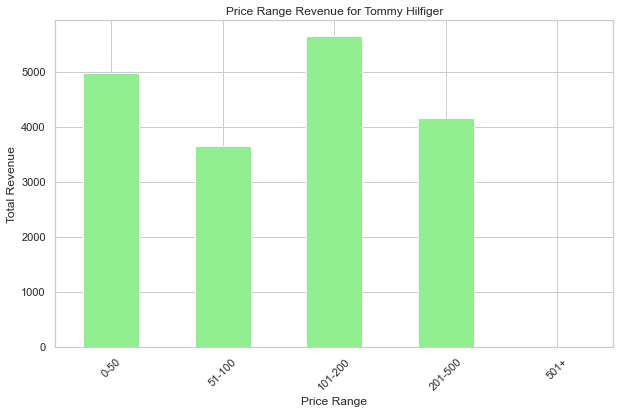

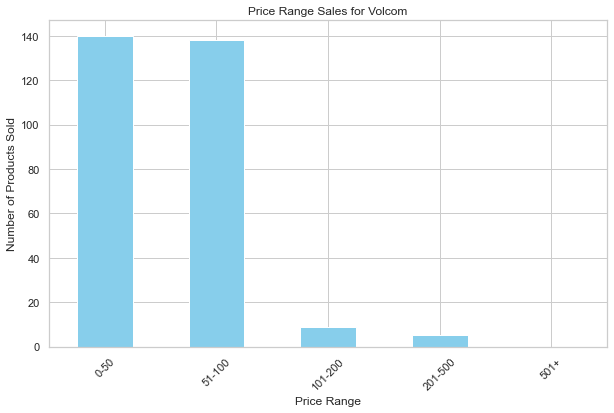

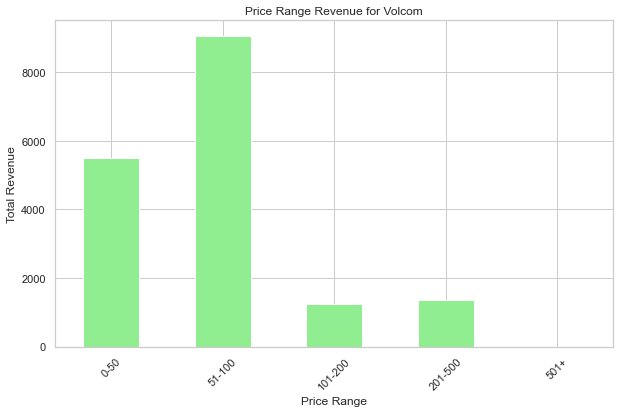

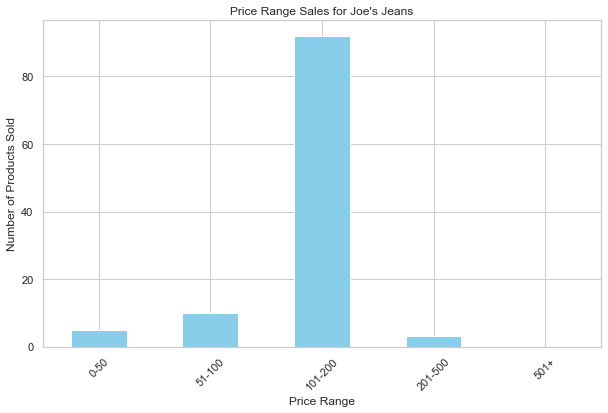

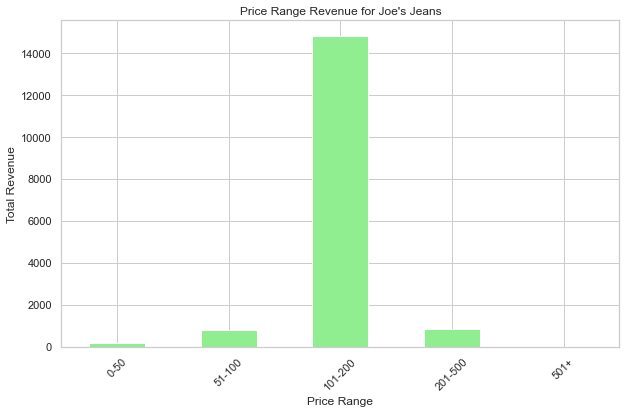

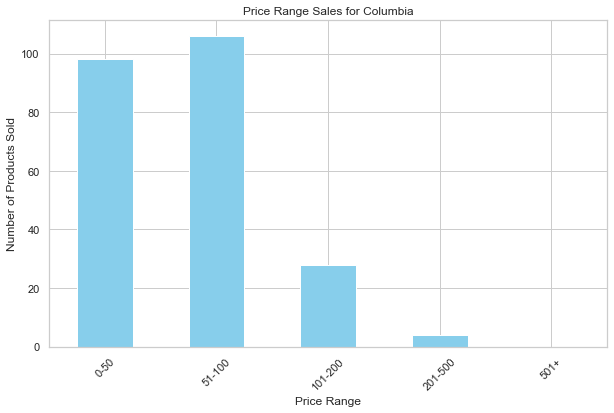

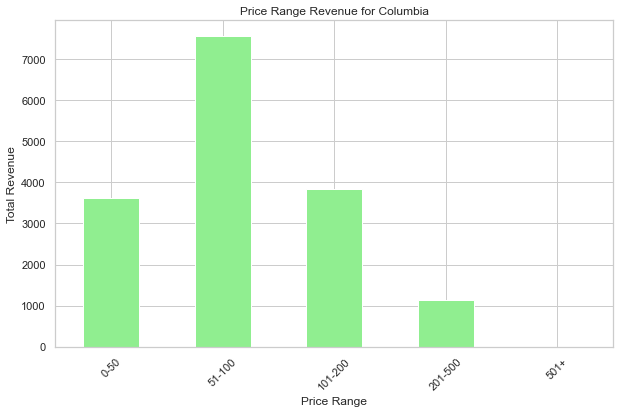

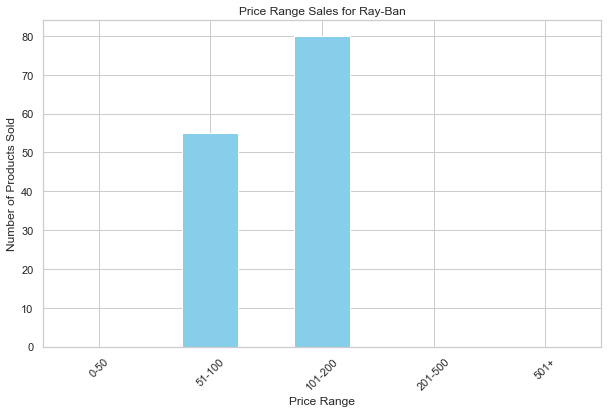

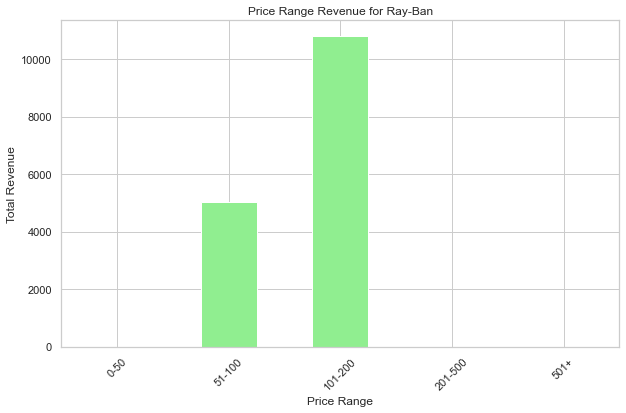

In [335]:
import matplotlib.pyplot as plt

# 각 브랜드별로 가격대별 판매량(count) 및 판매가격 및 시각화
for brand in top_10_brands:
    brand_data = df_products[df_products['brand'] == brand]
    brand_price_range_sales = brand_data.groupby(price_range_analysis)['name'].count()
    brand_price_range_revenue = brand_data.groupby(price_range_analysis)['retail_price'].sum()
    
    # 판매량 시각화
    plt.figure(figsize=(10, 6))
    brand_price_range_sales.plot(kind='bar', color='skyblue')
    plt.title(f'Price Range Sales for {brand}')
    plt.xlabel('Price Range')
    plt.ylabel('Number of Products Sold')
    plt.xticks(rotation=45)
    plt.show()
    
    # 수익 시각화
    plt.figure(figsize=(10, 6))
    brand_price_range_revenue.plot(kind='bar', color='lightgreen')
    plt.title(f'Price Range Revenue for {brand}')
    plt.xlabel('Price Range')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.show()

#### Top 10 Brands ( Sales & Revenue)

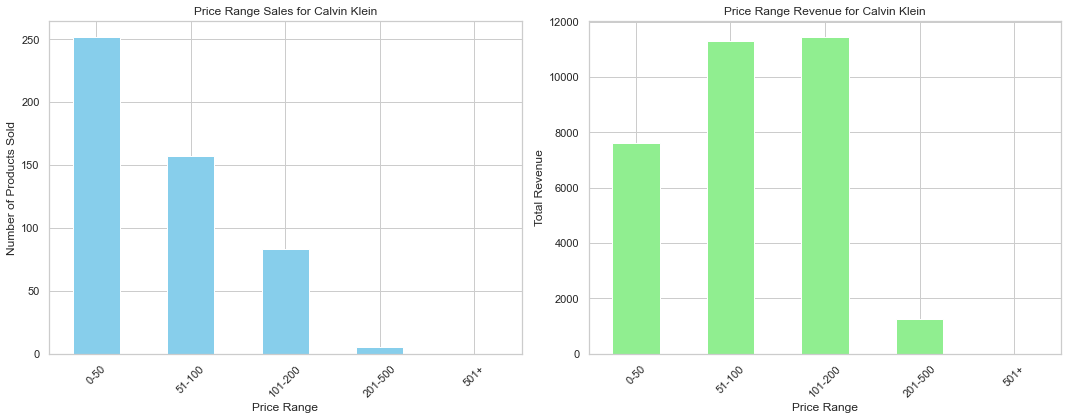

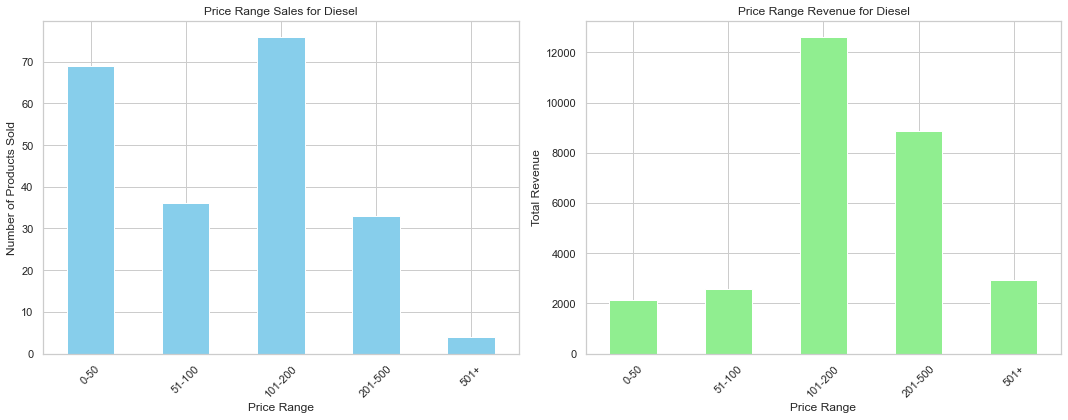

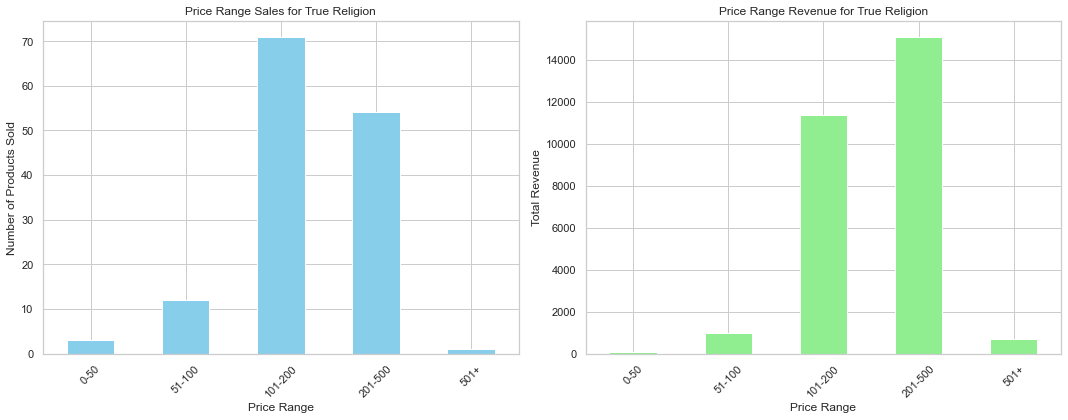

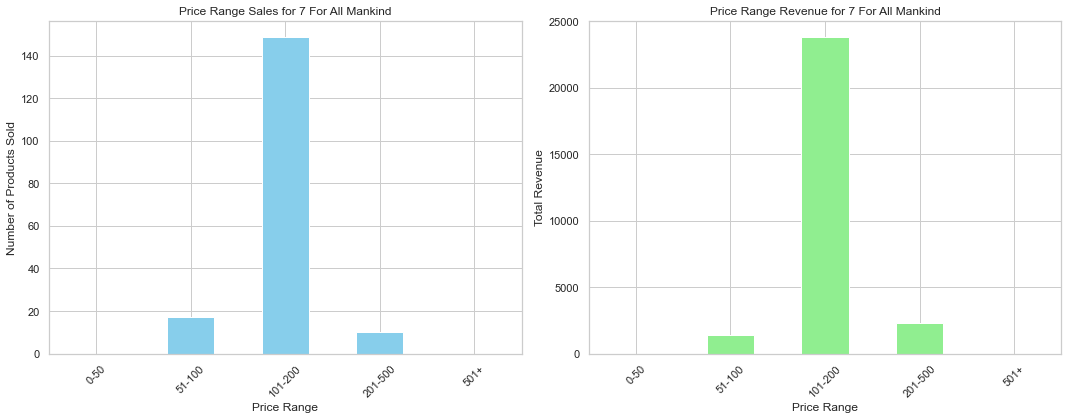

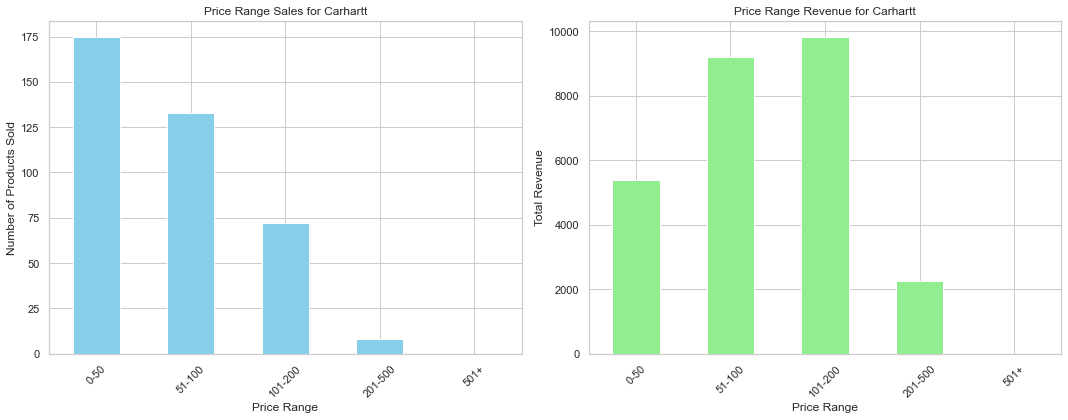

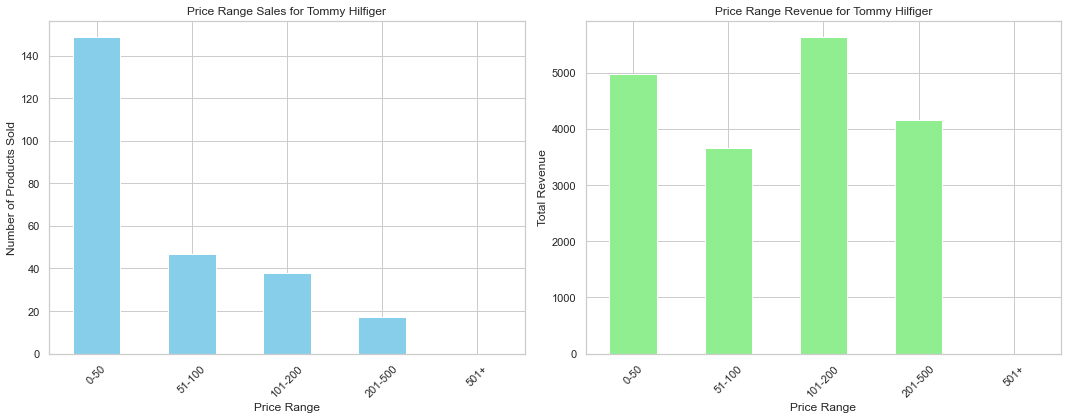

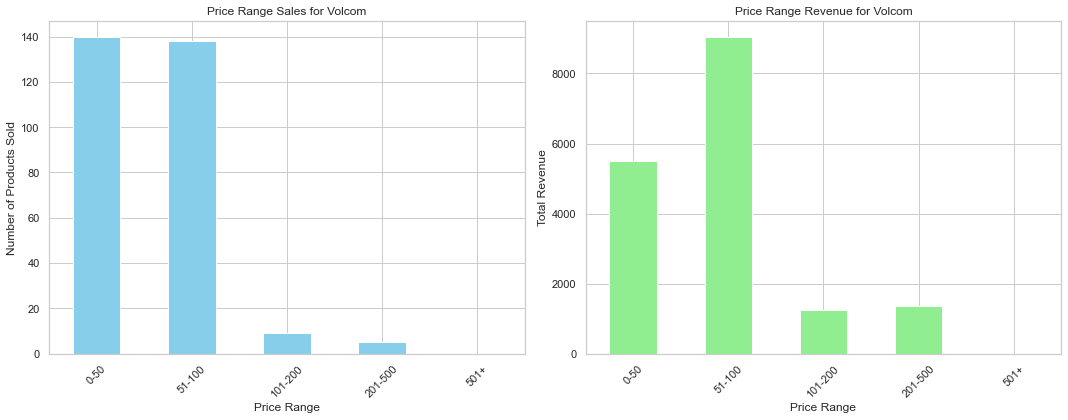

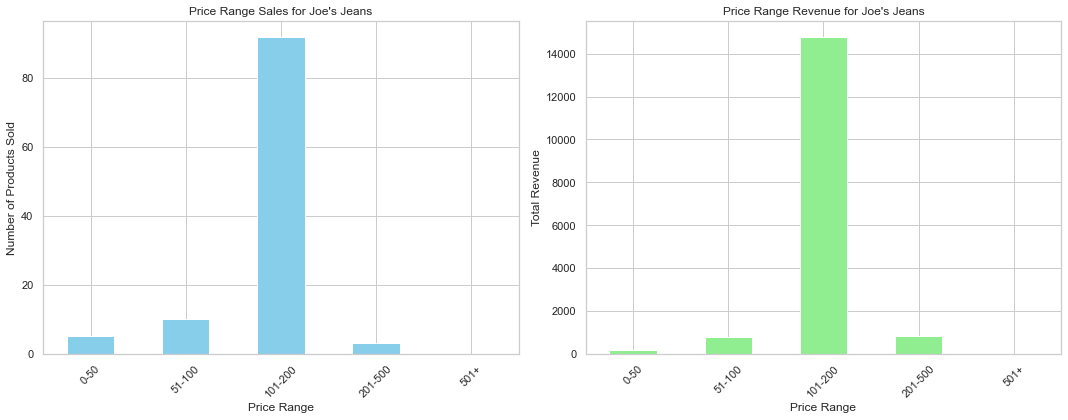

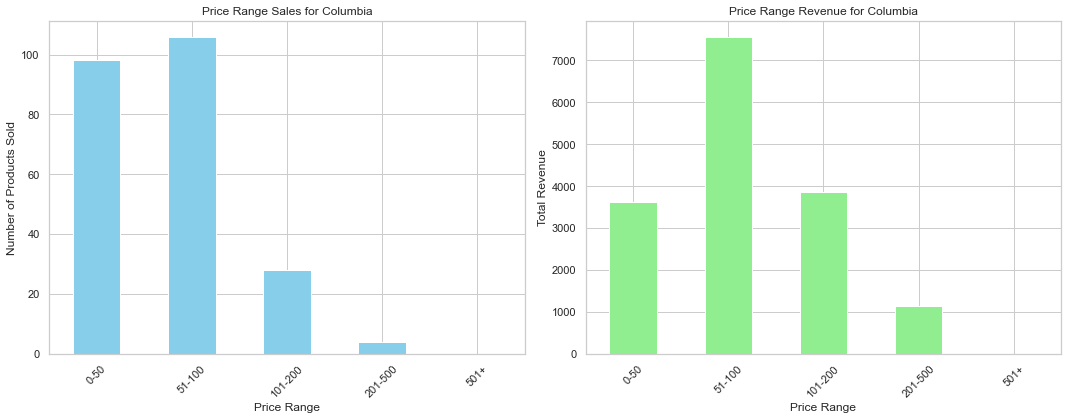

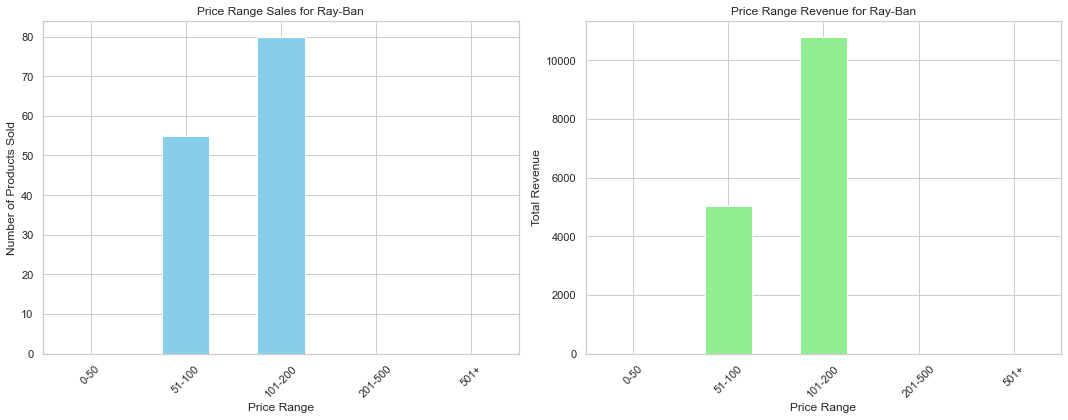

In [336]:
import matplotlib.pyplot as plt

# 각 브랜드별로 가격대별 판매량(count) 및 수익 계산 및 시각화
for brand in top_10_brands:
    brand_data = df_products[df_products['brand'] == brand]
    brand_price_range_sales = brand_data.groupby(price_range_analysis)['name'].count()
    brand_price_range_revenue = brand_data.groupby(price_range_analysis)['retail_price'].sum()
    
    # 1열: 판매량 시각화
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    brand_price_range_sales.plot(kind='bar', color='skyblue')
    plt.title(f'Price Range Sales for {brand}')
    plt.xlabel('Price Range')
    plt.ylabel('Number of Products Sold')
    plt.xticks(rotation=45)
    
    # 2열: 수익 시각화
    plt.subplot(1, 2, 2)
    brand_price_range_revenue.plot(kind='bar', color='lightgreen')
    plt.title(f'Price Range Revenue for {brand}')
    plt.xlabel('Price Range')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    
    # 그래프 표시
    plt.tight_layout()
    plt.show()

## margin (retail_price - cost)

In [259]:
df_products['margin'] = df_products['retail_price'] - df_products['cost']
df_products['margin']

0          3.73125
1          3.61165
2          6.11044
3          6.34123
4          9.48207
           ...    
29115     11.74662
29116     11.32500
29117     12.60000
29118     11.52500
29119    147.15900
Name: margin, Length: 29118, dtype: float64

In [304]:
# 각 브랜드별 제품 판매량(sum) 및 수익 계산
brand_performance_margin = df_products.groupby('brand').agg({'margin': 'sum'})

# 결과 출력 (상위 10개 브랜드만)
print(brand_performance_margin.head(10))

                   margin
brand                    
!it Jeans      328.268869
'47 Brand       35.052000
007Lingerie     16.889580
10 Deep         50.311799
106Shades       29.288459
12XLShop Inc.   23.497201
180s           284.406409
1826            10.396350
1WorldSarong    30.361130
1veMoon         20.704551


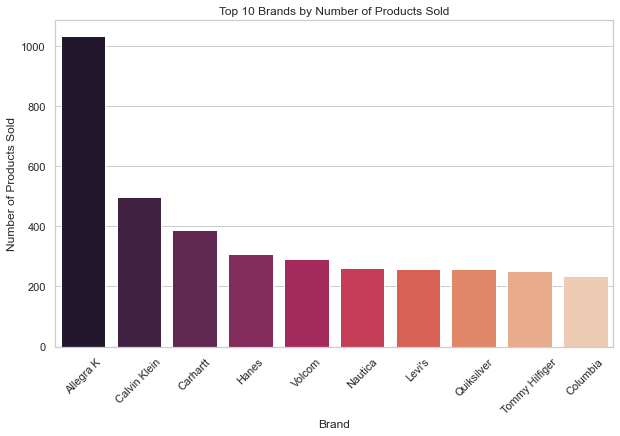

In [305]:
# name 열로 정렬된 데이터를 기반으로 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_performance_margin_sorted_by_name.head(10).index, y=brand_performance_margin_sorted_by_name.head(10)['name'], palette="rocket")
plt.xlabel('Brand')
plt.ylabel('Number of Products Sold')
plt.title('Top 10 Brands by Number of Products Sold')
plt.xticks(rotation=45)
plt.show()

### Top 10 Brands (margin)

In [306]:
# retail_price 열로 정렬
brand_performance_sorted_by_margin = brand_performance_margin.sort_values(by='margin', ascending=False)

# 결과 출력 (상위 10개 브랜드만)
print("\nTop 10 Brands by Total Revenue:")
print(brand_performance_sorted_by_margin.head(10))


Top 10 Brands by Total Revenue:
                         margin
brand                          
Calvin Klein       16808.011931
Diesel             14557.467016
Carhartt           14200.685577
True Religion      13487.309826
7 For All Mankind  13153.756015
Tommy Hilfiger     10084.807192
Ray-Ban             9126.277185
Columbia            8767.415278
Volcom              8442.777392
The North Face      8304.261710


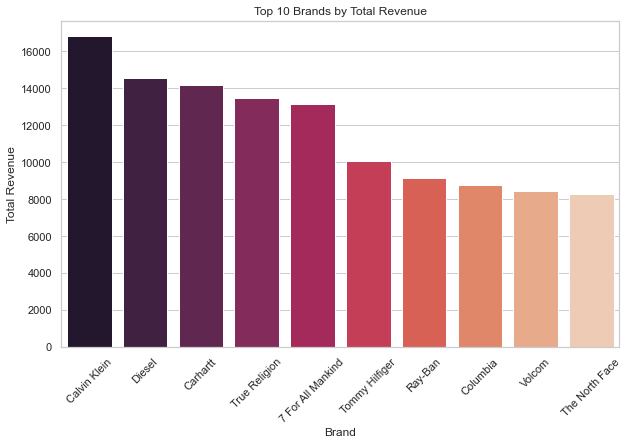

In [307]:
# margin 열로 정렬된 데이터를 기반으로 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_performance_sorted_by_margin.head(10).index, y=brand_performance_sorted_by_margin.head(10)['margin'], palette="rocket")
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.title('Top 10 Brands by Total Revenue')
plt.xticks(rotation=45)
plt.show()

### margin hist (top 10)

In [263]:
brand_performance_sorted_by_price

name  retail_price
brand                                
Calvin Klein        497  31639.760058
Diesel              218  29179.169975
True Religion       141  28234.859927
7 For All Mankind   176  27549.480076
Carhartt            388  26674.089838
...                 ...           ...
Eros                  1      2.950000
Extenders             1      1.750000
Wayfayrer             1      1.500000
Made in USA           1      0.490000
marshal               1      0.020000

[2756 rows x 2 columns]

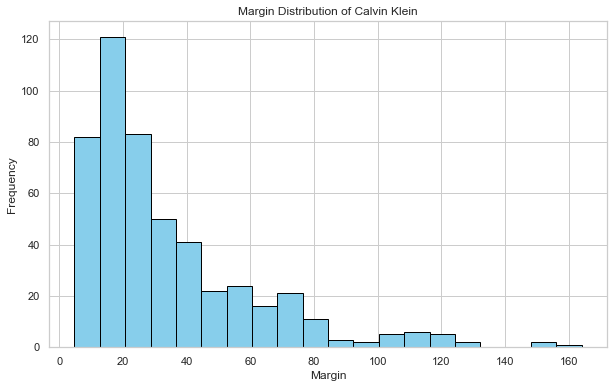

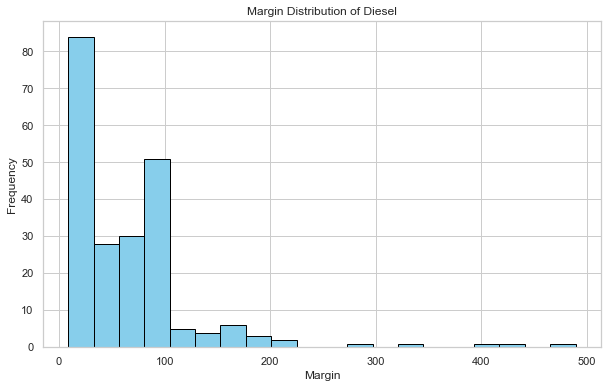

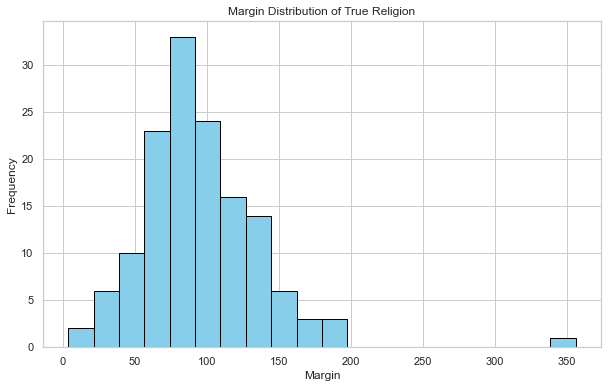

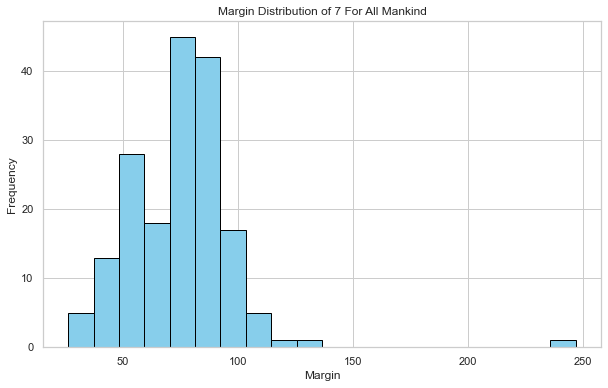

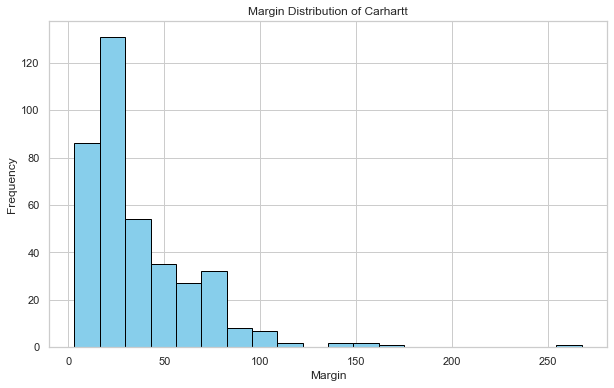

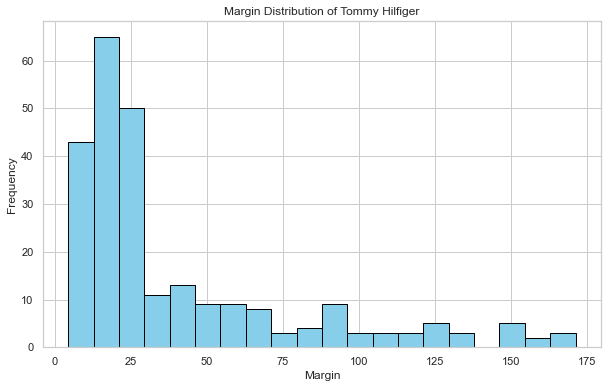

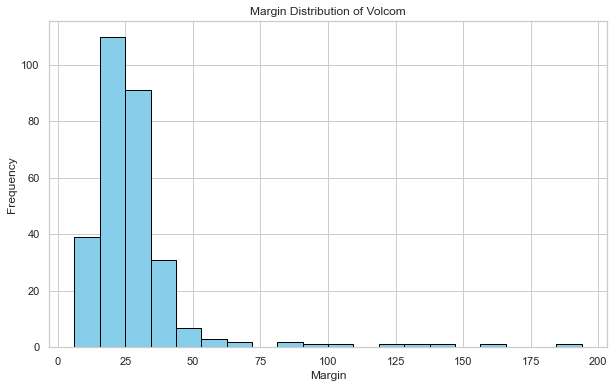

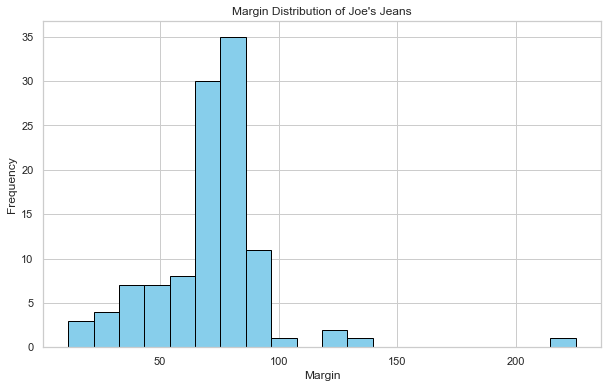

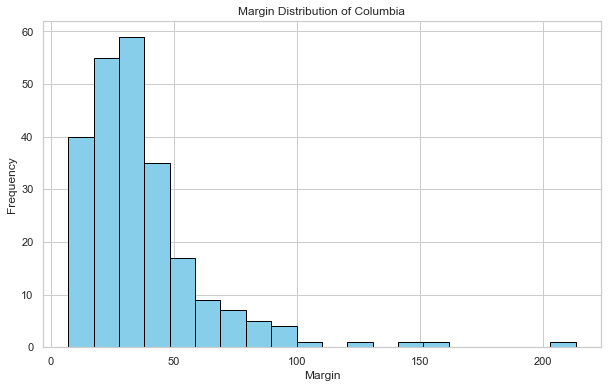

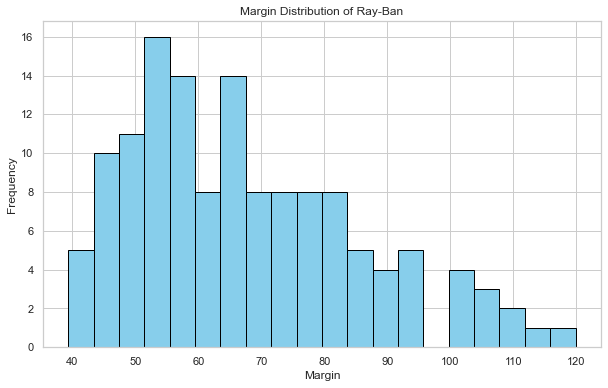

In [260]:
import matplotlib.pyplot as plt

# 상위 10개 브랜드의 이름 추출
top_10_brands = brand_performance_sorted_by_price.head(10).index

# 각 상위 10개 브랜드에 대해 이윤 분포 시각화
for brand in top_10_brands:
    # 선택한 브랜드의 제품들의 이윤 데이터 추출
    prices_by_brand = df_products[df_products['brand'] == brand]['margin']
    
    # 히스토그램 시각화
    plt.figure(figsize=(10, 6))
    plt.hist(prices_by_brand, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Margin Distribution of {brand}')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    plt.show()

In [245]:
# 제품 가격대별 판매량(count) 및 수익 계산
price_range_analysis = pd.cut(df_products['real_price'], bins=[0, 50, 100, 200, 500, np.inf], labels=['0-50', '51-100', '101-200', '201-500', '501+'])
price_range_sales = df_products.groupby(price_range_analysis)['name'].count()
price_range_revenue = df_products.groupby(price_range_analysis)['real_price'].sum()

# 결과 출력
print(price_range_sales)
print(price_range_revenue)

real_price
0-50       24500
51-100      3522
101-200      915
201-500      166
501+          15
Name: name, dtype: int64
real_price
0-50       474331.507434
51-100     243139.174074
101-200    122099.096667
201-500     47465.330183
501+         7969.114979
Name: real_price, dtype: float64


In [246]:
# 상위 10개 브랜드 필터링
top_10_brands = brand_performance_sorted_by_price.head(10).index
top_10_brands_data = df_products[df_products['brand'].isin(top_10_brands)]

# 제품 가격대별 판매량(count) 및 수익 계산
price_range_sales_top_brands = top_10_brands_data.groupby(price_range_analysis)['name'].count()
price_range_revenue_top_brands = top_10_brands_data.groupby(price_range_analysis)['real_price'].sum()

# 결과 출력
print("Price Range Sales for Top 10 Brands:")
print(price_range_sales_top_brands)
print("\nPrice Range Revenue for Top 10 Brands:")
print(price_range_revenue_top_brands)

Price Range Sales for Top 10 Brands:
real_price
0-50       1516
51-100      744
101-200     172
201-500      12
501+          0
Name: name, dtype: int64

Price Range Revenue for Top 10 Brands:
real_price
0-50       36608.981887
51-100     54203.827635
101-200    22040.890643
201-500     3632.563587
501+           0.000000
Name: real_price, dtype: float64


In [247]:
# 각 브랜드별로 가격대별 판매량(count) 및 수익 계산
for brand in top_10_brands:
    brand_data = df_products[df_products['brand'] == brand]
    brand_price_range_sales = brand_data.groupby(price_range_analysis)['name'].count()
    brand_price_range_revenue = brand_data.groupby(price_range_analysis)['real_price'].sum()
    
    # 결과 출력
    print(f"\nPrice Range Sales for {brand}:")
    print(brand_price_range_sales)
    print(f"\nPrice Range Revenue for {brand}:")
    print(brand_price_range_revenue)


Price Range Sales for Calvin Klein:
real_price
0-50       393
51-100      83
101-200     21
201-500      0
501+         0
Name: name, dtype: int64

Price Range Revenue for Calvin Klein:
real_price
0-50       8752.937405
51-100     5541.273403
101-200    2513.801122
201-500       0.000000
501+          0.000000
Name: real_price, dtype: float64

Price Range Sales for Diesel:
real_price
0-50       106
51-100      79
101-200     26
201-500      7
501+         0
Name: name, dtype: int64

Price Range Revenue for Diesel:
real_price
0-50       2387.600394
51-100     6341.031952
101-200    3504.738671
201-500    2324.095998
501+          0.000000
Name: real_price, dtype: float64

Price Range Sales for True Religion:
real_price
0-50       11
51-100     77
101-200    52
201-500     1
501+        0
Name: name, dtype: int64

Price Range Revenue for True Religion:
real_price
0-50        337.868793
51-100     5924.228280
101-200    6869.372753
201-500     355.840000
501+          0.000000
Name: real

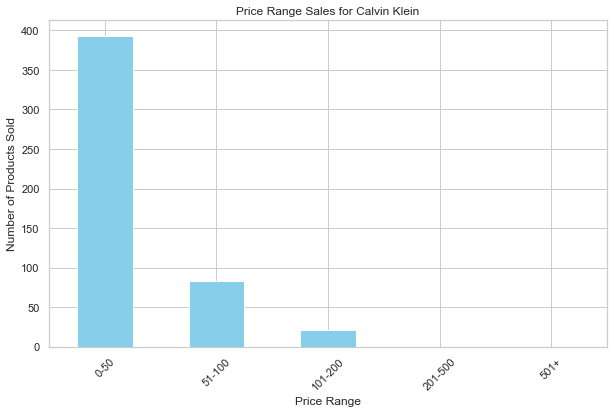

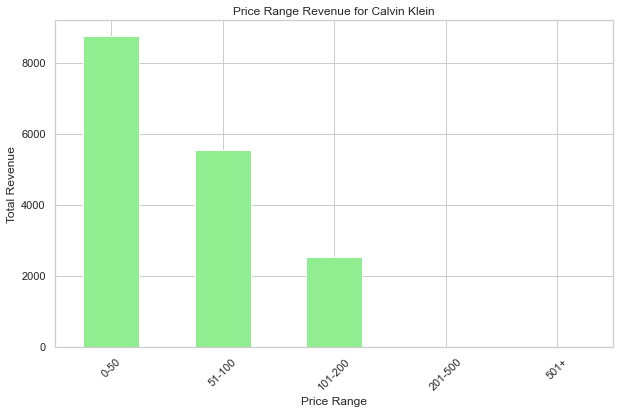

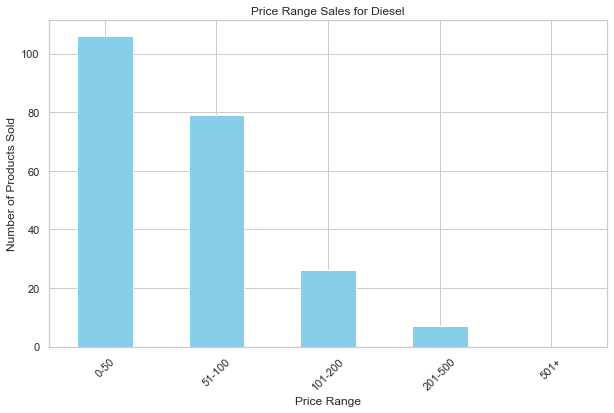

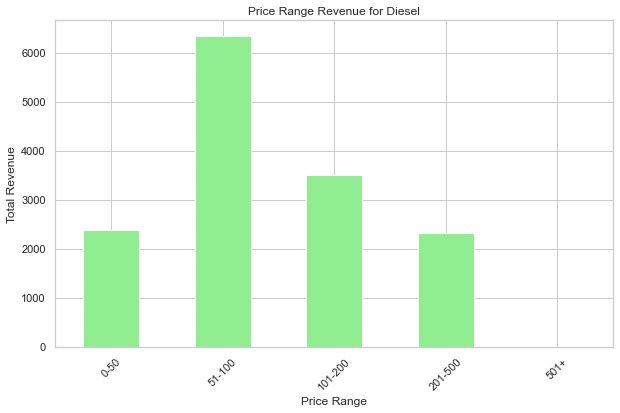

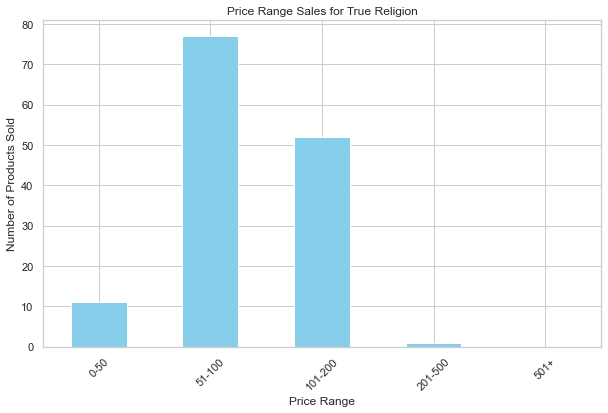

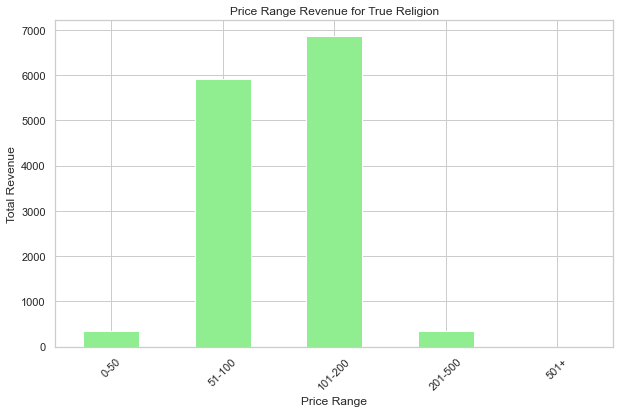

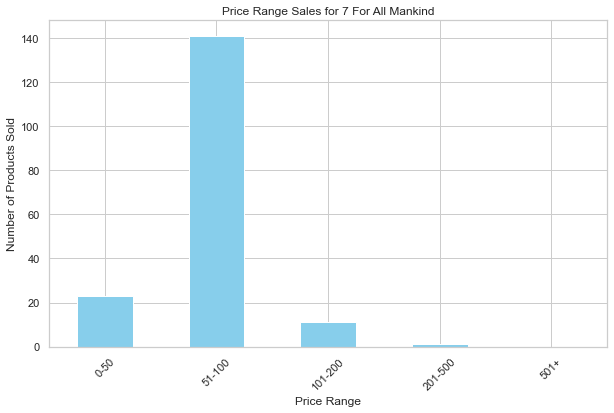

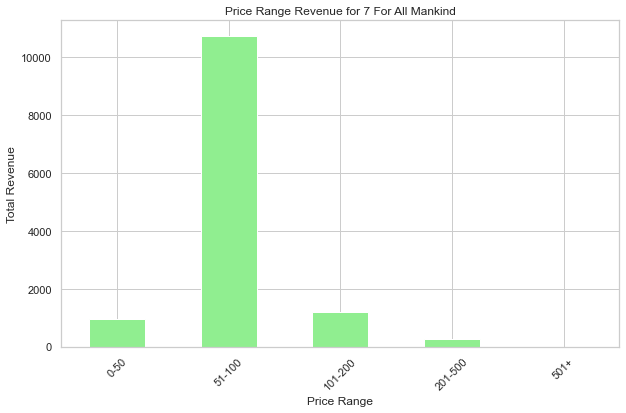

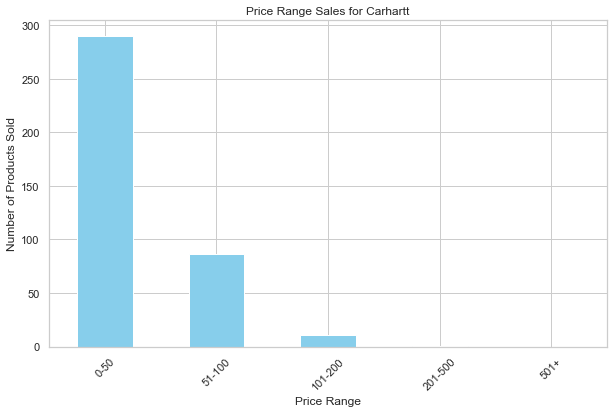

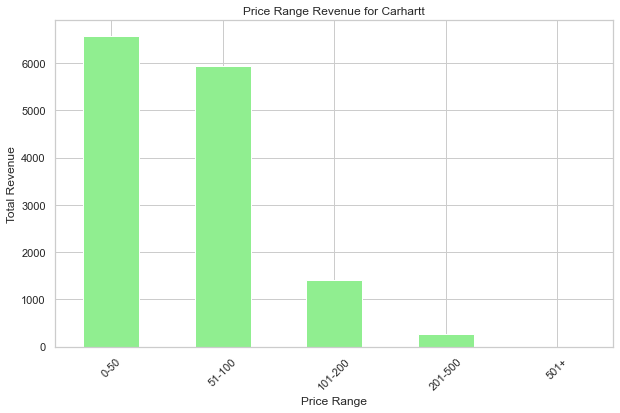

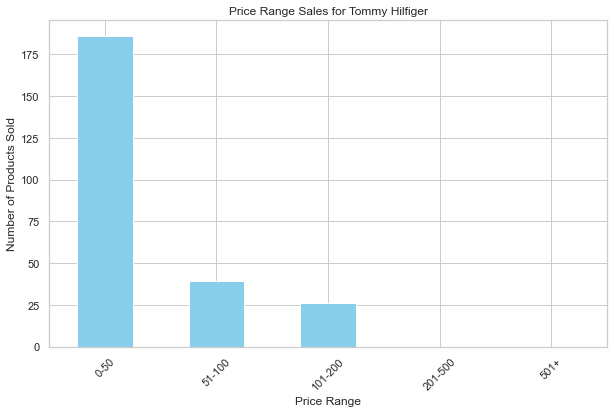

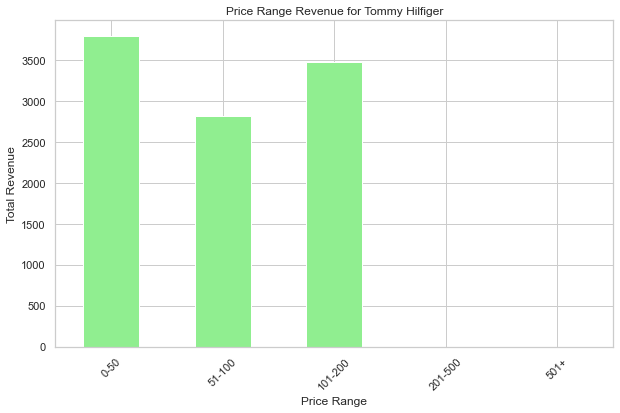

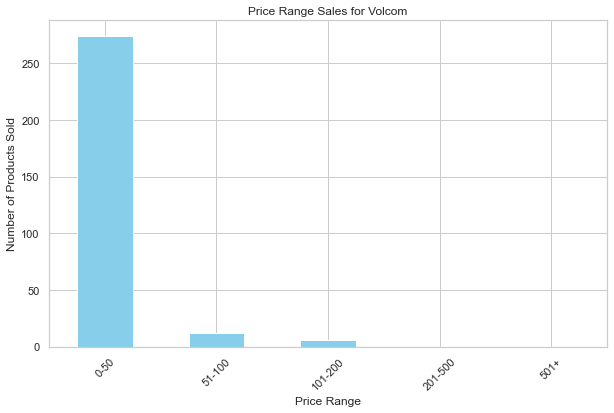

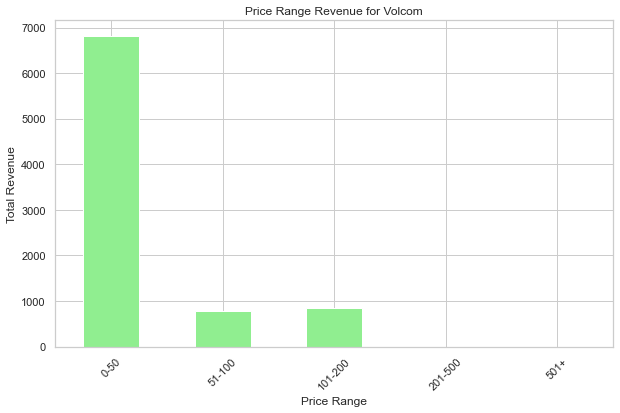

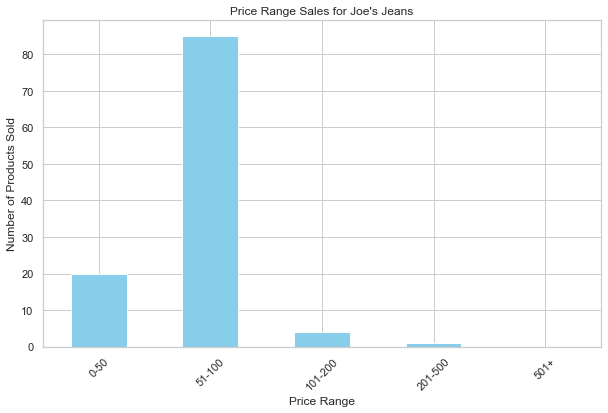

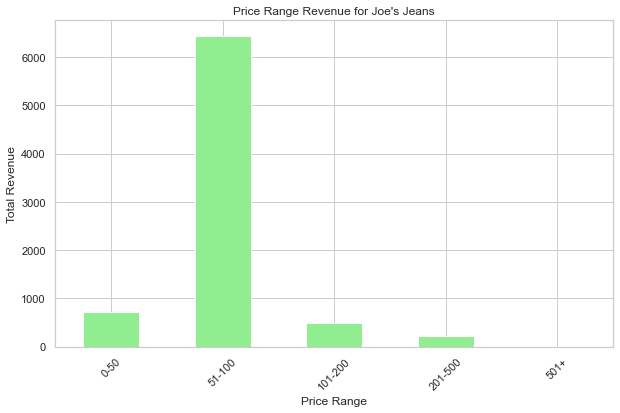

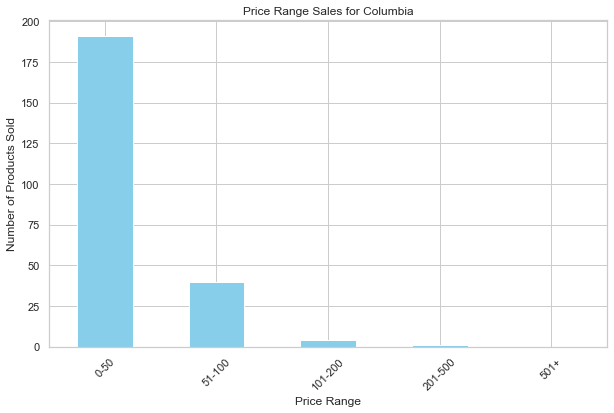

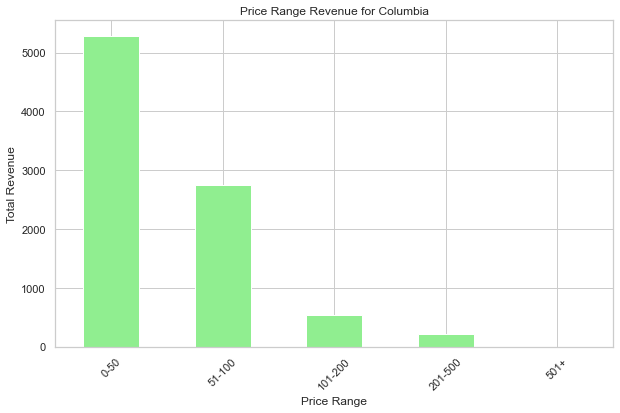

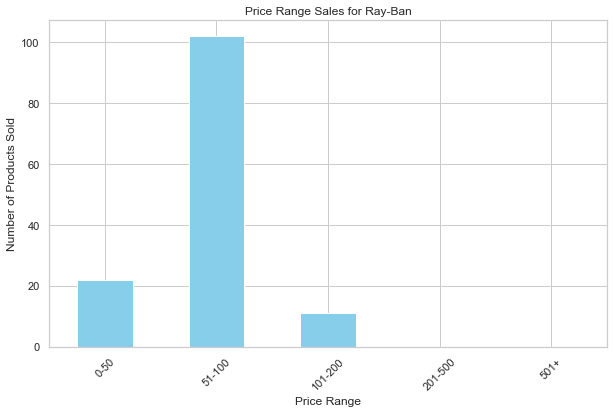

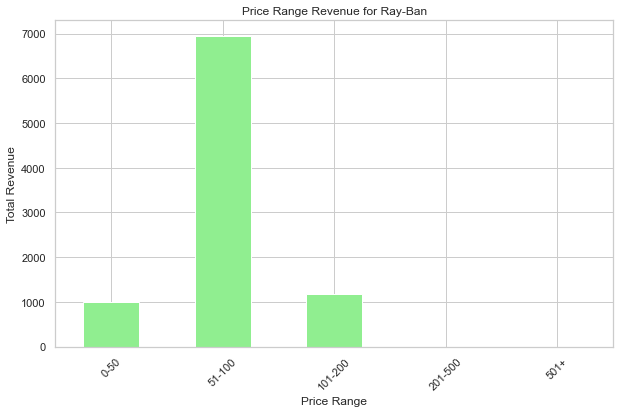

In [248]:
import matplotlib.pyplot as plt

# 각 브랜드별로 가격대별 판매량(count) 및 수익 계산 및 시각화
for brand in top_10_brands:
    brand_data = df_products[df_products['brand'] == brand]
    brand_price_range_sales = brand_data.groupby(price_range_analysis)['name'].count()
    brand_price_range_revenue = brand_data.groupby(price_range_analysis)['real_price'].sum()
    
    # 판매량 시각화
    plt.figure(figsize=(10, 6))
    brand_price_range_sales.plot(kind='bar', color='skyblue')
    plt.title(f'Price Range Sales for {brand}')
    plt.xlabel('Price Range')
    plt.ylabel('Number of Products Sold')
    plt.xticks(rotation=45)
    plt.show()
    
    # 수익 시각화
    plt.figure(figsize=(10, 6))
    brand_price_range_revenue.plot(kind='bar', color='lightgreen')
    plt.title(f'Price Range Revenue for {brand}')
    plt.xlabel('Price Range')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.show()

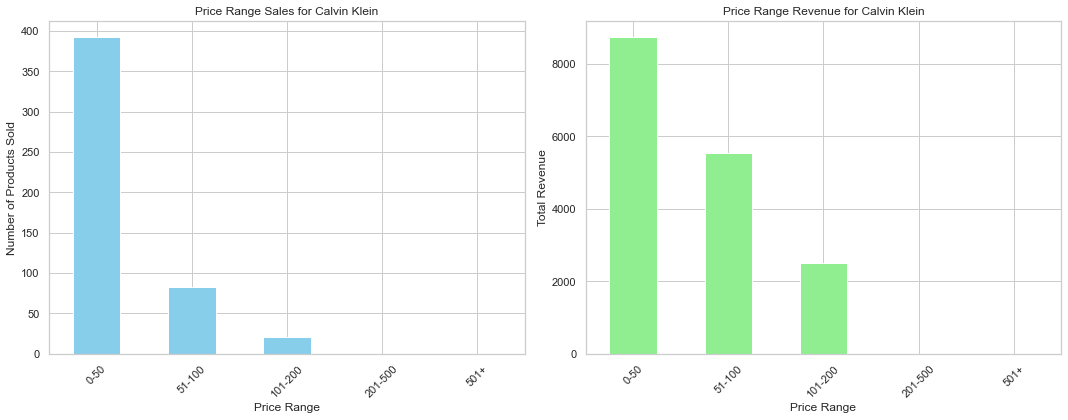

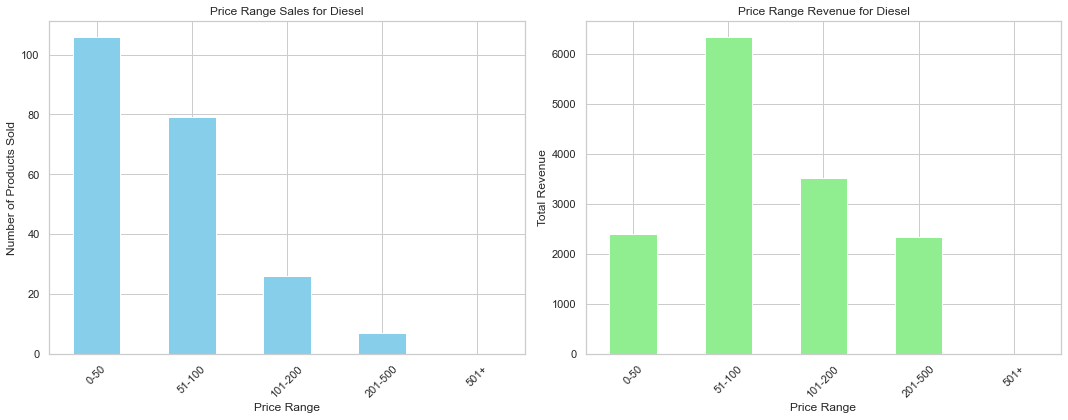

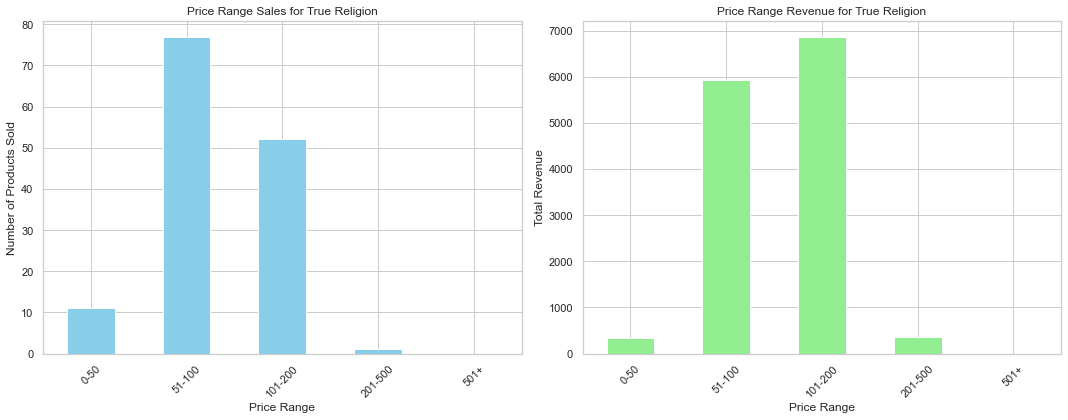

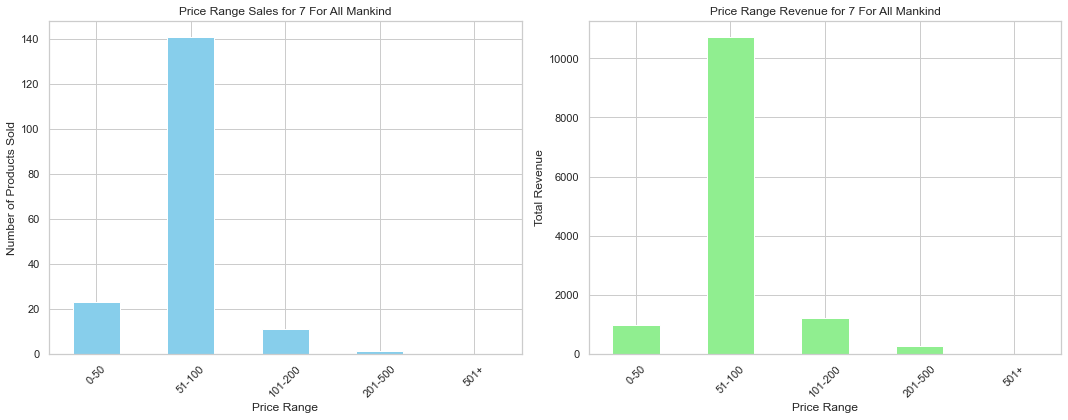

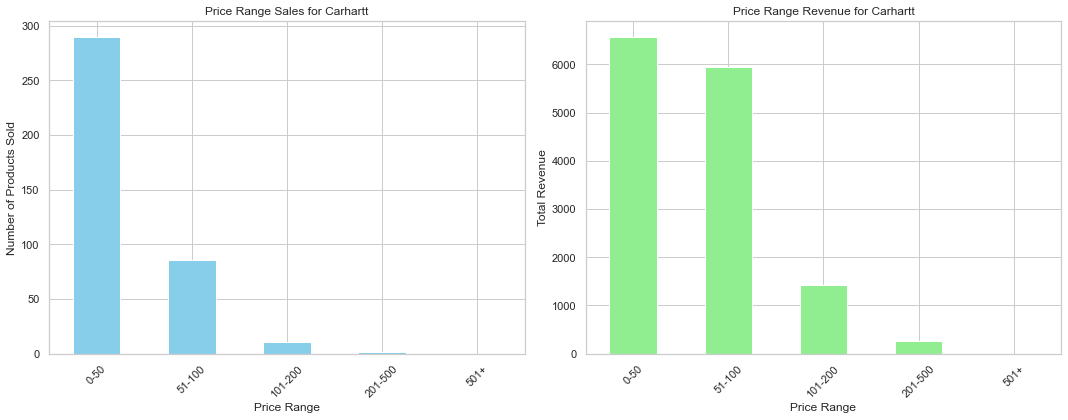

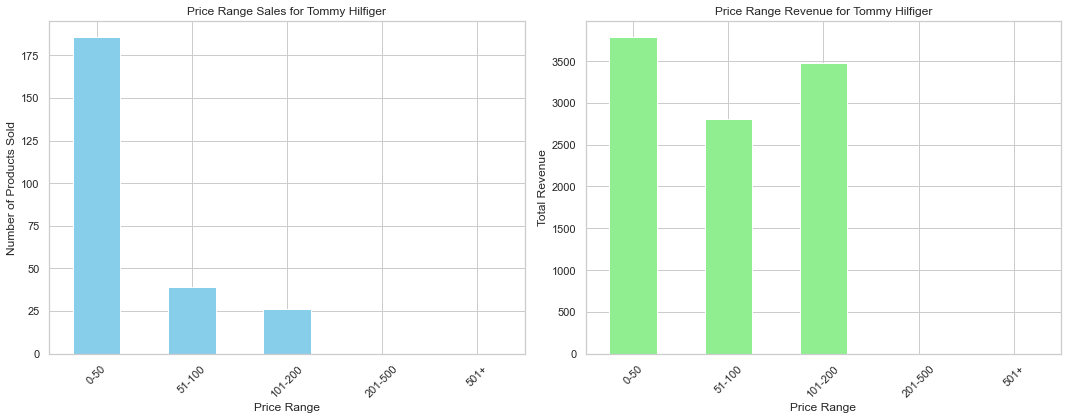

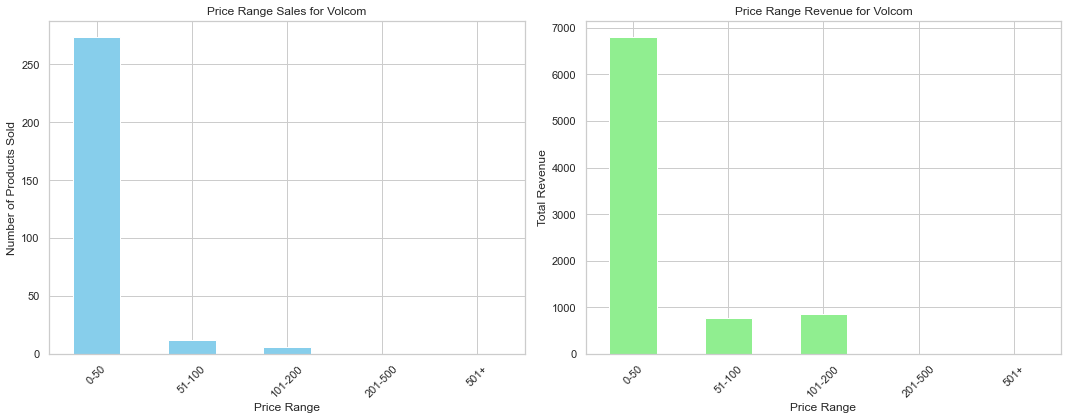

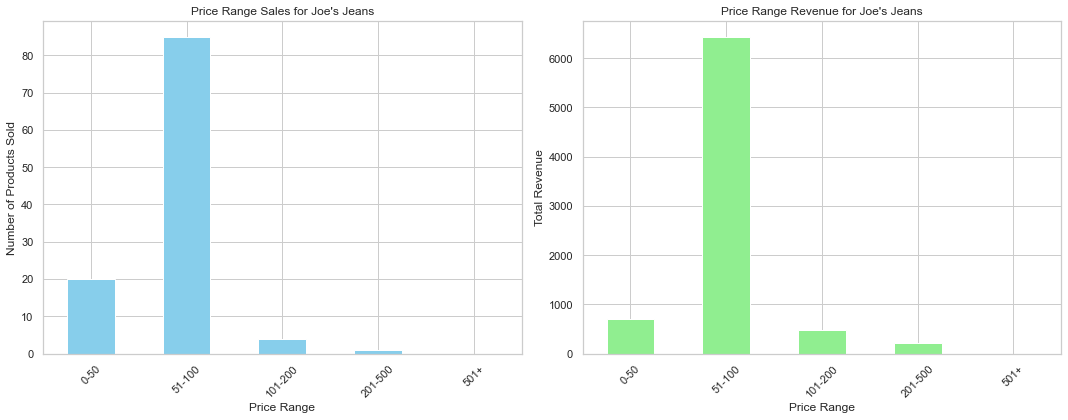

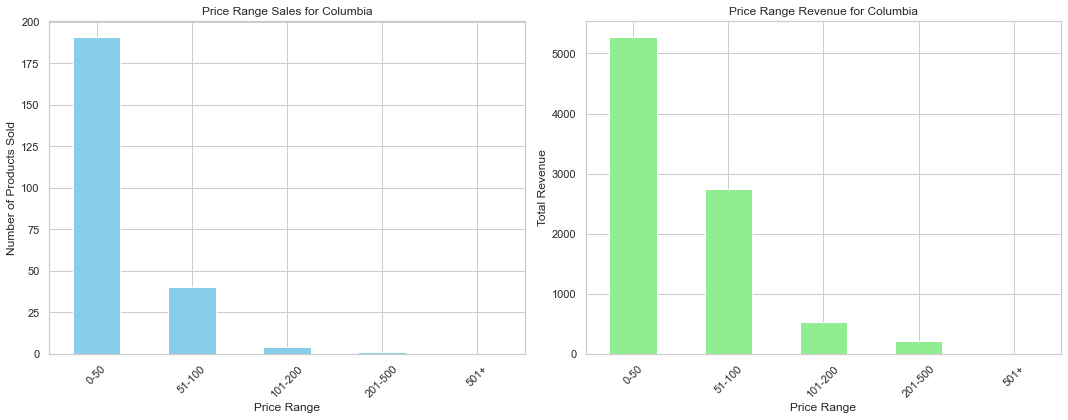

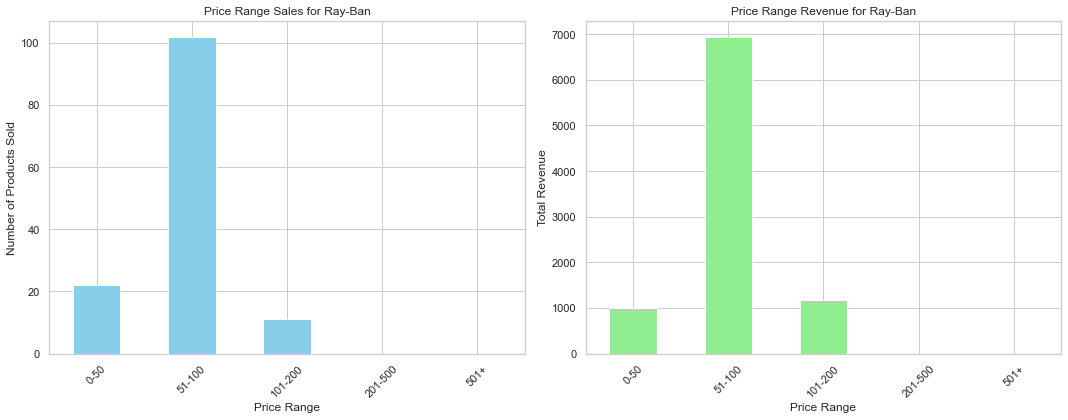

In [262]:
import matplotlib.pyplot as plt

# 각 브랜드별로 가격대별 판매량(count) 및 수익 계산 및 시각화
for brand in top_10_brands:
    brand_data = df_products[df_products['brand'] == brand]
    brand_price_range_sales = brand_data.groupby(price_range_analysis)['name'].count()
    brand_price_range_revenue = brand_data.groupby(price_range_analysis)['margin'].sum()
    
    # 1열: 판매량 시각화
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    brand_price_range_sales.plot(kind='bar', color='skyblue')
    plt.title(f'Price Range Sales for {brand}')
    plt.xlabel('Price Range')
    plt.ylabel('Number of Products Sold')
    plt.xticks(rotation=45)
    
    # 2열: 수익 시각화
    plt.subplot(1, 2, 2)
    brand_price_range_revenue.plot(kind='bar', color='lightgreen')
    plt.title(f'Price Range Revenue for {brand}')
    plt.xlabel('Price Range')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    
    # 그래프 표시
    plt.tight_layout()
    plt.show()

## margin 기준, top10 브랜드의 카테고리별 margin 
- Top 10 brands (based on margin)
- margin by category

In [287]:
# margin을 계산합니다.
df_products['margin'] = df_products['retail_price'] - df_products['cost']

# 브랜드별로 margin의 합을 계산합니다.
brand_margin = df_products.groupby('brand')['margin'].sum()

# margin을 기준으로 상위 10개의 브랜드를 선택합니다.
top_brands = brand_margin.nlargest(10).index

# 선택된 상위 브랜드들의 데이터를 필터링합니다.
top_brands_data = df_products[df_products['brand'].isin(top_brands)]

# 각 브랜드별 카테고리별 retail_price와 margin을 계산합니다.
brand_category_analysis = top_brands_data.groupby(['brand', 'category']).agg({
    'retail_price': 'sum',  # 각 카테고리별 sum retail_price
    'margin': 'sum'          # 각 카테고리별 sum margin
})

print(brand_category_analysis)

                                  retail_price        margin
brand             category                                  
7 For All Mankind Jeans           23001.210060  10745.775677
                  Leggings          330.990005    129.533032
                  Maternity         594.000000    339.173999
                  Pants            1078.030003    577.934461
                  Shorts           1937.260002    981.445182
...                                        ...           ...
Volcom            Pants & Capris    160.950001     76.158300
                  Shorts           1884.810009    931.136284
                  Sweaters          645.840000    336.915600
                  Swim             2502.830000   1103.723884
                  Tops & Tees      1655.230003    737.222664

[125 rows x 2 columns]


In [301]:
# 각 브랜드별로 카테고리별 margin을 높은 순으로 정렬합니다.
sorted_by_margin_brand = brand_category_analysis.groupby('brand').apply(lambda x: x.sort_values(by='margin', ascending=False))

print("===== Sorted by Margin =====")
print(sorted_by_margin_brand)

===== Sorted by Margin =====
                                   brand             category  retail_price  \
brand                                                                         
7 For All Mankind 0    7 For All Mankind                Jeans  23001.210060   
                  4    7 For All Mankind               Shorts   1937.260002   
                  3    7 For All Mankind                Pants   1078.030003   
                  5    7 For All Mankind  Suits & Sport Coats    607.990005   
                  2    7 For All Mankind            Maternity    594.000000   
...                                  ...                  ...           ...   
Volcom            120             Volcom       Pants & Capris    160.950001   
                  112             Volcom    Blazers & Jackets     95.000000   
                  110             Volcom          Accessories     96.930000   
                  116             Volcom  Jumpsuits & Rompers     95.890001   
                  117  

In [302]:
sorted_by_margin_brand

brand             category  retail_price  \
brand                                                                         
7 For All Mankind 0    7 For All Mankind                Jeans  23001.210060   
                  4    7 For All Mankind               Shorts   1937.260002   
                  3    7 For All Mankind                Pants   1078.030003   
                  5    7 For All Mankind  Suits & Sport Coats    607.990005   
                  2    7 For All Mankind            Maternity    594.000000   
...                                  ...                  ...           ...   
Volcom            120             Volcom       Pants & Capris    160.950001   
                  112             Volcom    Blazers & Jackets     95.000000   
                  110             Volcom          Accessories     96.930000   
                  116             Volcom  Jumpsuits & Rompers     95.890001   
                  117             Volcom             Leggings     55.000000   

                             margin  
brand                                
7 For All Mankind 0    10745.775677  
                  4      981.445182  
                  3      577.934461  
                  5      379.893665  
                  2      339.173999  
...                             ...  
Volcom            120     76.158300  
                  112     63.270000  
                  110     57.883210  
                  116     42.598481  
                  117     23.650000  

[125 rows x 4 columns]

In [299]:
# 각 브랜드별로 카테고리별 retail_price를 높은 순으로 정렬합니다.
sorted_by_retail_price_brand = brand_category_analysis.groupby('brand').apply(lambda x: x.sort_values(by='retail_price', ascending=False))

print("===== Sorted by Retail Price =====")
print(sorted_by_retail_price_brand)

===== Sorted by Retail Price =====
                                   brand             category  retail_price  \
brand                                                                         
7 For All Mankind 0    7 For All Mankind                Jeans  23001.210060   
                  4    7 For All Mankind               Shorts   1937.260002   
                  3    7 For All Mankind                Pants   1078.030003   
                  5    7 For All Mankind  Suits & Sport Coats    607.990005   
                  2    7 For All Mankind            Maternity    594.000000   
...                                  ...                  ...           ...   
Volcom            120             Volcom       Pants & Capris    160.950001   
                  110             Volcom          Accessories     96.930000   
                  116             Volcom  Jumpsuits & Rompers     95.890001   
                  112             Volcom    Blazers & Jackets     95.000000   
                 

In [298]:
# retail_price를 높은 순으로 정렬한 데이터프레임
sorted_by_retail_price = brand_category_analysis.sort_values(by='retail_price', ascending=False)

# margin을 높은 순으로 정렬한 데이터프레임
sorted_by_margin = brand_category_analysis.sort_values(by='margin', ascending=False)

print("===== Sorted by Retail Price =====")
print(sorted_by_retail_price)

print("\n===== Sorted by Margin =====")
print(sorted_by_margin)

===== Sorted by Retail Price =====
                 brand           category  retail_price        margin
0    7 For All Mankind              Jeans  23001.210060  10745.775677
100      True Religion              Jeans  18913.040016   8799.649232
62              Diesel              Jeans  15496.549980   7259.581761
32            Carhartt  Outerwear & Coats  14082.749855   7862.197483
75             Ray-Ban        Accessories  12029.969994   7229.652583
..                 ...                ...           ...           ...
58              Diesel             Active     23.000000     12.765000
84      Tommy Hilfiger          Intimates     18.000000      9.144000
53            Columbia              Socks     16.990000      7.390650
92      Tommy Hilfiger    Socks & Hosiery     15.000000      9.450000
107      True Religion              Socks      9.970000      3.968060

[125 rows x 4 columns]

===== Sorted by Margin =====
                 brand           category  retail_price        margin
0

In [292]:
brand_category_analysis= brand_category_analysis.reset_index()
brand_category_analysis

brand        category  retail_price        margin
0    7 For All Mankind           Jeans  23001.210060  10745.775677
1    7 For All Mankind        Leggings    330.990005    129.533032
2    7 For All Mankind       Maternity    594.000000    339.173999
3    7 For All Mankind           Pants   1078.030003    577.934461
4    7 For All Mankind          Shorts   1937.260002    981.445182
..                 ...             ...           ...           ...
120             Volcom  Pants & Capris    160.950001     76.158300
121             Volcom          Shorts   1884.810009    931.136284
122             Volcom        Sweaters    645.840000    336.915600
123             Volcom            Swim   2502.830000   1103.723884
124             Volcom     Tops & Tees   1655.230003    737.222664

[125 rows x 4 columns]

### 각 브랜드 카테고리별 margin

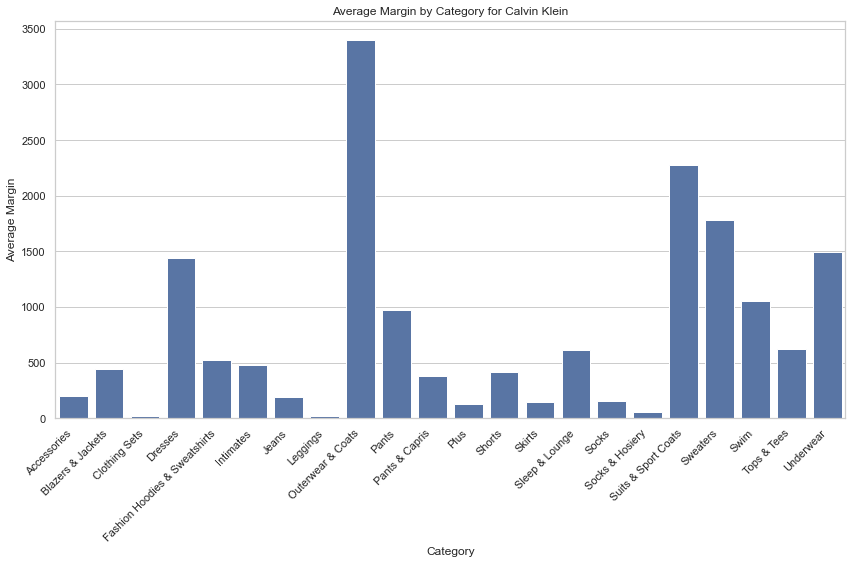

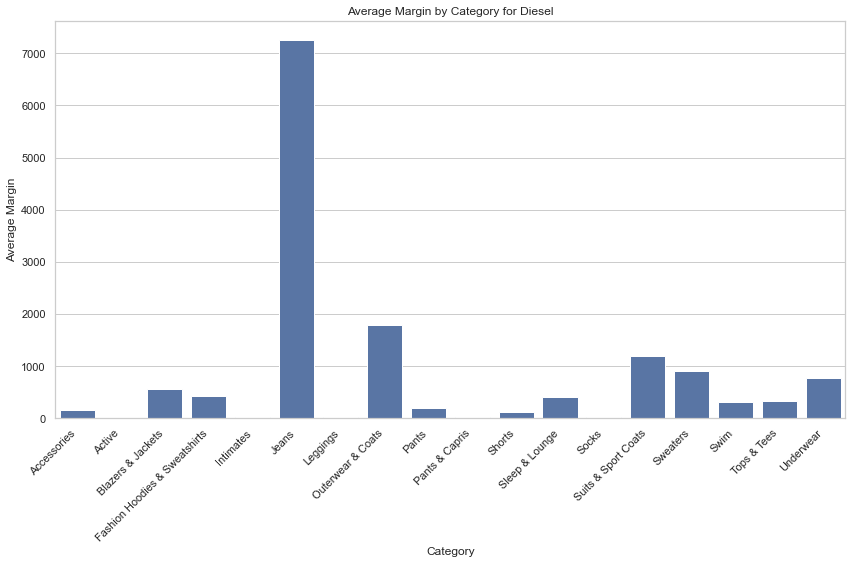

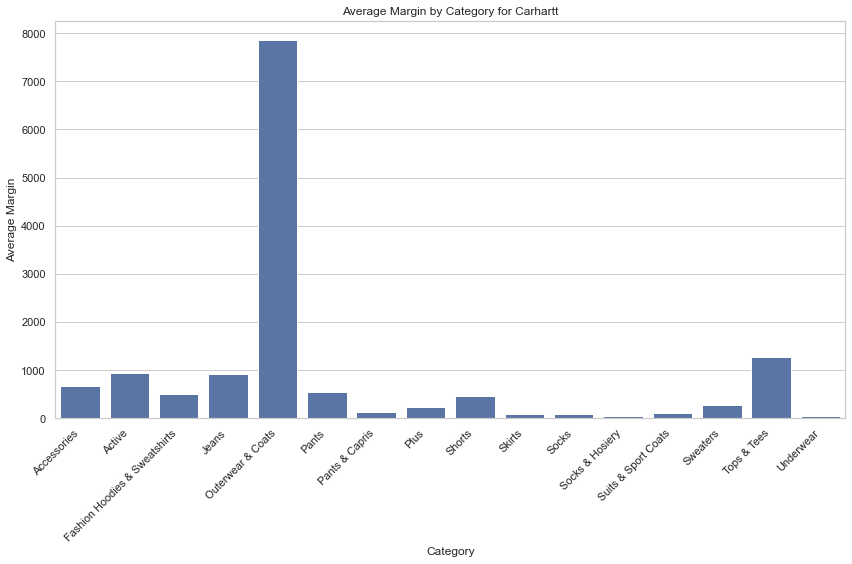

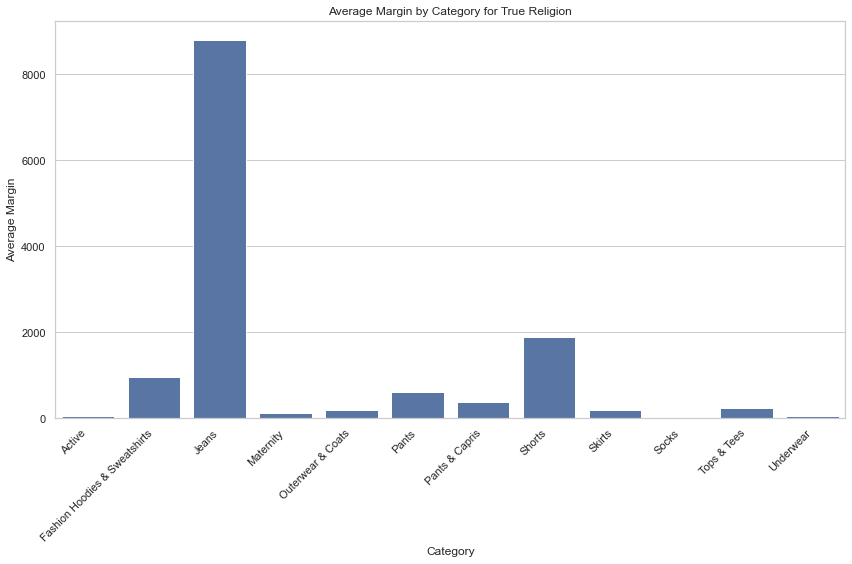

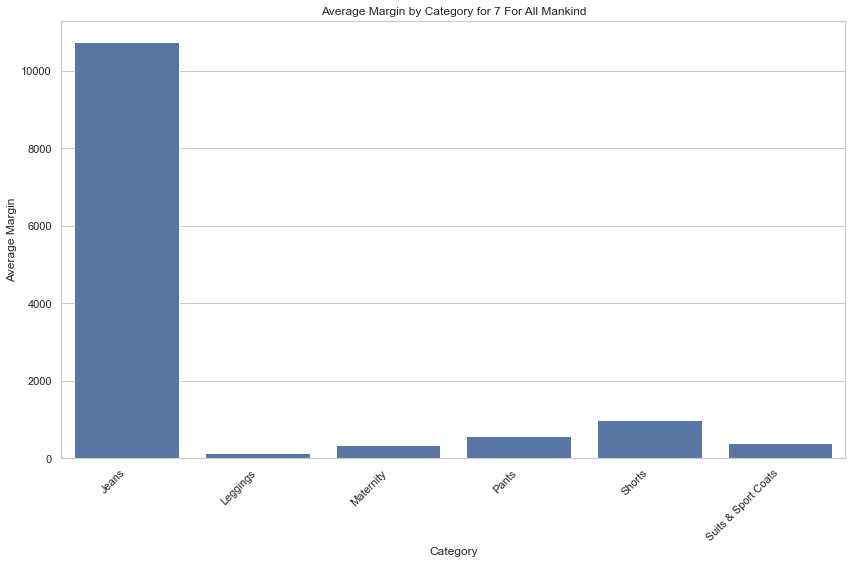

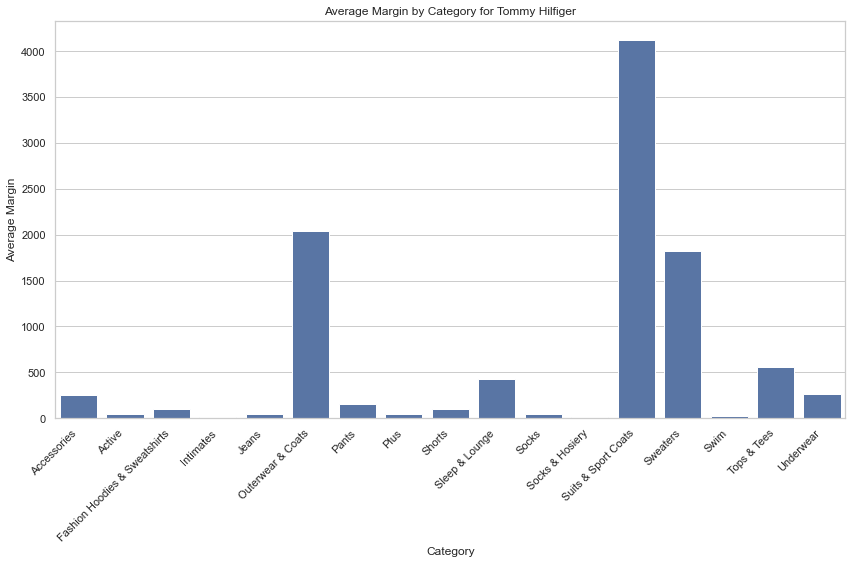

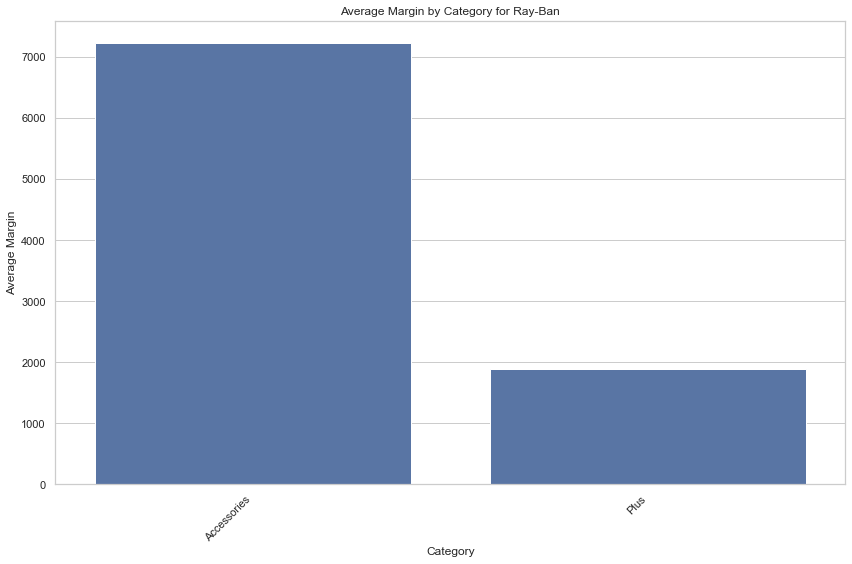

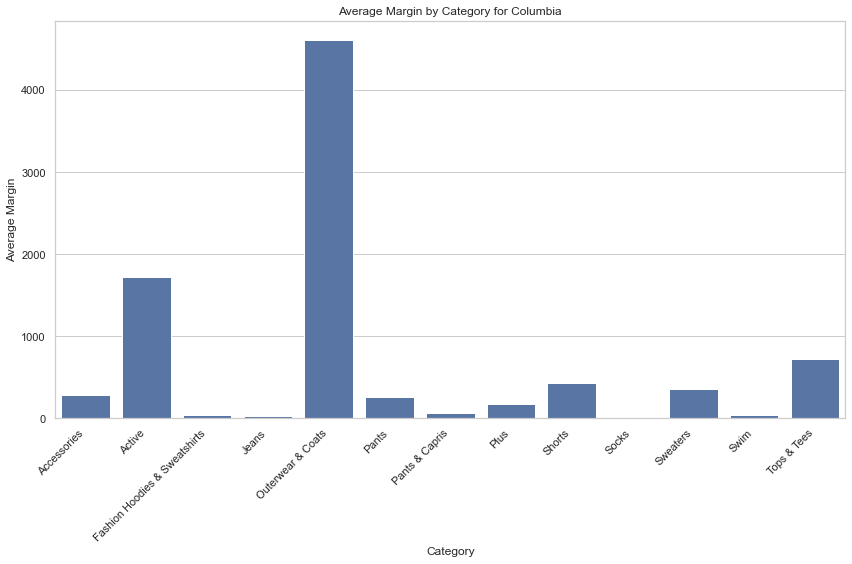

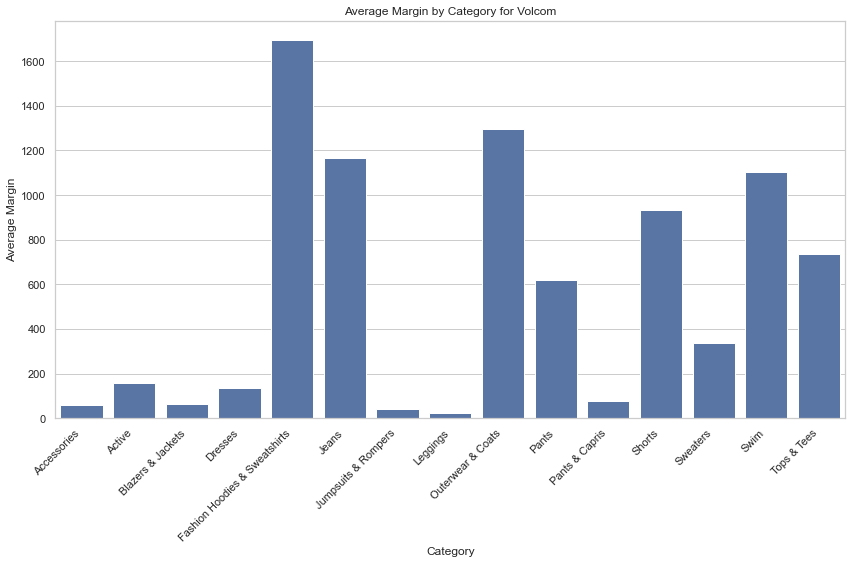

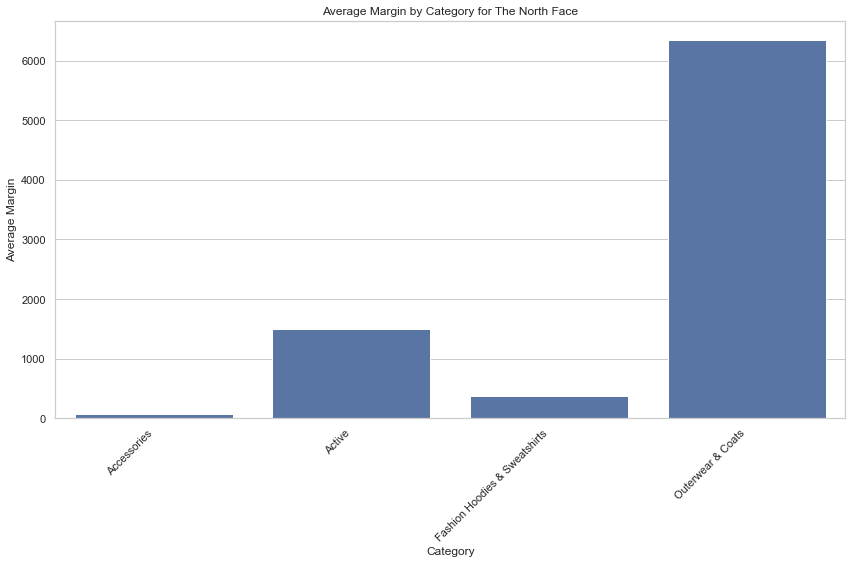

In [295]:
# 각 브랜드를 순회하면서 시각화합니다.
for brand in top_brands:
    # 특정 브랜드의 데이터를 추출합니다.
    brand_data = brand_category_analysis[brand_category_analysis['brand'] == brand]
    
    # 시각화
    plt.figure(figsize=(12, 8))
    sns.barplot(data=brand_data, x='category', y='margin', ci=None)
    plt.title(f'Average Margin by Category for {brand}')
    plt.xlabel('Category')
    plt.ylabel('Average Margin')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

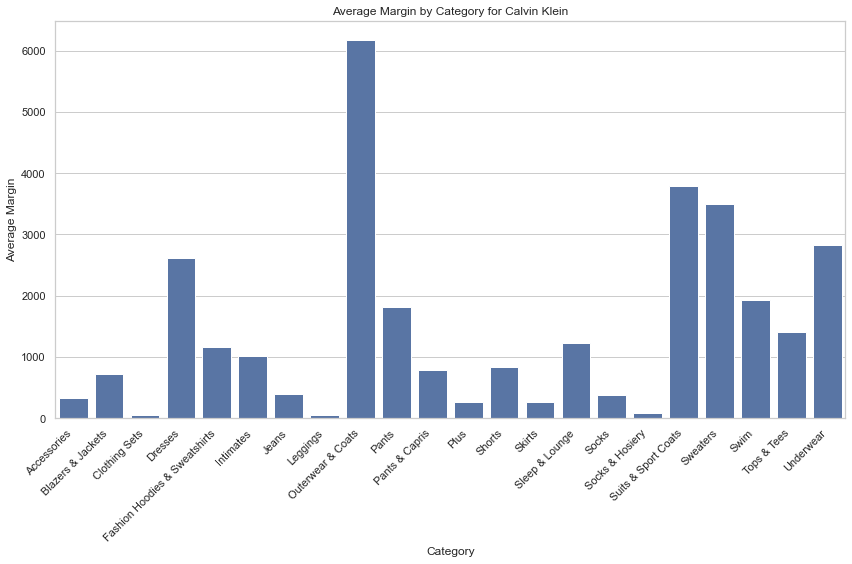

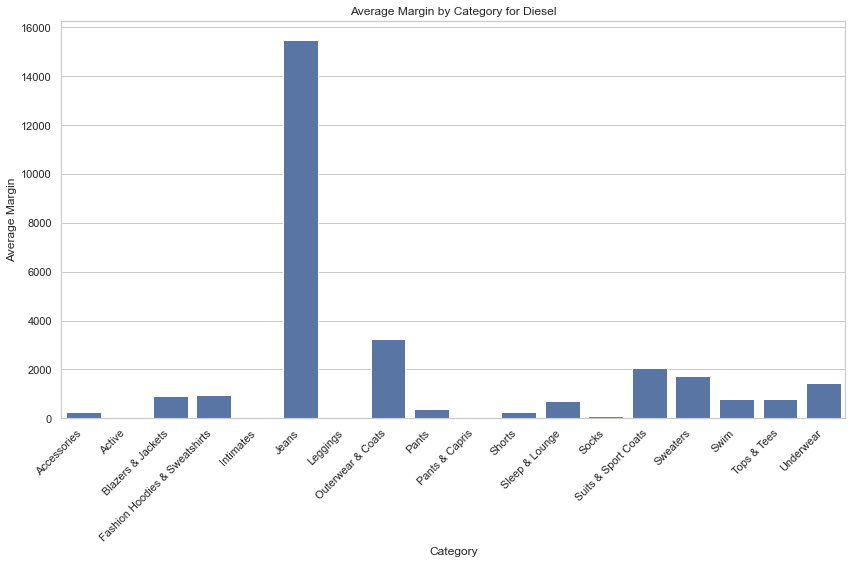

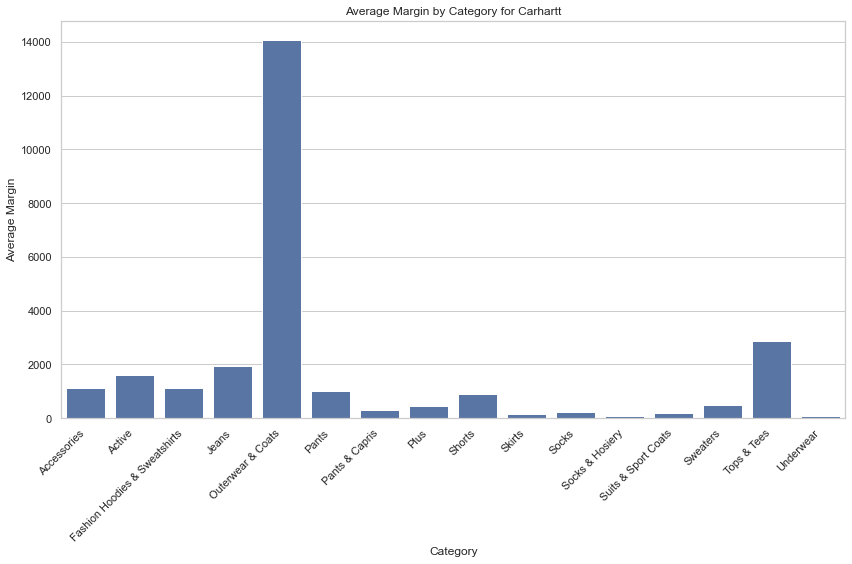

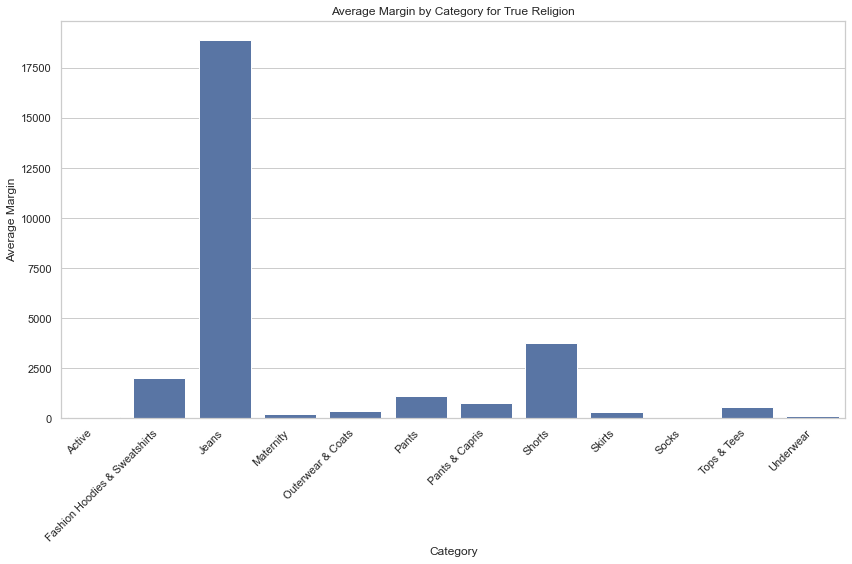

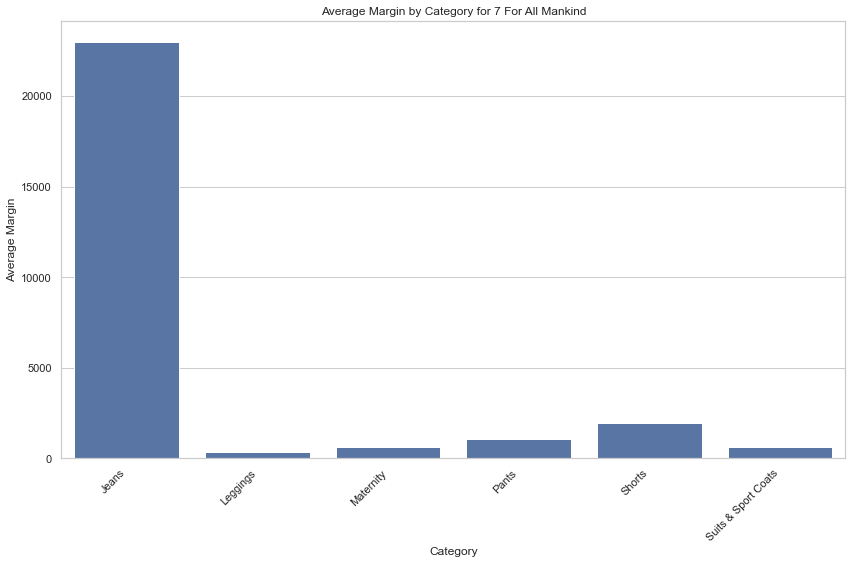

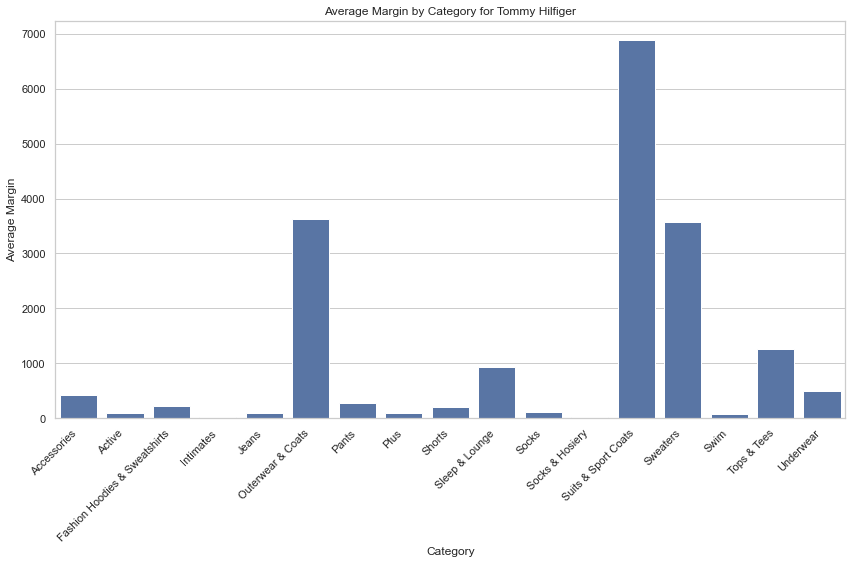

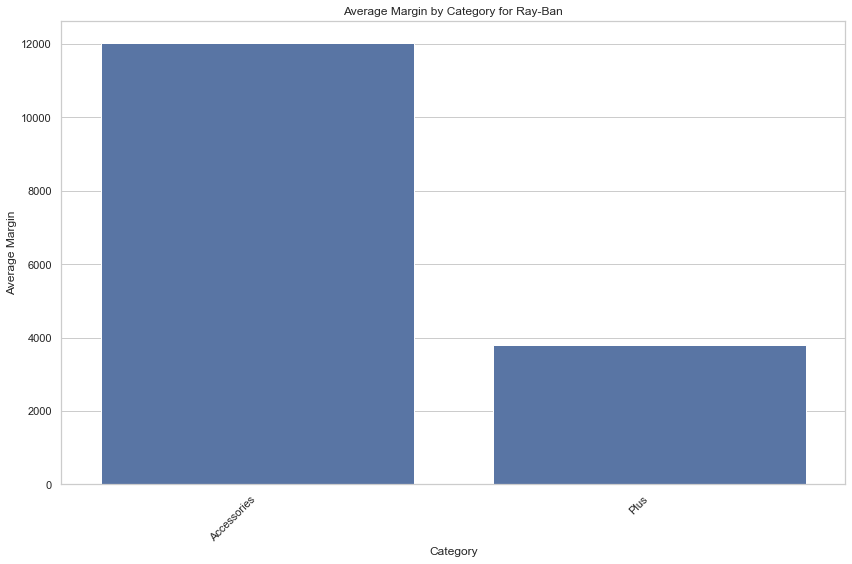

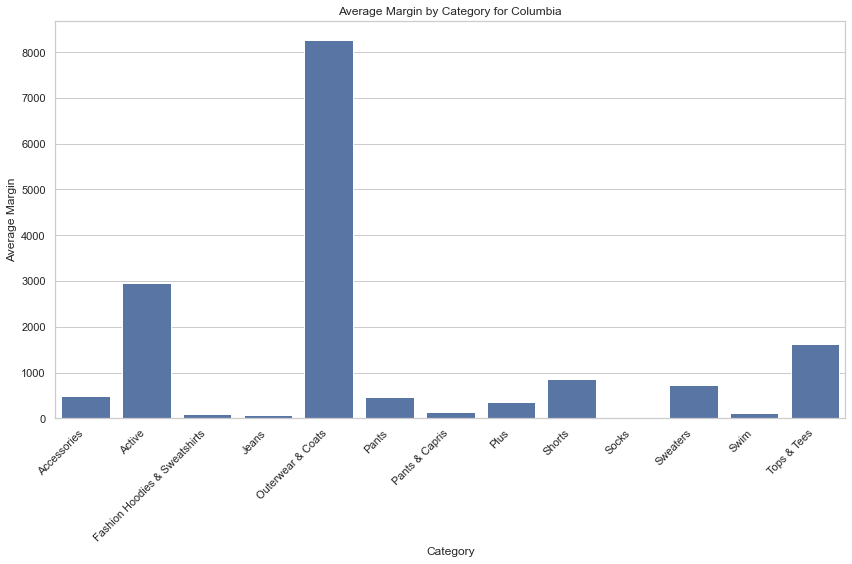

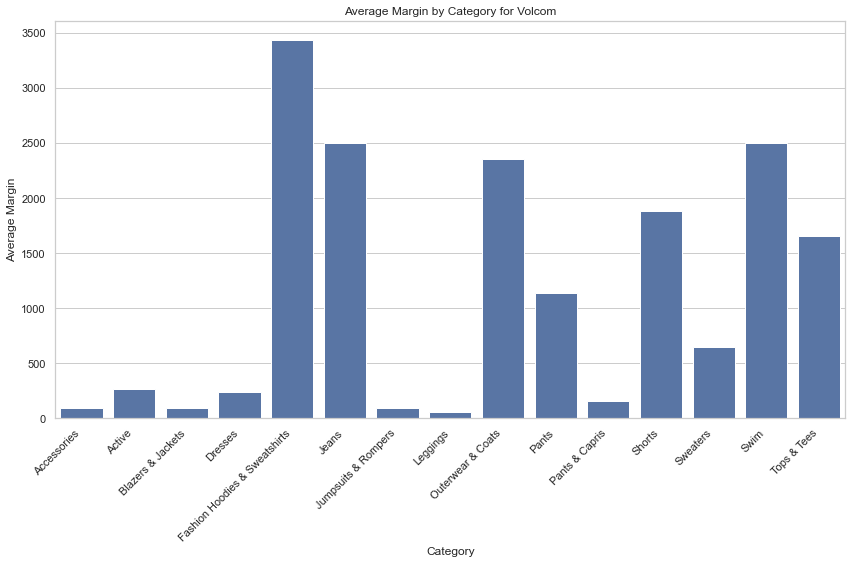

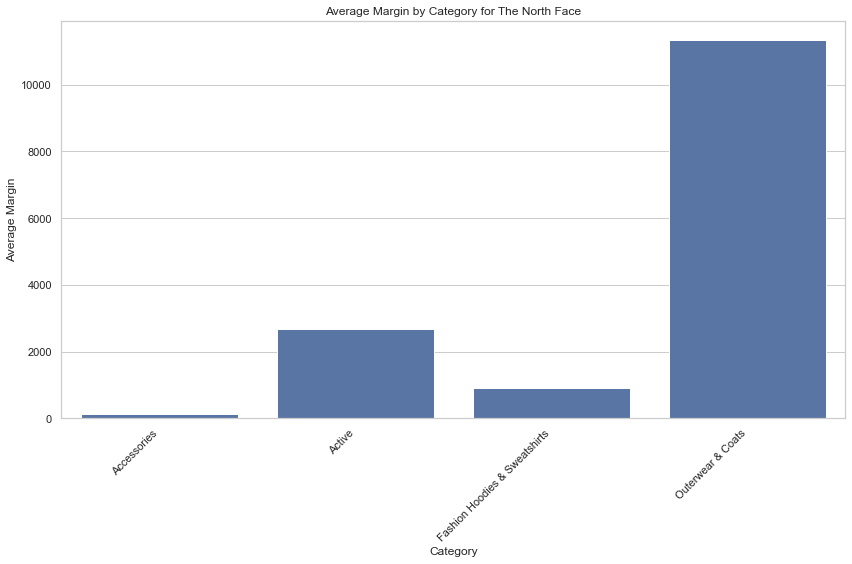

In [296]:
# 각 브랜드를 순회하면서 시각화합니다.
for brand in top_brands:
    # 특정 브랜드의 데이터를 추출합니다.
    brand_data = brand_category_analysis[brand_category_analysis['brand'] == brand]
    
    # 시각화
    plt.figure(figsize=(12, 8))
    sns.barplot(data=brand_data, x='category', y='retail_price', ci=None)
    plt.title(f'Average Margin by Category for {brand}')
    plt.xlabel('Category')
    plt.ylabel('Average Margin')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

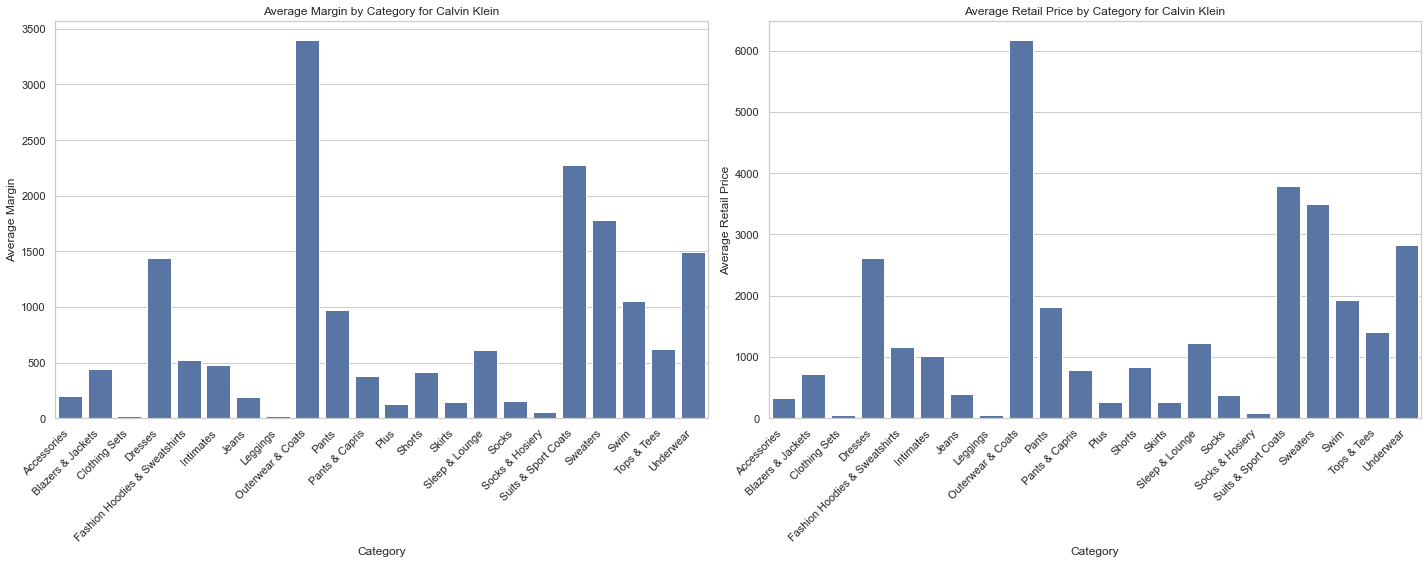

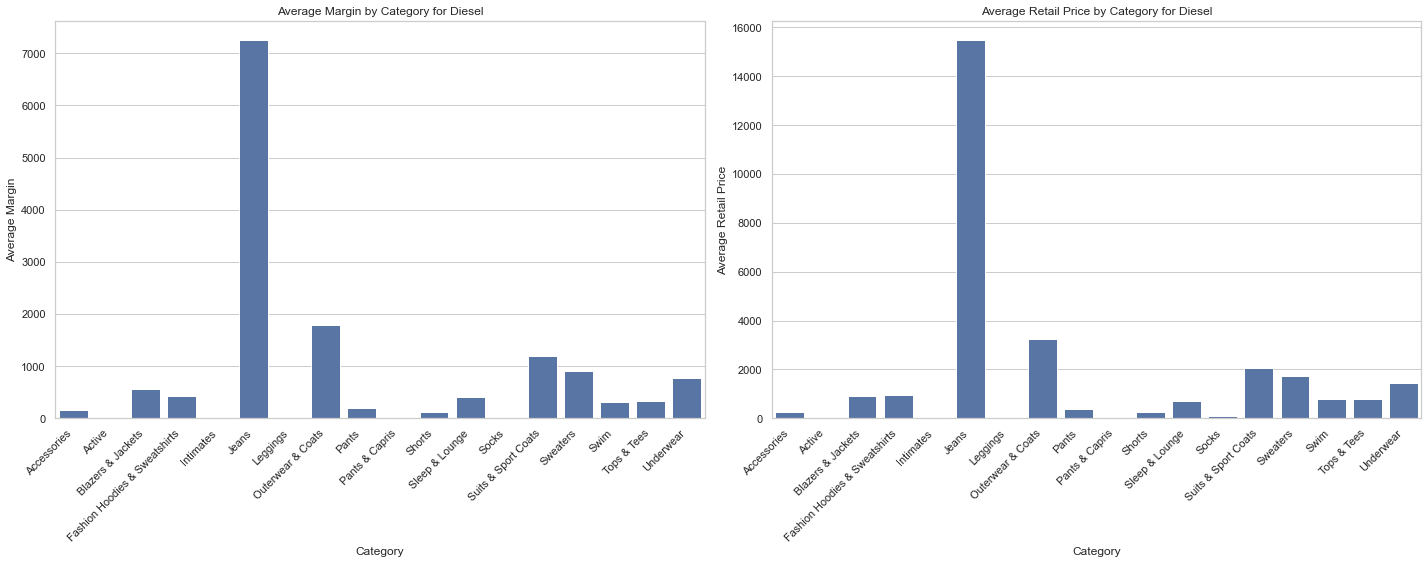

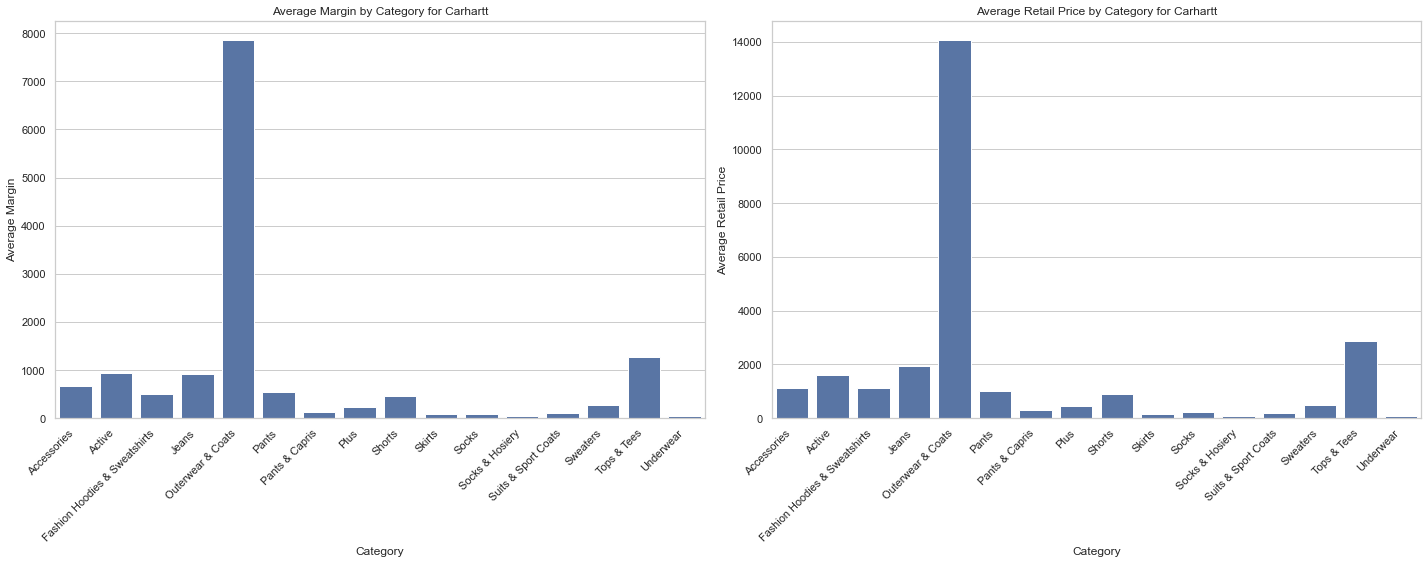

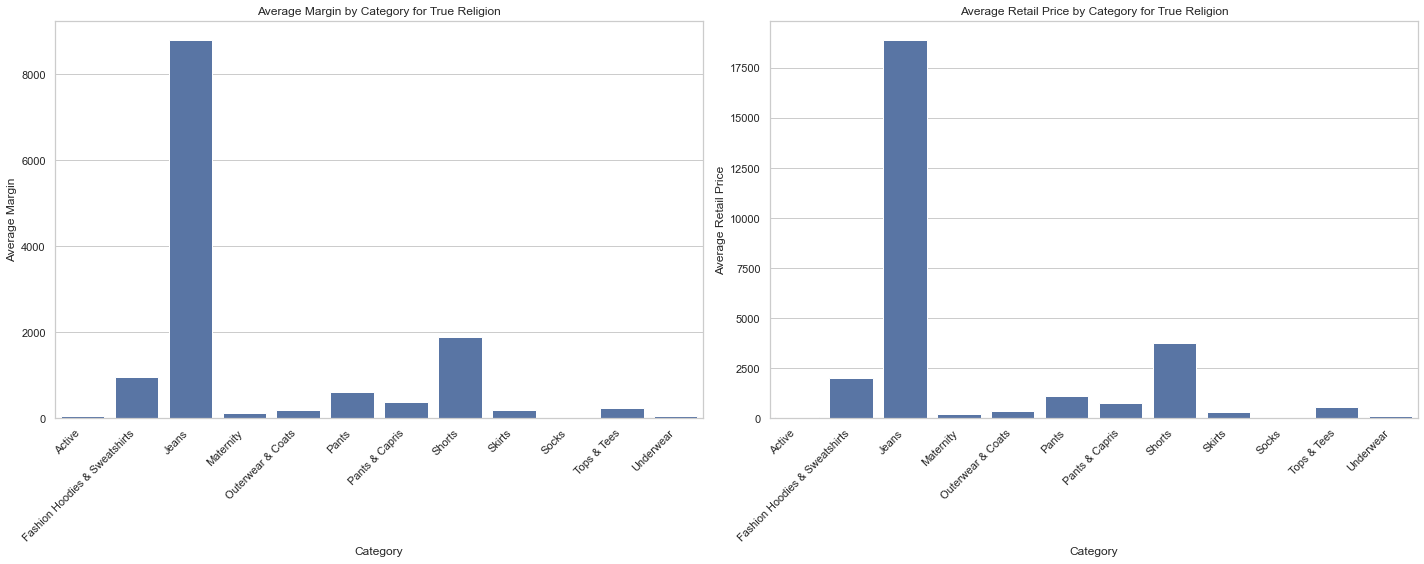

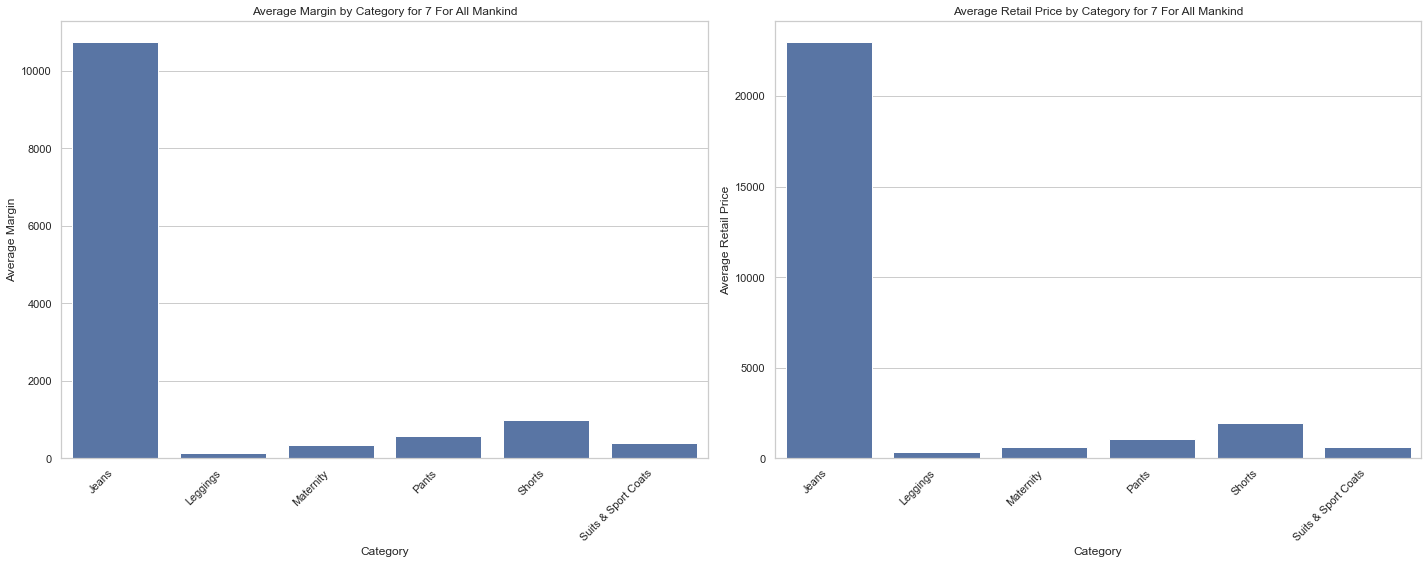

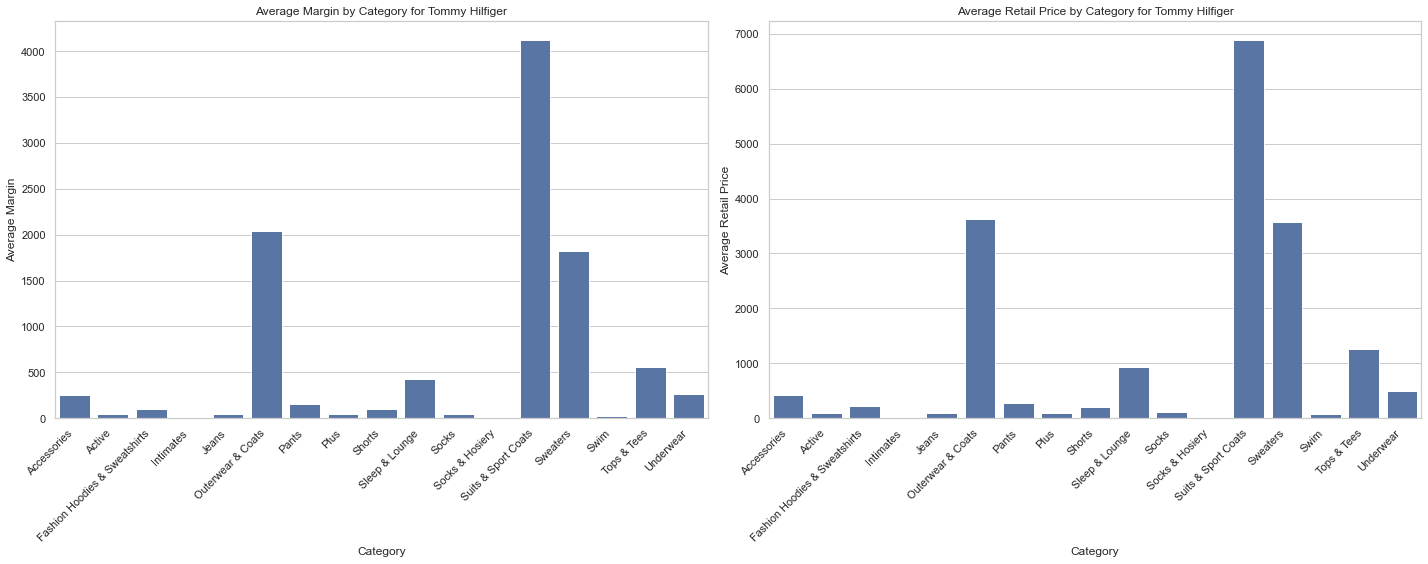

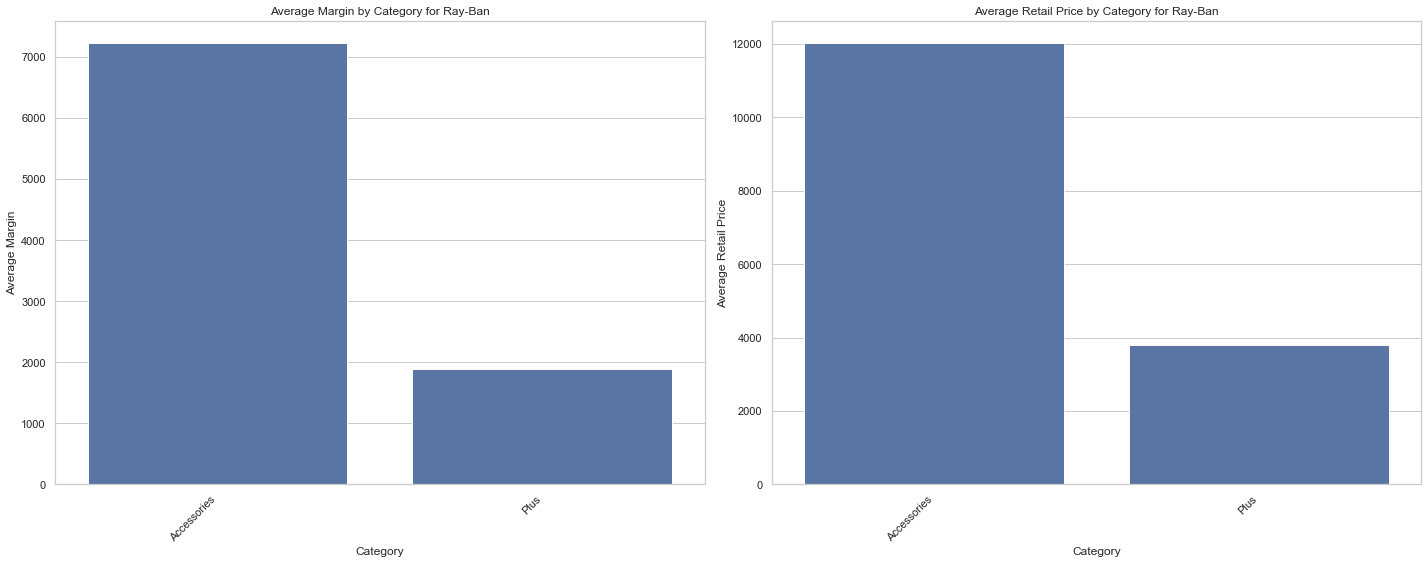

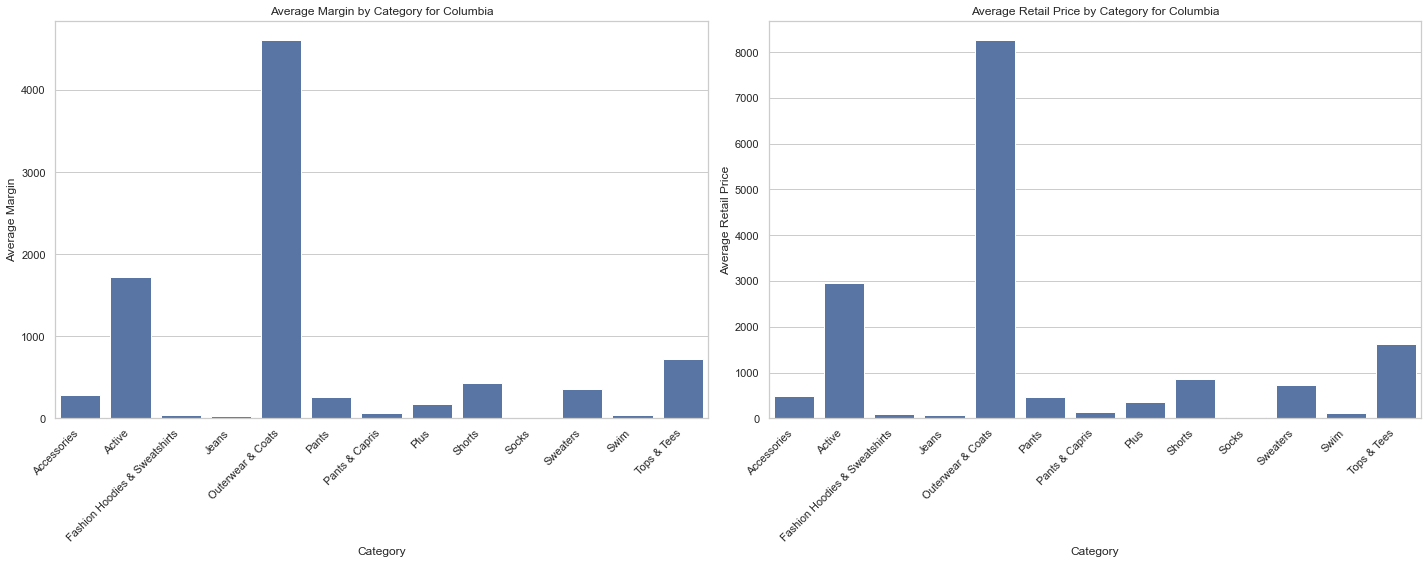

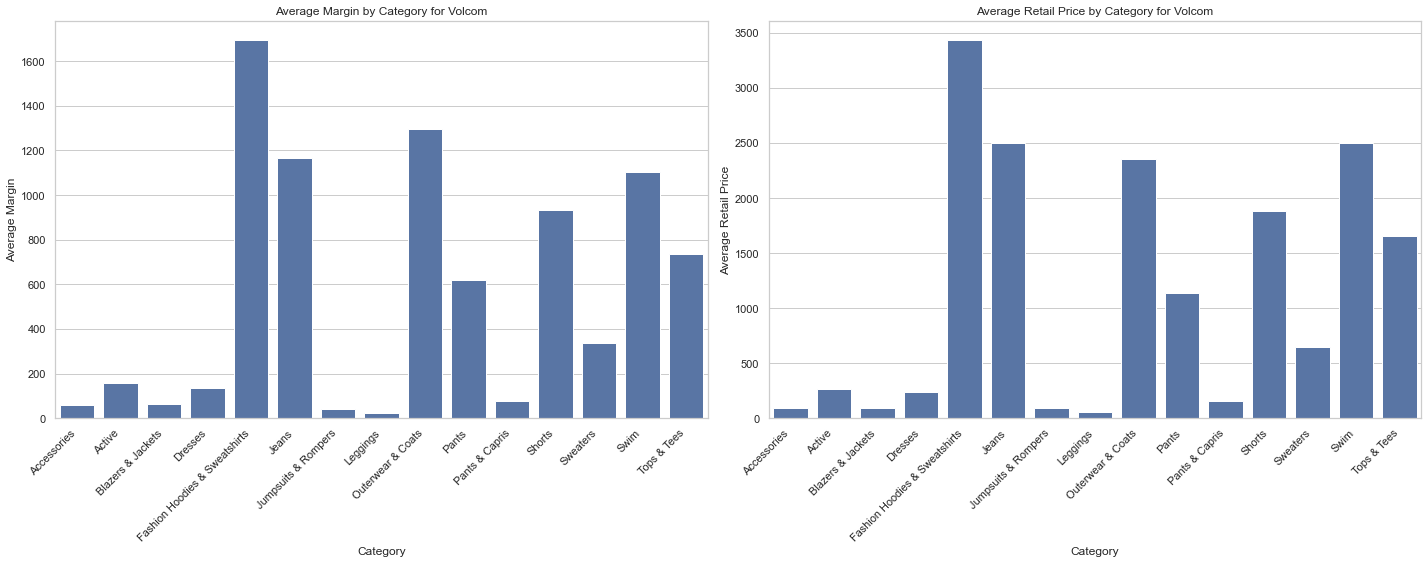

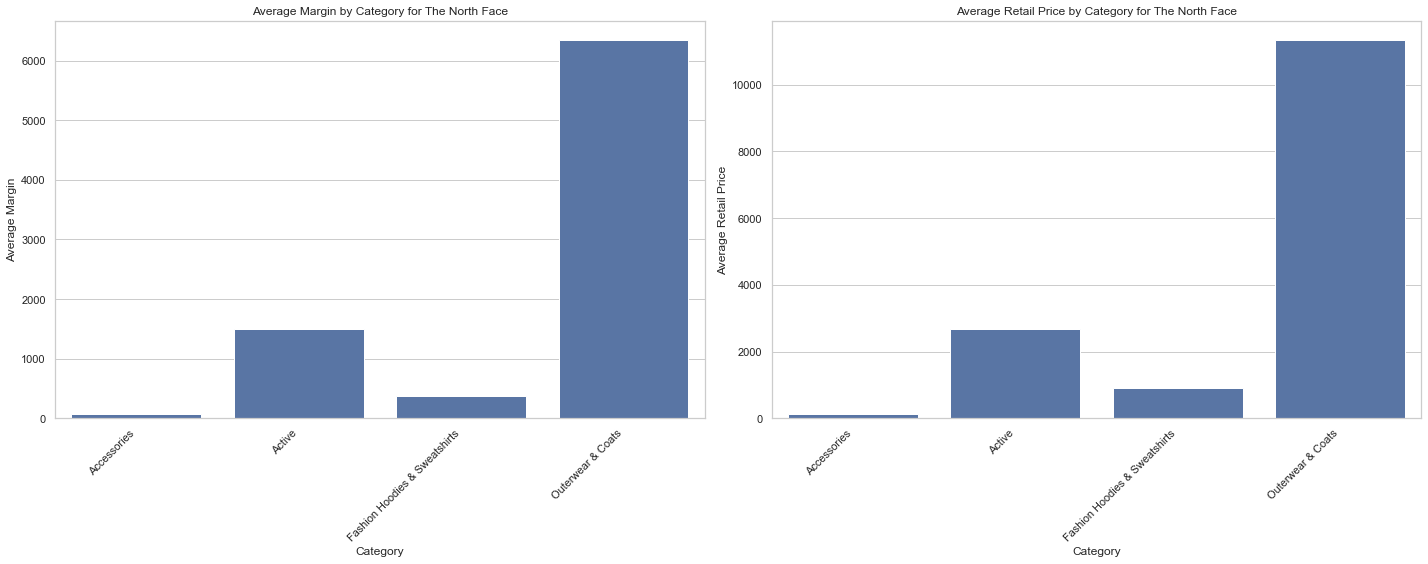

In [297]:
# 각 브랜드를 순회하면서 시각화합니다.
for brand in top_brands:
    # 특정 브랜드의 데이터를 추출합니다.
    brand_data = brand_category_analysis[brand_category_analysis['brand'] == brand]
    
    # 시각화
    plt.figure(figsize=(20, 8))
    
    # 첫 번째 그래프: margin
    plt.subplot(1, 2, 1)
    sns.barplot(data=brand_data, x='category', y='margin', ci=None)
    plt.title(f'Average Margin by Category for {brand}')
    plt.xlabel('Category')
    plt.ylabel('Average Margin')
    plt.xticks(rotation=45, ha='right')
    
    # 두 번째 그래프: retail_price
    plt.subplot(1, 2, 2)
    sns.barplot(data=brand_data, x='category', y='retail_price', ci=None)
    plt.title(f'Average Retail Price by Category for {brand}')
    plt.xlabel('Category')
    plt.ylabel('Average Retail Price')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

In [289]:
top_brands

Index(['Calvin Klein', 'Diesel', 'Carhartt', 'True Religion',
       '7 For All Mankind', 'Tommy Hilfiger', 'Ray-Ban', 'Columbia', 'Volcom',
       'The North Face'],
      dtype='object', name='brand')

In [290]:
top_brands_data

id       cost     category  \
2963     292  11.414290  Tops & Tees   
2964     295  14.494200  Tops & Tees   
2965     335  16.014660  Tops & Tees   
2966     374  15.141390  Tops & Tees   
2967     413  12.688230  Tops & Tees   
...      ...        ...          ...   
27599  28255  30.650501         Swim   
27600  28300  35.945000         Swim   
27601  28429  24.004000  Accessories   
27602  28692  52.736000  Accessories   
27603  28842  27.384511  Accessories   

                                                    name           brand  \
2963   Tommy Hilfiger Slim Fit V-neck Women Logo T-shirt  Tommy Hilfiger   
2964   Tommy Hilfiger Women Long Sleeve Beads Logo V-...  Tommy Hilfiger   
2965       Tommy Hilfiger Women V-Neck Logo Polo T-Shirt  Tommy Hilfiger   
2966   Tommy Hilfiger Women Striped V-Neck Long Sleev...  Tommy Hilfiger   
2967         Tommy Hilfiger Women V-neck Striped T-shirt  Tommy Hilfiger   
...                                                  ...             ...   
27599               Diesel Men's Floral Long Board Short          Diesel   
27600                        Diesel Men's Coralrif Trunk          Diesel   
27601                            Diesel Men's Bausy Belt          Diesel   
27602                            Diesel Men's Bonio Belt          Diesel   
27603                            Diesel Men's Tiedye Tie          Diesel   

       retail_price department                               sku  \
2963      19.990000      Women  1700002963A49DA13542E0726B7BB758   
2964      24.990000      Women  49182F81E6A13CF5EAA496D51FEA6406   
2965      29.990000      Women  F9B902FC3289AF4DD08DE5D1DE54F68F   
2966      26.990000      Women  AD972F10E0800B49D76FED33A21F6698   
2967      21.990000      Women  0DEB1C54814305CA9AD266F53BC82511   
...             ...        ...                               ...   
27599     51.950001        Men  7D9B272D3486358DCE2F0195FC91C884   
27600     65.000000        Men  98FD61076EE10D53D71C80CDE8B5C954   
27601     68.000000        Men  0065827F588A93273FC4573B432622CF   
27602    128.000000        Men  54ABA384BEBF7D76045BC3DAD7251D5B   
27603     60.990002        Men  ABD146BCEAD71B89B0D035473288F07A   

       distribution_center_id  name_length  real_price     margin  
2963                        1           49    8.575710   8.575710  
2964                        1           58   10.495800  10.495800  
2965                        1           45   13.975340  13.975340  
2966                        1           60   11.848610  11.848610  
2967                        1           43    9.301770   9.301770  
...                       ...          ...         ...        ...  
27599                      10           36   21.299500  21.299500  
27600                      10           27   29.055000  29.055000  
27601                      10           23   43.996000  43.996000  
27602                      10           23   75.264000  75.264000  
27603                      10           23   33.605491  33.605491  

[2370 rows x 12 columns]

## Most Common Words in Product Names

In [195]:
df_products['name']

0         Low Profile Dyed Cotton Twill Cap - Navy W39S55D
1        Low Profile Dyed Cotton Twill Cap - Putty W39S55D
2             Enzyme Regular Solid Army Caps-Black W35S45D
3        Enzyme Regular Solid Army Caps-Olive W35S45D (...
4                    Washed Canvas Ivy Cap - Black W11S64C
                               ...                        
29115    WHAT GOES AROUND COMES AROUND Women's Colette ...
29116    WHAT GOES AROUND COMES AROUND Women's Mimi Shorts
29117     WHAT GOES AROUND COMES AROUND Women's Fifi Short
29118    WHAT GOES AROUND COMES AROUND Women's Ferguson...
29119    WHAT GOES AROUND COMES AROUND Women's Bennet J...
Name: name, Length: 29120, dtype: object

In [197]:
df_products['name'].str.len()

0        48.0
1        49.0
2        44.0
3        55.0
4        37.0
         ... 
29115    51.0
29116    49.0
29117    48.0
29118    52.0
29119    51.0
Name: name, Length: 29120, dtype: float64

In [190]:
# 제품 이름의 길이 계산
df_products['name_length'] = df_products['name'].str.len()
df_products['name_length']

0        48.0
1        49.0
2        44.0
3        55.0
4        37.0
         ... 
29115    51.0
29116    49.0
29117    48.0
29118    52.0
29119    51.0
Name: name_length, Length: 29120, dtype: float64

In [194]:
df_products['name_length'].value_counts()

name_length
40.0     851
43.0     822
37.0     809
38.0     787
36.0     785
        ... 
142.0      1
224.0      1
11.0       1
213.0      1
140.0      1
Name: count, Length: 156, dtype: int64

In [191]:
df_products.groupby('name_length')['name'].count()

name_length
5.0      3
6.0      1
7.0      1
9.0      6
10.0     5
        ..
192.0    1
205.0    1
213.0    1
223.0    1
224.0    1
Name: name, Length: 156, dtype: int64

In [160]:
# 제품 이름 길이별 판매량(count) 계산
name_length_sales = df_products.groupby('name_length')['name'].count()

# 결과 출력
print(name_length_sales)

name_length
5.0      3
6.0      1
7.0      1
9.0      6
10.0     5
        ..
192.0    1
205.0    1
213.0    1
223.0    1
224.0    1
Name: name, Length: 156, dtype: int64


In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [223]:
df_products['name']

0         Low Profile Dyed Cotton Twill Cap - Navy W39S55D
1        Low Profile Dyed Cotton Twill Cap - Putty W39S55D
2             Enzyme Regular Solid Army Caps-Black W35S45D
3        Enzyme Regular Solid Army Caps-Olive W35S45D (...
4                    Washed Canvas Ivy Cap - Black W11S64C
                               ...                        
29115    WHAT GOES AROUND COMES AROUND Women's Colette ...
29116    WHAT GOES AROUND COMES AROUND Women's Mimi Shorts
29117     WHAT GOES AROUND COMES AROUND Women's Fifi Short
29118    WHAT GOES AROUND COMES AROUND Women's Ferguson...
29119    WHAT GOES AROUND COMES AROUND Women's Bennet J...
Name: name, Length: 29118, dtype: object

In [239]:
word_counts

Counter({'low': 288,
         'profile': 20,
         'dyed': 39,
         'cotton': 961,
         'twill': 279,
         'cap': 106,
         'navy': 199,
         'w39s55d': 6,
         'putty': 3,
         'enzyme': 5,
         'regular': 127,
         'solid': 720,
         'army': 29,
         'caps-black': 1,
         'w35s45d': 2,
         'caps-olive': 1,
         '(one': 53,
         'size)': 44,
         'washed': 51,
         'canvas': 36,
         'ivy': 14,
         'black': 1799,
         'w11s64c': 1,
         '4': 123,
         'panel': 50,
         'large': 87,
         'bill': 6,
         'flap': 55,
         'hat': 167,
         'w15s48b': 1,
         'size': 905,
         'fits': 85,
         'most/khaki)': 1,
         'khaki': 176,
         'fishing': 19,
         '(01)-khaki': 1,
         'w10s32f': 1,
         'fashion': 373,
         'plaid': 414,
         'blue': 636,
         'w10s69f': 1,
         'hunting': 11,
         'outdoor': 57,
         'hat-camo': 1,

In [236]:
set(['and', 'the', 'for', 'with', 'in', 'on', 'at', 'by'])

{'and', 'at', 'by', 'for', 'in', 'on', 'the', 'with'}

In [240]:
word_counts.most_common(20) 

[("men's", 8509),
 ("women's", 6756),
 ('short', 1836),
 ('black', 1799),
 ('sleeve', 1761),
 ('pant', 1608),
 ('long', 1580),
 ('jacket', 1555),
 ('dress', 1511),
 ('jean', 1401),
 ('sweater', 1345),
 ('mens', 1343),
 ('hoodie', 1135),
 ('fit', 1117),
 ('k', 1052),
 ('allegra', 1041),
 ('socks', 1040),
 ('top', 995),
 ('cotton', 961),
 ('jeans', 925)]

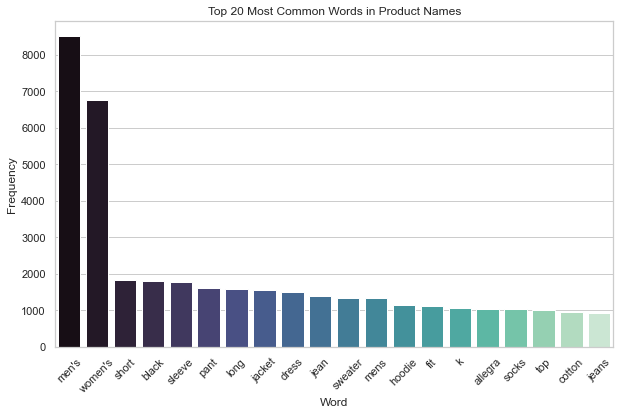

In [238]:
# 결측치 제거
df_products = df_products.dropna(subset=['name'])

# 각 제품 이름의 길이 계산하여 새로운 열로 추가
df_products['name_length'] = df_products['name'].apply(lambda x: len(x))

# 각 제품 이름을 토큰화하여 단어로 분할
words = ' '.join(df_products['name']).lower().split()

# 불용어 제거
stopwords = set(['&','-','and', 'the', 'for', 'with', 'in', 'on', 'at', 'by'])  # 분석에서 제외할 단어 설정
filtered_words = [word for word in words if word not in stopwords]

# 단어 빈도 분석
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(20)  # 가장 빈도가 높은 상위 20개 단어 추출

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], palette="mako")
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Product Names')
plt.xticks(rotation=45)
plt.show()

## Comprehensive Analysis of Product Data
1. 제품 카테고리 분석: Number of Products by Category
2. 제품 판매량 분석: Top 10 Products by Sales
3. 브랜드 성능 분석: Top 10 Brands by Product Sales
4. 제품 이름 길이 분석: Number of Products by Name Length
5. 가격대 분석 - 제품 판매량: Number of Products Sold by Price Range
6. 가격대 분석 - 제품 수익: Total Revenue by Price Range

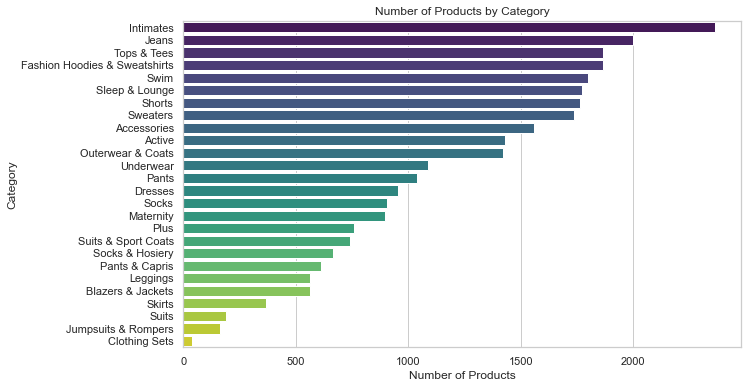

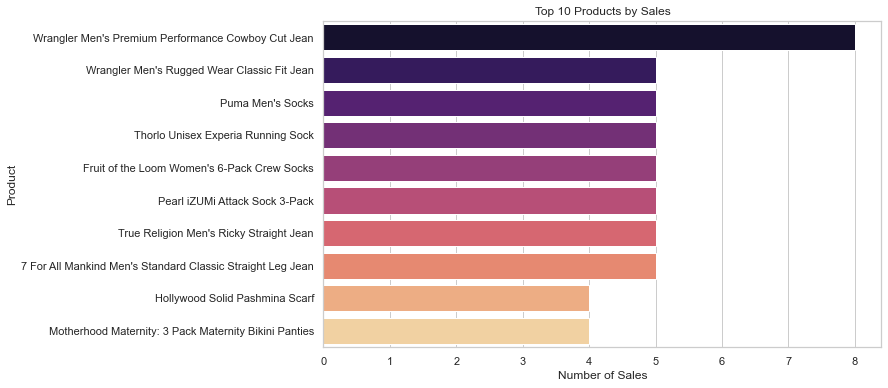

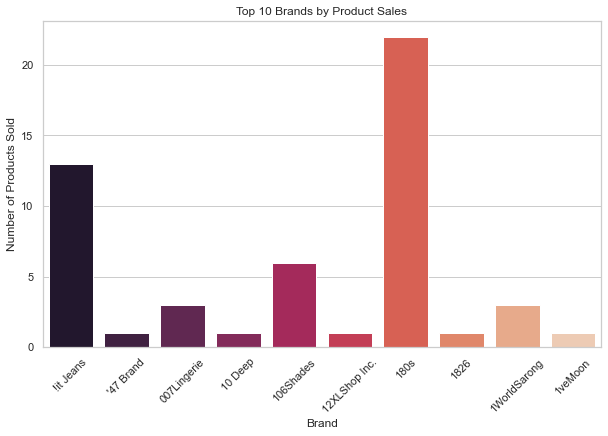

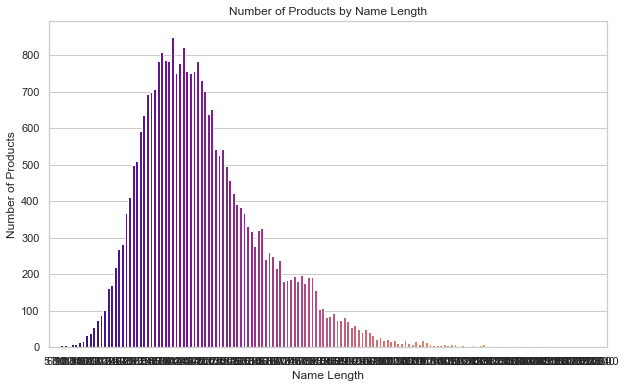

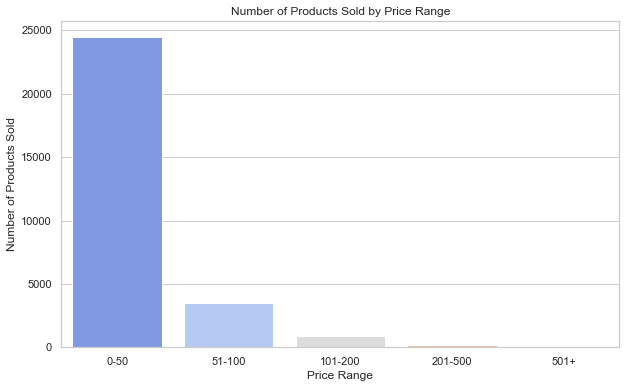

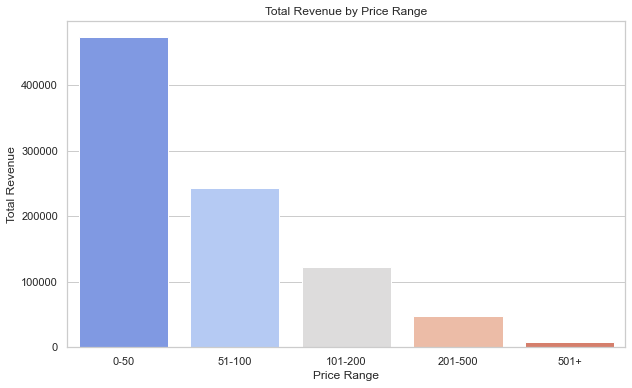

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화를 위한 설정
sns.set(style="whitegrid")

# 1. 제품 카테고리 분석
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.title('Number of Products by Category')
plt.show()

# 2. 제품 판매량 분석
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.head(10).values, y=product_sales.head(10).index, palette="magma")
plt.xlabel('Number of Sales')
plt.ylabel('Product')
plt.title('Top 10 Products by Sales')
plt.show()

# 3. 브랜드 성능 분석
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_performance.head(10).index, y=brand_performance.head(10)['name'], palette="rocket")
plt.xlabel('Brand')
plt.ylabel('Number of Products Sold')
plt.title('Top 10 Brands by Product Sales')
plt.xticks(rotation=45)
plt.show()

# 4. 제품 이름 길이 분석
plt.figure(figsize=(10, 6))
sns.barplot(x=name_length_sales.index, y=name_length_sales.values, palette="plasma")
plt.xlabel('Name Length')
plt.ylabel('Number of Products')
plt.title('Number of Products by Name Length')
plt.show()

# 5. 가격대 분석 - 제품 판매량
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_sales.index, y=price_range_sales.values, palette="coolwarm")
plt.xlabel('Price Range')
plt.ylabel('Number of Products Sold')
plt.title('Number of Products Sold by Price Range')
plt.show()

# 5. 가격대 분석 - 제품 수익
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_revenue.index, y=price_range_revenue.values, palette="coolwarm")
plt.xlabel('Price Range')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Price Range')
plt.show()